In [2]:
import pandas as pd

In [3]:
import os
import json

directory_path = 'samples_latest_all'
data = []

for filename in os.listdir(directory_path):
    if filename.endswith('.json'):
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r') as file:
            file_data = json.load(file)
            data.append(file_data)

In [4]:
symptoms_df = pd.DataFrame(data)
raw_test_df = pd.read_csv('DIA_GROUPS_3_DIGITS_adm_test.csv')
raw_test_df = pd.merge(symptoms_df, raw_test_df, how='inner', on='id')
raw_test_df.head(3)

,Symptoms,Diseases,id,icd_9_desc,text,long_texts,short_texts,discharge_summary,short_codes
0,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,"2127,27800,4139,2859,53081,V1083,28860,V8533"
1,"[intermittent L-sided chest pressure, anterior...","[prostate ca s/p brachytherapy, PVD, h/o pancr...",193197,"True posterior wall infarction, initial episod...",CHIEF COMPLAINT: intermittent L-sided chest pr...,"True posterior wall infarction, initial episod...","True post infarct, init,Ac posthemorrhag anemi...",Admission Date: [**2144-2-23**] ...,"41061,2851,41401,4439,V1046,25000"
2,"[palpitations, dizziness, shortness of breath,...","[mitral regurgitation, mitral stenosis, hypert...",157736,"Mitral stenosis with insufficiency,Other chron...",CHIEF COMPLAINT: mitral regurgitation/stenosis...,"Mitral stenosis with insufficiency,Other chron...","Mitral stenosis w insuff,Chr pulmon heart dis ...",Admission Date: [**2197-10-10**] ...,"3942,4168,27800,42731,311,4019,24200"


In [4]:
raw_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8733 entries, 0 to 8732
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Symptoms           8733 non-null   object
 1   Diseases           8733 non-null   object
 2   id                 8733 non-null   int64 
 3   icd_9_desc         8733 non-null   object
 4   text               8733 non-null   object
 5   long_texts         8733 non-null   object
 6   short_texts        8733 non-null   object
 7   discharge_summary  8733 non-null   object
 8   short_codes        8733 non-null   object
dtypes: int64(1), object(8)
memory usage: 614.2+ KB


In [5]:
test_df = raw_test_df.copy()

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8733 entries, 0 to 8732
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Symptoms           8733 non-null   object
 1   Diseases           8733 non-null   object
 2   id                 8733 non-null   int64 
 3   icd_9_desc         8733 non-null   object
 4   text               8733 non-null   object
 5   long_texts         8733 non-null   object
 6   short_texts        8733 non-null   object
 7   discharge_summary  8733 non-null   object
 8   short_codes        8733 non-null   object
dtypes: int64(1), object(8)
memory usage: 614.2+ KB


In [7]:
test_df = test_df.assign(short_codes=test_df['short_codes'].str.split(',')).explode('short_codes').reset_index(drop =True)

In [8]:
test_df.head()

,Symptoms,Diseases,id,icd_9_desc,text,long_texts,short_texts,discharge_summary,short_codes
0,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,2127
1,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,27800
2,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,4139
3,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,2859
4,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,53081


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98026 entries, 0 to 98025
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Symptoms           98026 non-null  object
 1   Diseases           98026 non-null  object
 2   id                 98026 non-null  int64 
 3   icd_9_desc         98026 non-null  object
 4   text               98026 non-null  object
 5   long_texts         98026 non-null  object
 6   short_texts        98026 non-null  object
 7   discharge_summary  98026 non-null  object
 8   short_codes        98026 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.7+ MB


In [ ]:
def preprocessing(test_df) : 
    test_df.loc[
        test_df['short_codes'].str.startswith("V"), 'short_codes'] = test_df.short_codes.apply(
        lambda x: x[:3])
    test_df.loc[
        test_df['short_codes'].str.startswith("E"), 'short_codes'] = test_df.short_codes.apply(
        lambda x: x[:3])
    test_df.loc[(~test_df.short_codes.str.startswith("E")) & (
        ~test_df.short_codes.str.startswith("V")), 'short_codes'] = test_df.short_codes.apply(
        lambda x: x[:2])
    return test_df

test_df = preprocessing(test_df)

In [371]:
test_df.head()

,Symptoms,Diseases,id,icd_9_desc,text,long_texts,short_texts,discharge_summary,short_codes
0,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,21
1,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,27
2,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,41
3,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,28
4,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,53


In [372]:
categories = {
    "00-10": ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10"],
    "11-13": ["11", "12", "13"],
    "14-20": ["14", "15", "16", "17", "18", "19", "20"],
    "21-23": ["21", "22", "23"],
    "24-27": ["24", "25", "26", "27"],
    "28": ["28"],
    "29-31": ["29", "30", "31"],
    "32-35": ["32", "33", "34", "35"],
    "36-38": ["36", "37", "38"],
    "39-45": ["39", "40", "41", "42", "43", "44", "45"],
    "46-51": ["46", "47", "48", "49", "50", "51"],
    "52-57": ["52", "53", "54", "55", "56", "57"],
    "58-62": ["58", "59", "60", "61", "62"],
    "63-66": ["63", "64", "65", "66"],
    "67": ["67"],
    "68-70": ["68", "69", "70"],
    "71-73": ["71", "72", "73"],
    "74-75": ["74", "75"],
    "76-77": ["76", "77"],
    "78": ["78"],
    "79": ["79"],
    "80-83": ["80", "81", "82", "83"],
    "84-95": ["84", "85", "86", "87", "88", "89", "90", "91", "92", "93", "94", "95"],
    "96-99": ["96", "97", "98", "99"],
    "V01-V09": ["V01", "V02", "V03", "V04", "V05", "V06", "V07", "V08", "V09"],
    "V10-V19": ["V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19"],
    "V20-V29": ["V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "V29"],
    "V30-V39": ["V30", "V31", "V32", "V33", "V34", "V35", "V36", "V37", "V38", "V39"],
    "V40-V49": ["V40", "V41", "V42", "V43", "V44", "V45", "V46", "V47", "V48", "V49"],
    "V50-V59": ["V50", "V51", "V52", "V53", "V54", "V55", "V56", "V57", "V58", "V59"],
    "V60-V69": ["V60", "V61", "V62", "V63", "V64", "V65", "V66", "V67", "V68", "V69"],
    "V70-V82": ["V70", "V71", "V72", "V73", "V74", "V75", "V76", "V77", "V78", "V79", "V80", "V81", "V82"],
    "V83-V84": ["V83", "V84"],
    "V85-V85": ["V85"],
    "V86-V86": ["V86"],
    "V87-V87": ["V87"],
    "V88-V88": ["V88"],
    "V89-V89": ["V89"],
    "V90-V90": ["V90"],
    "V91-V91": ["V91"],
    "E00-E09": ["E00", "E01", "E02", "E03", "E04", "E05", "E06", "E07", "E08", "E09"]
}


In [373]:
icd9_to_category = {code: category for category, codes in categories.items() for code in codes}


test_df['short_codes'] = test_df['short_codes'].astype(str).str.zfill(2)

test_df['Category'] = test_df['short_codes'].map(icd9_to_category)

test_df.head()

,Symptoms,Diseases,id,icd_9_desc,text,long_texts,short_texts,discharge_summary,short_codes,Category
0,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,21,21-23
1,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,27,24-27
2,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,41,39-45
3,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,28,28
4,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,53,52-57


In [374]:
test_df    = test_df.drop(['icd_9_desc'	,'text','long_texts','short_texts','discharge_summary','short_codes' ], axis =1)
test_df.head()

,Symptoms,Diseases,id,Category
0,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,21-23
1,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,24-27
2,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,39-45
3,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,28
4,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,52-57


In [375]:
test_df.dropna(subset=['Category'], inplace=True)

In [376]:
raw_test_df =  test_df.groupby('id').agg({
    'Symptoms': 'first',
    'Diseases': 'first',
    'Category': lambda x: ','.join(map(str, x))
}).reset_index()

raw_test_df.head()

,id,Symptoms,Diseases,Category
0,100010,"[Gross hematuria, Weight loss, Fullness in lef...","[Metastatic renal cell carcinoma, Renal mass, ...","14-20,14-20,14-20,14-20,24-27"
1,100012,[exertional angina],"[coronary artery disease, hypertension, hyperc...","39-45,96-99,39-45,39-45,24-27,V10-V19,V40-V49,..."
2,100016,"[Respiratory failure, Labored breathing, Acces...","[Downs Syndrome, MRSA pneumonia, Tracheostomy,...","46-51,46-51,24-27,46-51,74-75,32-35,24-27,39-4..."
3,100019,"[heart murmur since childhood, increase in the...","[Bicuspid aortic valve, Dilated aorta, Aortic ...","39-45,74-75,39-45,78"
4,100028,"[Right upper quadrant pain, Fever, Elevated LF...","[Mild mental retardation, Cholangitis, Choledo...","52-57,00-10,46-51,52-57,96-99,39-45,28,84-95"


In [377]:
# len(set(classes).intersection(set(list(test_df.short_codes))))

In [378]:
test_df.Category.nunique()

38

> #### Check if the classes are in KG or not

In [821]:
import os
from py2neo import Graph
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage
from neo4j import GraphDatabase
from dotenv import load_dotenv
import json


uri = "neo4j://localhost:7687" 
auth = ("neo4j", "neo4j_pass5")

driver_1= GraphDatabase.driver(uri, auth=auth) 
driver_1.verify_connectivity()




#### Number of distinct disease codes in the knowledge graph

In [822]:
def count_distinct_disease_codes():
    with driver_1.session() as session:
        result = session.run("""
            MATCH (d:Disease)
            RETURN DISTINCT d.title AS distinct_disease
        """)
        distinct_diseases =  [i['distinct_disease'] for i in result.data()]
          
        return distinct_diseases

distinct_disease= count_distinct_disease_codes()
print(f"Number of distinct disease codes in the knowledge graph: {len(distinct_disease)}")


Number of distinct disease codes in the knowledge graph: 41


In [381]:
# len(set(distinct_disease).intersection(set(list(test_df.short_codes))))

In [382]:
# len(set(classes).intersection(set(list(test_df.short_codes))))

In [383]:
# sorted(list(test_df.short_codes.value_counts()))[-100:]

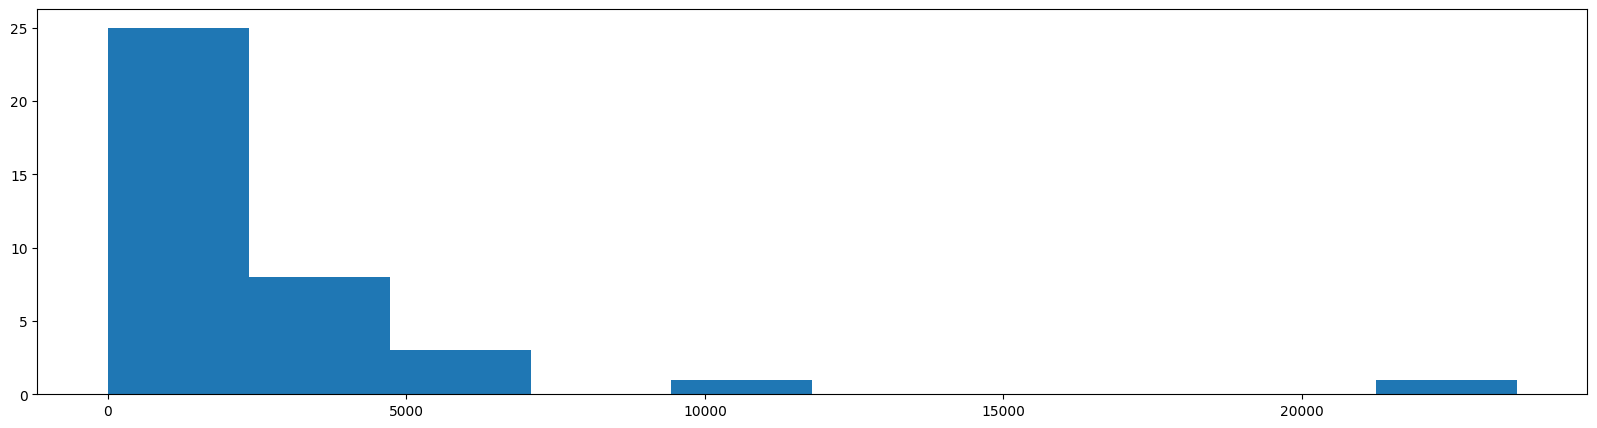

In [384]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
plt.hist(list(test_df.Category.value_counts()))

plt.show()

> #### Infer all the classes with limit 1263 and weight!=1

In [385]:
test_df.head()

,Symptoms,Diseases,id,Category
0,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,21-23
1,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,24-27
2,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,39-45
3,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,28
4,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,52-57


In [386]:
all_short_codes = set(list(test_df.Category))
print(f'No. of Short Codes : {len(set(all_short_codes))}')
df_one_hot = pd.get_dummies(test_df, columns=['Category'])
df_one_hot.columns = df_one_hot.columns.str.replace('Category_', '')
df_one_hot = df_one_hot.drop(['Symptoms','Diseases'], axis =1).reset_index(drop=True)
df_one_hot = df_one_hot.astype(int)
df_one_hot.head()

No. of Short Codes : 38


,id,00-10,11-13,14-20,21-23,24-27,28,29-31,32-35,36-38,...,V30-V39,V40-V49,V50-V59,V60-V69,V70-V82,V83-V84,V85-V85,V87-V87,V88-V88,V90-V90
0,109136,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,109136,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,109136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,109136,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,109136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> #### Check for the classes which are there, if classes as present, keep it, else make everything 0.

In [387]:
import numpy as np
from tqdm import tqdm
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [823]:
def get_prioritized_relationships(symptom_names, weightage=5, limit=20):
    with driver_1.session() as session:
        result = session.run(f"""
            MATCH (s:Symptom)-[r:ASSOCIATED_WITH]->(d:Disease)
            WHERE s.name IN $symptoms AND r.weight >= {weightage}
            WITH d.title AS disease_name, collect(s.name) AS symptoms, max(r.weight) AS max_weight
            RETURN disease_name, symptoms, max_weight
            ORDER BY max_weight DESC
            LIMIT {limit}
        """, symptoms=symptom_names)

        codes = []
        all_info = {}
        for record in result:
            codes.append(record['disease_name'])
            all_info[record['disease_name']] = [record['disease_name'], record['max_weight']]

            
        return codes, all_info
    

def create_binary_matrix(labels, classes):
    binary_matrix = np.zeros((len(labels), len(classes)), dtype=int)
    for i, label_list in enumerate(labels):
        for label in label_list:
            if label in classes:
                idx = classes.index(label)
                binary_matrix[i, idx] = 1       
    return binary_matrix
    
    
def roc_auc(probs, labels, multilabel=False, average='macro', multi_class='ovo'):
    if isinstance(labels, list):
        labels = np.array(labels, dtype=int)
    else:
        labels = labels.astype(int)
    y_score = probs
    if multilabel:
        dim_size = len(labels[0])
        mask = np.ones((dim_size), dtype=bool)
        for c in range(dim_size):
            if max(labels[:, c]) == 0:
                mask[c] = False
        labels = labels[:, mask]
        y_score = np.array(probs)[:, mask]

        filtered_cols = np.count_nonzero(mask == False)
        # print(f"{filtered_cols} columns not considered for ROC AUC calculation!")

    return roc_auc_score(y_true=labels, y_score=y_score, average=average, multi_class=multi_class)


In [389]:
raw_test_df.Symptoms.iloc[1]

['exertional angina']

In [390]:
codes = get_prioritized_relationships(['back pain'], 1, 40)[0]

In [391]:
len(codes)

34

In [392]:
print(get_prioritized_relationships(['back pain'], 1,20 )[0])

['39-45', '28', '78', '58-62', '96-99', '46-51', '71-73', '24-27', '14-20', 'V40-V49', 'V50-V59', '80-83', '79', '29-31', '52-57', '00-10', '32-35', 'V10-V19', '68-70', '11-13']


In [393]:
print(get_prioritized_relationships(raw_test_df.Symptoms.iloc[1], 1000, 2000)[0])

[]


> #### Calculate AUROC score for all the present classes, neglect if not present 

In [394]:
icd_df = pd.read_csv('D_ICD_DIAGNOSES.csv')
icd_df.head()

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."


In [395]:
# icd_df[icd_df.short_codes.isin(codes)]

In [396]:
icd_df.columns = ['ROW_ID', 'short_codes', 'SHORT_TITLE', 'LONG_TITLE']

In [397]:
def preprocessing(test_df) : 
    test_df.loc[
        test_df['short_codes'].str.startswith("V"), 'short_codes'] = test_df.short_codes.apply(
        lambda x: x[:3])
    test_df.loc[
        test_df['short_codes'].str.startswith("E"), 'short_codes'] = test_df.short_codes.apply(
        lambda x: x[:3])
    test_df.loc[(~test_df.short_codes.str.startswith("E")) & (
        ~test_df.short_codes.str.startswith("V")), 'short_codes'] = test_df.short_codes.apply(
        lambda x: x[:2])
    return test_df

icd_df = preprocessing(icd_df)

In [398]:
icd_df.head()

,ROW_ID,short_codes,SHORT_TITLE,LONG_TITLE
0,174,01,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."


In [399]:
test_df

,Symptoms,Diseases,id,Category
0,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,21-23
1,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,24-27
2,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,39-45
3,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,28
4,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,52-57
...,...,...,...,...
98021,"[chest pain on exertion, marked ST segment dep...","[coronary artery disease, Hypertension, hyperl...",191701,39-45
98022,"[chest pain on exertion, marked ST segment dep...","[coronary artery disease, Hypertension, hyperl...",191701,32-35
98023,"[chest pain on exertion, marked ST segment dep...","[coronary artery disease, Hypertension, hyperl...",191701,39-45
98024,"[chest pain on exertion, marked ST segment dep...","[coronary artery disease, Hypertension, hyperl...",191701,39-45


In [400]:
value_counts_df = pd.DataFrame(test_df.Category.value_counts()).reset_index()

In [401]:
value_counts_df.head()

,Category,count
0,39-45,23598
1,24-27,11287
2,46-51,6835
3,52-57,6354
4,58-62,5202


In [402]:
list(value_counts_df.iloc[:10].Category)

['39-45',
 '24-27',
 '46-51',
 '52-57',
 '58-62',
 '29-31',
 '28',
 '96-99',
 '78',
 'V10-V19']

### Get all the true and predicted labels based on the input symptoms

In [403]:
classes = list(set(test_df.Category))

In [404]:
len(classes)

38

In [1124]:


true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        true_label = j.Category.split(',')
        true_labels.append(list(set(true_label)))
    
        pred_labels = get_prioritized_relationships(j.Symptoms,weightage=1,limit= 10 )[0]
        predicted_labels.append(pred_labels)



8733it [02:36, 55.78it/s]


In [601]:
# for i in range(1000) :
#     true_ =  true_labels[i]
#     pred = predicted_labels[i]
#     matching = set(true_labels[i]).intersection(set(predicted_labels[i]))
#     if  (len(true_) == len(matching) or len(pred) == len(matching)) and len(matching)>=5 : 
#         print(i)

In [1125]:
i = 0
print(f'True : {sorted(true_labels[i])}, \nPredicted : {sorted(predicted_labels[i])},\nMatching : {sorted(set(true_labels[i]).intersection(set(predicted_labels[i])))}')

True : ['14-20', '24-27'], 
Predicted : ['24-27', '28', '29-31', '39-45', '46-51', '52-57', '58-62', '78', '96-99', 'V50-V59'],
Matching : ['24-27']


In [1126]:
    
true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"AUROC Score: {auroc_score}")

AUROC Score: 0.5204540895547124


In [676]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [1129]:
precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro')
precision

0.4266371041367781

In [678]:
true_binary_matrix.shape

(8733, 38)

In [1127]:
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro')
recall

0.6613063294861428

In [1128]:
f1_score_ = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro')
f1_score_

0.5186626595460999

In [665]:
print(f'AUROC Score :{auroc_score} ')
print(f'Precision Score :{precision} ')
print(f'Recall Score :{recall} ')
print(f'F1 Score :{f1_score_} ')

AUROC Score :0.5191596522074695 
Precision Score :0.46485458085068726 
Recall Score :0.57926560317577 
F1 Score :0.5157917130326635 


In [609]:
raw_test_df.iterrows()

<generator object DataFrame.iterrows at 0x336352f00>

In [328]:
raw_test_df

,id,Symptoms,Diseases,Category
0,100019,"[heart murmur since childhood, increase in the...","[Bicuspid aortic valve, Dilated aorta, Aortic ...","39-45,74-75,39-45,78"
1,100028,"[Right upper quadrant pain, Fever, Elevated LF...","[Mild mental retardation, Cholangitis, Choledo...","52-57,00-10,46-51,52-57,96-99,39-45,28,84-95"
2,100038,"[dizziness, nausea, vomiting, chest pain, hypo...","[HTN, DM 2, hyperlipidemia, CAD s/p 4V CABG, a...","39-45,58-62,24-27,78,39-45,24-27,39-45,28,V40-..."
3,100058,"[midback pain, severe headache, vomiting, fati...","[ACA aneurysm, intracranial aneurysm, subarach...","39-45,24-27,29-31,32-35,78"
4,100104,"[abdominal pain, nausea, vomiting, diarrhea, f...","[perforated diverticulitis, septic shock, acut...","00-10,78,52-57,52-57,52-57,58-62,96-99,52-57,9..."
...,...,...,...,...
2681,199900,"[Abdominal pain, Nausea, Vomiting, Stopped pas...","[Hepatitis C, Liver fibrosis, Small bowel obst...","52-57,52-57,52-57,24-27,58-62,46-51,46-51,78,0..."
2682,199929,"[unresponsive, rigidity, delirium, chills, mou...","[sepsis, splenic vein thrombosis, ulcerative c...","00-10,52-57,39-45,52-57,24-27,V40-V49,24-27,96..."
2683,199969,"[Abdominal tenderness, Right bundle branch blo...","[Abdominal aortic aneurysm, Cardiac history, L...","39-45,39-45,24-27,28,24-27,46-51,39-45,71-73,3..."
2684,199971,"[Shortness of breath, Chest heaviness]","[Mitral regurgitation, Hypertension, Sleep apn...","39-45,28,71-73,39-45,24-27,78,V40-V49"


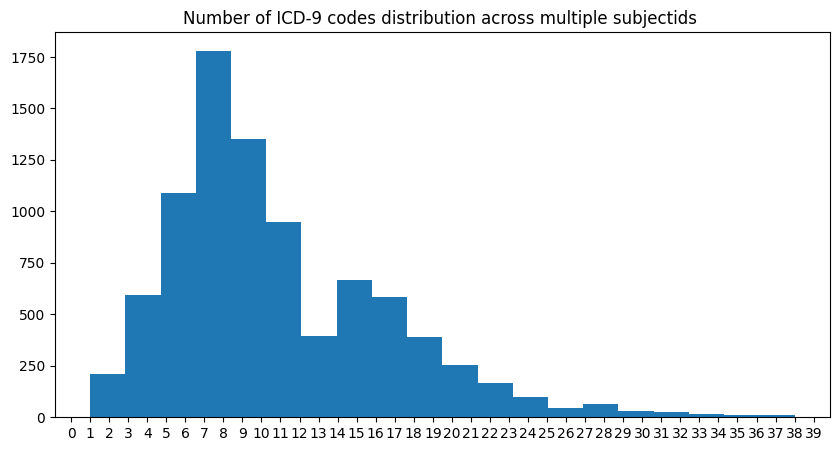

In [647]:
plt.figure(figsize=(10,5))
plt.hist(test_df.id.value_counts(),bins =20)
plt.xticks(range(0,40))
plt.title('Number of ICD-9 codes distribution across multiple subjectids ')
plt.show()

In [651]:
value_counts = test_df['id'].value_counts()

count_of_counts = value_counts.value_counts()


count_of_counts_dict = count_of_counts.to_dict()

# Display the dictionary
print("Dictionary of count of counts:\n", count_of_counts_dict)

Dictionary of count of counts:
 {8: 950, 9: 848, 7: 831, 6: 613, 10: 506, 11: 478, 5: 477, 12: 472, 13: 394, 4: 351, 14: 339, 16: 329, 15: 327, 17: 254, 3: 243, 18: 218, 19: 170, 20: 152, 2: 150, 21: 101, 22: 91, 23: 75, 1: 62, 24: 56, 26: 45, 25: 44, 27: 32, 28: 32, 29: 20, 31: 17, 30: 12, 32: 9, 33: 8, 36: 7, 37: 6, 34: 6, 38: 5, 35: 3}


In [668]:
precision_list = []
for i,j in count_of_counts_dict.items() : 
    if i <=8 : 
        precision = j/(j+count_of_counts_dict[8])
        precision_list.append(precision)
    else : 
        precision_list.append(1)
        

In [670]:
assert len(precision_list) == len(list(count_of_counts_dict.keys()))

In [671]:
np.mean(precision_list)

0.8516885026702594

In [660]:
sum(count_of_counts)

8733

In [661]:
np.median(list(test_df.id.value_counts()))

9.0

In [483]:
weightage_range = range(1,40)
limit_range = [41]

best_weightage = None
best_limit = None
best_auroc_score = -np.inf

for weightage in tqdm(weightage_range, desc='Weightage'):
    for limit in tqdm(limit_range, desc='Limit', leave=False):
        
        true_labels = []
        predicted_labels = []
        
        for i, j in raw_test_df.iterrows(): 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            pred_labels = get_prioritized_relationships(j.Symptoms, weightage=weightage, limit=limit)[0]
            predicted_labels.append(pred_labels)
            if i == 100: 
                break
        
        true_binary_matrix = create_binary_matrix(true_labels, classes)
        predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)
        
        auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
        
        if auroc_score > best_auroc_score:
            best_auroc_score = auroc_score
            best_weightage = weightage
            best_limit = limit

print(f"Best Weightage: {best_weightage}")
print(f"Best Limit: {best_limit}")
print(f"Best AUROC Score: {best_auroc_score}")


Weightage: 100%|██████████| 39/39 [01:04<00:00,  1.65s/it]

Best Weightage: 22
Best Limit: 41
Best AUROC Score: 0.5662835426676627


In [484]:
# weightage_range = [2,3,5,7,10,15,20] 
# limit_range = [4,5,6,7,8,9,10,12,15,20,25,30]
weightage_range = range(1,40)
limit_range = [41]

best_weightage = None
best_limit = None
best_recall_score = -np.inf


for weightage in tqdm(weightage_range, desc='Weightage'):
    for limit in tqdm(limit_range, desc='Limit', leave=False):
        
        true_labels = []
        predicted_labels = []
        
        for i, j in raw_test_df.iterrows(): 
            true_label = j.Category.split(',')
            true_labels.append(true_label)
            pred_labels = get_prioritized_relationships(j.Symptoms, weightage=weightage, limit=limit)[0]
            predicted_labels.append(pred_labels)
            if i == 100:  
                break
        
        true_binary_matrix = create_binary_matrix(true_labels, classes)
        predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)
       
        recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro')
    
        if recall > best_recall_score:
            best_recall_score = recall
            best_weightage = weightage
            best_limit = limit

print(f"Best Weightage: {best_weightage}")
print(f"Best Limit: {best_limit}")
print(f"Best Recall Score: {best_recall_score}")


Weightage: 100%|██████████| 39/39 [01:18<00:00,  2.02s/it]

Best Weightage: 1
Best Limit: 41
Best Recall Score: 0.9697933227344993


In [485]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [672]:
# weightage_range = [2,3,5,7,10,15,20] 
# limit_range = [4,5,6,7,8,9,10,12,15,20,25,30]
weightage_range = [1]
limit_range = [5,10,15,20,25,30,35]

best_weightage = None
best_limit = None
best_precision_score = -np.inf

for weightage in tqdm(weightage_range, desc='Weightage'):
    for limit in tqdm(limit_range, desc='Limit', leave=False):
        
        true_labels = []
        predicted_labels = []
        
        for i, j in raw_test_df.iterrows(): 
            true_label = j.Category.split(',')
            true_labels.append(true_label)
            pred_labels = get_prioritized_relationships(j.Symptoms, weightage=weightage, limit=limit)[0]
            predicted_labels.append(pred_labels)
            if i == 100:  
                break
        
        true_binary_matrix = create_binary_matrix(true_labels, classes)
        predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)
        
        precision = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro')
        
   
        if precision > best_precision_score:
            best_precision_score = precision
            best_weightage = weightage
            best_limit = limit

print(f"Best Weightage: {best_weightage}")
print(f"Best Limit: {best_limit}")
print(f"Best Precision Score: {best_precision_score}")


Weightage: 100%|██████████| 1/1 [00:11<00:00, 11.29s/it]

Best Weightage: 1
Best Limit: 10
Best Precision Score: 0.531130876747141


> #### Check if the classes are in test dataset or not

In [213]:
classes = ['276', '428', '518', '038', '427', '584']  

def create_binary_matrix(labels, classes):
 
    binary_matrix = np.zeros((len(labels), len(classes)), dtype=int)
    

    for i, label_list in enumerate(labels):
        for label in label_list:
            if label in classes:
                idx = classes.index(label)
                binary_matrix[i, idx] = 1
                
    return binary_matrix

true_labels = [
    ['276', '498','034'],  
    ['427', '584','518']

]

predicted_labels = [
    ['276', '038','034'],  
    ['927', '427','518']

]

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)
true_binary_matrix, predicted_binary_matrix

(array([[1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 1]]),
 array([[1, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0]]))

In [214]:
def roc_auc(probs, labels, multilabel=False, average='macro', multi_class='ovo'):
    if isinstance(labels, list):
        labels = np.array(labels, dtype=int)
    else:
        labels = labels.astype(int)

    y_score = probs

    if multilabel:

        dim_size = len(labels[0])
        
        mask = np.ones((dim_size), dtype=bool)
        
        for c in range(dim_size):
            if max(labels[:, c]) == 0:
                mask[c] = False

        labels = labels[:, mask]
        y_score = np.array(probs)[:, mask]
        
        print(labels)
        print(y_score)
        filtered_cols = np.count_nonzero(mask == False)
        print(f"{filtered_cols} columns not considered for ROC AUC calculation!")

    return roc_auc_score(y_true=labels, y_score=y_score, average=average, multi_class=multi_class)


auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"AUROC Score: {auroc_score}")


[[1 0 0 0]
 [0 1 1 1]]
[[1 0 0 0]
 [0 1 1 0]]
2 columns not considered for ROC AUC calculation!
AUROC Score: 0.875


In [216]:
precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 0.5
Recall: 0.5
F1-Score: 0.5


# CODE RANGE ICD-9-CM SECTIONS

- **001-139** INFECTIOUS AND PARASITIC DISEASES (001-139)
- **140-239** NEOPLASMS (140-239)
- **240-279** ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES, AND IMMUNITY DISORDERS (240-279)
- **280-289** DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS (280-289)
- **290-319** MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DISORDERS (290-319)
- **320-389** DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS (320-389)
- **390-459** DISEASES OF THE CIRCULATORY SYSTEM (390-459)
- **460-519** DISEASES OF THE RESPIRATORY SYSTEM (460-519)
- **520-579** DISEASES OF THE DIGESTIVE SYSTEM (520-579)
- **580-629** DISEASES OF THE GENITOURINARY SYSTEM (580-629)
- **630-679** COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND THE PUERPERIUM (630-679)
- **680-709** DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE (680-709)
- **710-739** DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE (710-739)
- **740-759** CONGENITAL ANOMALIES (740-759)
- **760-779** CERTAIN CONDITIONS ORIGINATING IN THE PERINATAL PERIOD (760-779)
- **780-799** SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS (780-799)
- **800-999** INJURY AND POISONING (800-999)
- **E000-E999** SUPPLEMENTARY CLASSIFICATION OF EXTERNAL CAUSES OF INJURY AND POISONING (E000-E999)
- **V01-V91** SUPPLEMENTARY CLASSIFICATION OF FACTORS INFLUENCING HEALTH STATUS AND CONTACT WITH HEALTH SERVICES (V01-V91)


In [224]:
short_codes_inst = test_df.copy()

### Neoplasms

In [234]:
neoplasm_list = []
for i,j in test_df.iterrows() :
    try :
        j.short_codes = int(j.short_codes) 
        if (j.short_codes>=140) & (j.short_codes<=239) : 
            neoplasm_list.append(j)
    except : 
        continue

In [236]:
neoplasm_df = pd.DataFrame(neoplasm_list).reset_index(drop = True)
neoplasm_df.head()

,Symptoms,Diseases,id,icd_9_desc,text,long_texts,short_texts,discharge_summary,short_codes
0,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,212
1,"[hematocrit drop, dark stool, melenotic-appear...","[left distal radius fracture, left ulna fractu...",109589,Closed fracture of lower end of radius with ul...,CHIEF COMPLAINT: fall\n\nPRESENT ILLNESS: [**A...,Closed fracture of lower end of radius with ul...,"Fx low radius w ulna-cl,Blood in stool,Thrombo...",Admission Date: [**2165-4-24**] ...,238
2,"[hematocrit drop, dark stool, melenotic-appear...","[left distal radius fracture, left ulna fractu...",109589,Closed fracture of lower end of radius with ul...,CHIEF COMPLAINT: fall\n\nPRESENT ILLNESS: [**A...,Closed fracture of lower end of radius with ul...,"Fx low radius w ulna-cl,Blood in stool,Thrombo...",Admission Date: [**2165-4-24**] ...,239
3,"[syncope, UGIB, melenotic stool, urge to have ...","[end stage renal disease, hypertension, hyperc...",161038,Chronic or unspecified gastric ulcer with hemo...,"CHIEF COMPLAINT: syncope, UGIB\n\nPRESENT ILLN...",Chronic or unspecified gastric ulcer with hemo...,"Chr stomach ulc w hem,Ac posthemorrhag anemia,...",Admission Date: [**2105-1-30**] ...,154
4,"[one day headache on the left, vomiting, incre...","[cerebellar astrocytoma, recurrence of tumor, ...",179776,Chronic viral hepatitis B without mention of h...,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: The pati...,Chronic viral hepatitis B without mention of h...,"Hpt B chrn wo cm wo dlta,Pancreatic disorder N...",Admission Date: [**2195-8-26**] Dischar...,191


In [238]:
neoplasm_df.short_codes.nunique()

60

In [251]:
neoplasm_classes = list(set(neoplasm_df.short_codes))
print(neoplasm_classes)

[141, 142, 144, 145, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 161, 162, 163, 164, 171, 172, 173, 174, 180, 182, 183, 184, 185, 188, 189, 191, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 208, 209, 211, 212, 214, 215, 218, 220, 225, 227, 228, 230, 233, 235, 236, 237, 238, 239]


In [242]:
true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
    true_label = j.short_codes.split(',')
    true_labels.append(list(set(true_label)))
    pred_labels = get_prioritized_relationships(j.Symptoms,weightage=1,limit = 8)[0]
    predicted_labels.append(pred_labels)


2686it [00:51, 51.96it/s]


['785', '441', '746', '424']

In [252]:
    
true_binary_matrix = create_binary_matrix(true_labels, neoplasm_classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, neoplasm_classes)

true_binary_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [253]:
predicted_binary_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [254]:


def roc_auc_group(probs, labels, multilabel=False, average='macro', multi_class='ovo'):
    if isinstance(labels, list):
        labels = np.array(labels, dtype=int)
    else:
        labels = labels.astype(int)

    y_score = np.array(probs)

    if multilabel:
        mask_samples = np.any(labels > 0, axis=1)


        labels = labels[mask_samples]
        y_score = y_score[mask_samples]

 
        if labels.size == 0:
            print("No valid samples left after filtering. ROC AUC cannot be calculated.")
            return None
        
        dim_size = len(labels[0])
        mask_classes = np.ones((dim_size), dtype=bool)
        
        for c in range(dim_size):
            if max(labels[:, c]) == 0:
                mask_classes[c] = False

        labels = labels[:, mask_classes]
        y_score = y_score[:, mask_classes]
        
        filtered_cols = np.count_nonzero(mask_classes == False)
        print(f"{filtered_cols} columns not considered for ROC AUC calculation!")

    else:

        mask_samples = labels > 0
        
        labels = labels[mask_samples]
        y_score = y_score[mask_samples]

        if labels.size == 0:
            print("No valid samples left after filtering. ROC AUC cannot be calculated.")
            return None

    return roc_auc_score(y_true=labels, y_score=y_score, average=average, multi_class=multi_class)


In [262]:
neoplasm_classes = str(neoplasm_classes)[1:-1].split(', ')

In [264]:
neoplasm_classes[0]

'141'

In [265]:
    
true_binary_matrix = create_binary_matrix(true_labels, neoplasm_classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, neoplasm_classes)

auroc_score = roc_auc_group(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"AUROC Score: {auroc_score}")

0 columns not considered for ROC AUC calculation!
AUROC Score: 0.5039886288351835


In [626]:
import json
from neo4j import GraphDatabase
from sklearn.metrics import precision_score, recall_score, f1_score

def parse_disease_classes(filepath):
    disease_class_map = {}
    with open(filepath, 'r') as file:
        lines = file.readlines()
        current_class = ""
        for line in lines:
            line = line.strip()
            if line.startswith('[') and line.endswith(']'):
                range_values = line[1:-1].split('-')
                start = int(range_values[0])
                end = int(range_values[-1]) + 1
                for i in range(start, end):
                    disease_class_map[str(i).zfill(2)] = current_class
            else:
                current_class = line
    # print(disease_class_map)
    return disease_class_map

class Neo4jEvaluator:

    def __init__(self, uri, user, password):
        self.driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self.driver.close()

    def query_diseases(self, symptoms):
        query = """
        MATCH (s:Symptom)-[r:ASSOCIATED_WITH]->(d:Disease)
            WHERE s.name IN $symptoms 
            WITH d.title AS disease_id, collect(s.name) AS symptoms, SUM(r.weight) AS total_weight
            RETURN disease_id, symptoms, total_weight
            ORDER BY total_weight DESC
            LIMIT 10
        """
        with self.driver.session() as session:
            result = session.run(query, symptoms=symptoms)
            return [record["disease_id"] for record in result]

    def evaluate(self, y_true, y_pred, disease_class_map):
        true_positive = 0
        for pred in y_pred:
            pred_class = disease_class_map.get(pred[:2])
            for actual in y_true:
                actual_class = disease_class_map.get(actual[:2])
                if pred_class == actual_class:
                    true_positive += 1
                    break

        precision = true_positive / len(y_pred) if y_pred else 0
        recall = true_positive / len(y_true) if y_true else 0
        f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        return precision, recall, f1

def load_data_from_json(filepath):
    with open(filepath, 'r') as file:
        data = json.load(file)
    return data





In [627]:
# uri = "bolt://localhost:7687"
# user = "neo4j"
# password = "neo4j_pass5"
# evaluator = Neo4jEvaluator(uri, user, password)
# raw_test_df.info()
# df_selected = raw_test_df[['Symptoms', 'Category']]
# json_result = df_selected.to_json(orient='records')
# data = json.loads(json_result)
# disease_class_map = parse_disease_classes("disease_classes.txt")
# precision_scores = []
# recall_scores = []
# f1_scores = []

# for entry in tqdm(data):
#     symptoms = entry["Symptoms"]
#     y_true = entry["Category"]

#     y_pred = evaluator.query_diseases(symptoms)

#     # Calculate precision, recall, and F1-score
#     precision, recall, f1 = evaluator.evaluate(y_true, y_pred, disease_class_map)
#     precision_scores.append(precision)
#     recall_scores.append(recall)
#     f1_scores.append(f1)

#     # print(f"Symptoms: {symptoms}")
#     # print(f"Actual Diseases: {y_true}")
#     # print(f"Predicted Diseases: {y_pred}")
#     # print(f"Precision: {precision}")
#     # print(f"Recall: {recall}")
#     # print(f"F1-Score: {f1}")
#     # print("-" * 40)

# #averages
# avg_precision = sum(precision_scores) / len(precision_scores)
# avg_recall = sum(recall_scores) / len(recall_scores)
# avg_f1 = sum(f1_scores) / len(f1_scores)

# print(f"Average Precision: {avg_precision}")
# print(f"Average Recall: {avg_recall}")
# print(f"Average F1-Score: {avg_f1}")



## Single symptom

In [682]:
print(classes)

['28', '71-73', 'V88-V88', '68-70', 'V20-V29', '39-45', 'V90-V90', '21-23', 'V60-V69', 'V10-V19', '24-27', '80-83', '78', '52-57', '36-38', '58-62', '74-75', '67', '76-77', '63-66', '11-13', 'V87-V87', '46-51', '79', 'V70-V82', '32-35', 'E00-E09', 'V40-V49', 'V85-V85', '14-20', '29-31', '00-10', 'V01-V09', 'V50-V59', 'V83-V84', '84-95', '96-99', 'V30-V39']


In [718]:
len(classes)

38

In [1130]:

true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        if len(j.Symptoms)==1 : 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            pred_labels = get_prioritized_relationships(j.Symptoms,weightage=1,limit= 10)[0]
            predicted_labels.append(pred_labels)

print(f"Number of rows : {len(true_labels)}")

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"Macro Averaged AUROC Score: {auroc_score}")


precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


print(f"Micro Averaged Precision: {precision}")
print(f"Micro Averaged Recall: {recall}")
print(f"Micro Averaged F1-Score: {f1}")

print(f"Macro Averaged Precision: {precision_m}")
print(f"Macro Averaged Recall: {recall_m}")
print(f"Macro Averaged F1-Score: {f1_m}")

8733it [00:04, 1907.15it/s]

Number of rows : 224
Macro Averaged AUROC Score: 0.5068289635618425
Micro Averaged Precision: 0.31733167082294267
Micro Averaged Recall: 0.49369544131910764
Micro Averaged F1-Score: 0.38633776091081595
Macro Averaged Precision: 0.12408923705682663
Macro Averaged Recall: 0.18972692454617168
Macro Averaged F1-Score: 0.13480621268739842


## Double symptoms

In [1131]:

true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        if len(j.Symptoms)==2 : 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            pred_labels = get_prioritized_relationships(j.Symptoms,weightage=1,limit= 10 )[0]
            predicted_labels.append(pred_labels)


print(f"Number of rows : {len(true_labels)}")

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"Macro Averaged AUROC Score: {auroc_score}")


precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


print(f"Micro Averaged Precision: {precision}")
print(f"Micro Averaged Recall: {recall}")
print(f"Micro Averaged F1-Score: {f1}")

print(f"Macro Averaged Precision: {precision_m}")
print(f"Macro Averaged Recall: {recall_m}")
print(f"Macro Averaged F1-Score: {f1_m}")

8733it [00:07, 1152.29it/s]


Number of rows : 536
Macro Averaged AUROC Score: 0.5245946147282452
Micro Averaged Precision: 0.36271186440677966
Micro Averaged Recall: 0.6109921484653819
Micro Averaged F1-Score: 0.45519808561552777
Macro Averaged Precision: 0.1710872137616247
Macro Averaged Recall: 0.2618989369169021
Macro Averaged F1-Score: 0.1866493859124167


## Triple symptoms

In [1132]:

true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        if len(j.Symptoms)==3 : 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            pred_labels = get_prioritized_relationships(j.Symptoms,weightage=1,limit= 10)[0]
            predicted_labels.append(pred_labels)


print(f"Number of rows : {len(true_labels)}")

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"Macro Averaged AUROC Score: {auroc_score}")


precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


print(f"Micro Averaged Precision: {precision}")
print(f"Micro Averaged Recall: {recall}")
print(f"Micro Averaged F1-Score: {f1}")

print(f"Macro Averaged Precision: {precision_m}")
print(f"Macro Averaged Recall: {recall_m}")
print(f"Macro Averaged F1-Score: {f1_m}")


8733it [00:12, 707.56it/s]


Number of rows : 818
Macro Averaged AUROC Score: 0.520751796326905
Micro Averaged Precision: 0.37410910975767786
Micro Averaged Recall: 0.6347845206684257
Micro Averaged F1-Score: 0.47077048512026093
Macro Averaged Precision: 0.18695351641658803
Macro Averaged Recall: 0.2791883451188298
Macro Averaged F1-Score: 0.19756081205626322


## More than three symptoms

In [1135]:

true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        if len(j.Symptoms)>3 : 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            pred_labels = get_prioritized_relationships(j.Symptoms,weightage=1,limit= 10 )[0]
            predicted_labels.append(pred_labels)


print(f"Number of rows : {len(true_labels)}")

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"Macro Averaged AUROC Score: {auroc_score}")


precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


print(f"Micro Averaged Precision: {precision}")
print(f"Micro Averaged Recall: {recall}")
print(f"Micro Averaged F1-Score: {f1}")

print(f"Macro Averaged Precision: {precision_m}")
print(f"Macro Averaged Recall: {recall_m}")
print(f"Macro Averaged F1-Score: {f1_m}")

8733it [02:05, 69.77it/s]


Number of rows : 7155
Macro Averaged AUROC Score: 0.5194722313155794
Micro Averaged Precision: 0.4391891891891892
Micro Averaged Recall: 0.6707436292933023
Micro Averaged F1-Score: 0.5308129389414687
Macro Averaged Precision: 0.21904550193671773
Macro Averaged Recall: 0.28918438269603636
Macro Averaged F1-Score: 0.21817262588271125


| Type                       | Number of Rows | Macro Averaged AUROC Score | Micro Averaged Precision | Micro Averaged Recall | Micro Averaged F1-Score | Macro Averaged Precision | Macro Averaged Recall | Macro Averaged F1-Score |
|----------------------------|----------------|----------------------------|--------------------------|-----------------------|-------------------------|--------------------------|-----------------------|-------------------------|
| Single Symptom              | 224            | 0.4723445909278866          | 0.16290212183436004       | 0.6925315227934045     | 0.26376062061322497      | 0.11825917706440202       | 0.43180014769528724    | 0.1590802227349518       |
| Two Symptoms                | 536            | 0.5202401454442502          | 0.18903730249226258       | 0.8283369022127052     | 0.30782493368700264      | 0.13995083123499627       | 0.6043024076921084     | 0.19748417282824415      |
| Three Symptoms              | 818            | 0.507191708694502           | 0.18194150063586265       | 0.9437115215479331     | 0.3050678797355889       | 0.14847040067553025       | 0.7469264629850801     | 0.21789116867971023      |
| More than Three Symptoms    | 7155           | 0.5158831933120694          | 0.22374881843496922       | 0.9513371423605831     | 0.36228934501501575      | 0.17221372751016636       | 0.7468493254495923     | 0.2476602454171145       |


### PubMED KG


In [720]:
uri = "neo4j://localhost:8687" 
auth = ("neo4j", "neo4j_pass7")

driver = GraphDatabase.driver(uri, auth=auth) 
driver.verify_connectivity()



In [760]:
import os
from py2neo import Graph
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage
from neo4j import GraphDatabase
from dotenv import load_dotenv
import json


driver = GraphDatabase.driver(uri, auth=auth) 
driver.verify_connectivity()

with open('mapped_terms_icd9.json', 'r') as file:
    data = file.read()  # Read the content of the file

# Parse the JSON data
parsed_data = json.loads(data)

result = {}

for key, values in parsed_data.items():
    filtered_diseases = {}
    for value in values:
        disease_info = value['disease'].split(' - ')
        disease_code = disease_info[0].strip()
        disease_desc = disease_info[1].strip()
        euclidean_distance = float(disease_info[2].strip())
        
        if disease_code not in filtered_diseases or filtered_diseases[disease_code]['euclidean_distance'] > euclidean_distance:
            filtered_diseases[disease_code] = {
                'disease_code': disease_code,
                'disease_desc': disease_desc,
                'euclidean_distance': euclidean_distance,
                'pos_weight': value['pos_weight']
            }
    
    result[key] = list(filtered_diseases.values())

with open('output_pubmed.json', 'w') as f:
    json.dump(result, f, indent=4)

In [761]:
def delete_all_data():
    with driver.session() as session:
        session.run("MATCH (n) DETACH DELETE n")
        print("All data has been deleted.")

# delete_all_data()

In [763]:
for i,j in result.items():
    for k in j : 
        if  k['disease_code'].startswith("V") : 
            k['disease_code'] = k['disease_code'][:3]
        elif k['disease_code'].startswith("E") : 
            k['disease_code'] = k['disease_code'][:3]
        else :  k['disease_code'] =  k['disease_code'][:2]


In [766]:
# from tqdm import tqdm

# def create_graph(result):
#     with driver.session() as session:
#         for symptom, diseases in tqdm(result.items()):
#             for disease in diseases:
#                 try:
#                     # Extract attributes from disease data
#                     disease_code = disease['disease_code']
#                     euclidean_distance = float(disease['euclidean_distance'])
#                     pos_weight = int(disease['pos_weight'])
                    
#                     # Create or update Symptom node
#                     session.run("MERGE (s:Symptom {name: $name})", name=symptom)
                    
#                     # Create or update Disease node with attributes
#                     session.run("""
#                         MERGE (d:Disease {name: $name})
#                         ON CREATE SET d.disease_code = $disease_code
#                         ON MATCH SET d.disease_code = $disease_code
#                     """, name=disease['disease_code'], disease_code=disease_code)
                    
#                     # Create or update the relationship with attributes
#                     session.run("""
#                         MATCH (s:Symptom {name: $symptom}), (d:Disease {name: $disease_code})
#                         MERGE (s)-[r:ASSOCIATED_WITH]->(d)
#                         ON CREATE SET r.euclidean_distance = $euclidean_distance, r.pos_weight = $pos_weight
#                         ON MATCH SET r.euclidean_distance = $euclidean_distance, r.pos_weight = $pos_weight
#                     """, symptom=symptom, disease_code=disease_code, euclidean_distance=euclidean_distance, pos_weight=pos_weight)
#                 except Exception as e:
#                     print(f"An error occurred: {e}")

# create_graph(result)


In [783]:
def get_prioritized_relationships_pubmed(symptom_names, weightage=1, limit=40):
    with driver.session() as session:
        result = session.run(f"""
            MATCH (s:Symptom)-[r:ASSOCIATED_WITH]->(d:Disease)
            WHERE s.name IN $symptoms AND r.pos_weight >= $weightage
            RETURN s.name AS symptom, d.disease_code AS disease_name, r.pos_weight AS weight, r.euclidean_distance AS distance
            ORDER BY r.pos_weight DESC, r.euclidean_distance ASC
            LIMIT $limit
        """, symptoms=symptom_names, weightage=weightage, limit=limit)
        
        codes = []
        all_info = {}

        for record in result:
            codes.append(record['disease_name'])
            all_info[record['disease_name']] = [record['disease_name'], record['weight']]
            
        return codes, all_info


### Single Symptom

In [812]:

true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        if len(j.Symptoms)==1 : 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            pred_labels = get_prioritized_relationships_pubmed(j.Symptoms,weightage=1,limit= 20)[0]
            predicted_labels.append(pred_labels)

print(f"Number of rows : {len(true_labels)}")

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"Macro Averaged AUROC Score: {auroc_score}")

precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


print(f"Micro Averaged Precision: {precision}")
print(f"Micro Averaged Recall: {recall}")
print(f"Micro Averaged F1-Score: {f1}")

print(f"Macro Averaged Precision: {precision_m}")
print(f"Macro Averaged Recall: {recall_m}")
print(f"Macro Averaged F1-Score: {f1_m}")

8733it [00:00, 9235.41it/s] 

Number of rows : 224
Macro Averaged AUROC Score: 0.50084419195932
Micro Averaged Precision: 0.6666666666666666
Micro Averaged Recall: 0.0019398642095053346
Micro Averaged F1-Score: 0.0038684719535783366
Macro Averaged Precision: 0.05263157894736842
Macro Averaged Recall: 0.0014097744360902255
Macro Averaged F1-Score: 0.0027382430668322346


### Two Symptoms

In [786]:
len(classes)

38

In [815]:

true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        if len(j.Symptoms)==2 : 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            pred_labels = get_prioritized_relationships_pubmed(j.Symptoms,weightage=1,limit= 20 )[0]
            predicted_labels.append(pred_labels)


print(f"Number of rows : {len(true_labels)}")

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"Macro Averaged AUROC Score: {auroc_score}")


precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


print(f"Micro Averaged Precision: {precision}")
print(f"Micro Averaged Recall: {recall}")
print(f"Micro Averaged F1-Score: {f1}")

print(f"Macro Averaged Precision: {precision_m}")
print(f"Macro Averaged Recall: {recall_m}")
print(f"Macro Averaged F1-Score: {f1_m}")

8733it [00:02, 3979.93it/s]

Number of rows : 536
Macro Averaged AUROC Score: 0.500670662489286
Micro Averaged Precision: 0.3448275862068966
Micro Averaged Recall: 0.0035688793718772305
Micro Averaged F1-Score: 0.007064641469445425
Macro Averaged Precision: 0.01864035087719298
Macro Averaged Recall: 0.002321981424148607
Macro Averaged F1-Score: 0.003976005762019045


### Three Symptoms

In [817]:

true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        if len(j.Symptoms)==3 : 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            pred_labels = get_prioritized_relationships_pubmed(j.Symptoms,weightage=1,limit= 20)[0]
            predicted_labels.append(pred_labels)


print(f"Number of rows : {len(true_labels)}")

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"Macro Averaged AUROC Score: {auroc_score}")


precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


print(f"Micro Averaged Precision: {precision}")
print(f"Micro Averaged Recall: {recall}")
print(f"Micro Averaged F1-Score: {f1}")

print(f"Macro Averaged Precision: {precision_m}")
print(f"Macro Averaged Recall: {recall_m}")
print(f"Macro Averaged F1-Score: {f1_m}")


8733it [00:03, 2301.59it/s]

Number of rows : 818
Macro Averaged AUROC Score: 0.5006257544412546
Micro Averaged Precision: 0.37209302325581395
Micro Averaged Recall: 0.007036059806508356
Micro Averaged F1-Score: 0.013810962451445835
Macro Averaged Precision: 0.02046783625730994
Macro Averaged Recall: 0.0034880475772867715
Macro Averaged F1-Score: 0.005958210256406556


### More than three Symptoms

In [841]:
raw_test_df.head()

,id,Symptoms,Diseases,Category
0,100010,"[Gross hematuria, Weight loss, Fullness in lef...","[Metastatic renal cell carcinoma, Renal mass, ...","14-20,14-20,14-20,14-20,24-27"
1,100012,[exertional angina],"[coronary artery disease, hypertension, hyperc...","39-45,96-99,39-45,39-45,24-27,V10-V19,V40-V49,..."
2,100016,"[Respiratory failure, Labored breathing, Acces...","[Downs Syndrome, MRSA pneumonia, Tracheostomy,...","46-51,46-51,24-27,46-51,74-75,32-35,24-27,39-4..."
3,100019,"[heart murmur since childhood, increase in the...","[Bicuspid aortic valve, Dilated aorta, Aortic ...","39-45,74-75,39-45,78"
4,100028,"[Right upper quadrant pain, Fever, Elevated LF...","[Mild mental retardation, Cholangitis, Choledo...","52-57,00-10,46-51,52-57,96-99,39-45,28,84-95"


In [808]:

true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        if len(j.Symptoms)>3 : 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            pred_labels = get_prioritized_relationships_pubmed(j.Symptoms,weightage=1,limit= 20 )[0]
            predicted_labels.append(pred_labels)


print(f"Number of rows : {len(true_labels)}")

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"Macro Averaged AUROC Score: {auroc_score}")


precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


print(f"Micro Averaged Precision: {precision}")
print(f"Micro Averaged Recall: {recall}")
print(f"Micro Averaged F1-Score: {f1}")

print(f"Macro Averaged Precision: {precision_m}")
print(f"Macro Averaged Recall: {recall_m}")
print(f"Macro Averaged F1-Score: {f1_m}")


8733it [00:21, 402.20it/s]


Number of rows : 7155
Macro Averaged AUROC Score: 0.5004233387222278
Micro Averaged Precision: 0.3519870235198702
Micro Averaged Recall: 0.009428428667637026
Micro Averaged F1-Score: 0.018364928909952605
Macro Averaged Precision: 0.02301098936070341
Macro Averaged Recall: 0.0051244394857085625
Macro Averaged F1-Score: 0.008150787835512768


PUBMED KG
| Symptoms               | Number of Rows | Macro Averaged AUROC Score | Micro Averaged Precision | Micro Averaged Recall | Micro Averaged F1-Score | Macro Averaged Precision | Macro Averaged Recall | Macro Averaged F1-Score |
|------------------------|----------------|----------------------------|--------------------------|-----------------------|--------------------------|--------------------------|-----------------------|--------------------------|
| Single symptom         | 224            | 0.500         | 0.6666666666666666        | 0.0019398642095053346  | 0.0038684719535783366    | 0.05263157894736842       | 0.0014097744360902255 | 0.0027382430668322346    |
| Two symptoms           | 536            | 0.500        | 0.3448275862068966        | 0.0035688793718772305  | 0.007064641469445425     | 0.01864035087719298       | 0.002321981424148607  | 0.003976005762019045     |
| Three symptoms         | 818            | 0.500        | 0.37209302325581395       | 0.007036059806508356   | 0.013810962451445835     | 0.02046783625730994       | 0.0034880475772867715 | 0.005958210256406556     |
| More than 3 symptoms   | 7155           | 0.500      | 0.3519870235198702        | 0.009428428667637026   | 0.018364928909952605     | 0.02301098936070341       | 0.0051244394857085625 | 0.008150787835512768     |


### MIMIC KG (RAG)

In [818]:
icd_df

,ROW_ID,short_codes,SHORT_TITLE,LONG_TITLE
0,174,01,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."
...,...,...,...,...
14562,14432,V73,Scrn unspcf viral dis,Special screening examination for unspecified ...
14563,14433,V74,Screening for cholera,Screening examination for cholera
14564,14434,V74,Screening-pulmonary TB,Screening examination for pulmonary tuberculosis
14565,14435,V74,Screening for leprosy,Screening examination for leprosy (Hansen's di...


In [960]:
print(classes)

['28', '71-73', 'V88-V88', '68-70', 'V20-V29', '39-45', 'V90-V90', '21-23', 'V60-V69', 'V10-V19', '24-27', '80-83', '78', '52-57', '36-38', '58-62', '74-75', '67', '76-77', '63-66', '11-13', 'V87-V87', '46-51', '79', 'V70-V82', '32-35', 'E00-E09', 'V40-V49', 'V85-V85', '14-20', '29-31', '00-10', 'V01-V09', 'V50-V59', 'V83-V84', '84-95', '96-99', 'V30-V39']


In [1015]:
# pip install groq

In [1016]:
from groq import Groq

In [1153]:

def aug_and_gen(codes, symptom, model ='mistral', method = 'rag') : 

    prompt_start = f"""You are an AI medical assistant tasked with identifying the top most relevant ICD-9 code categories (e.g.'11-13','14-20','21-23','24-27',etc) for a given symptom, based on a provided list of code categories and category name
Symptoms: {symptom}"""
    kg_prompt = """
Task:
Output only a Python list of relevant ICD-9 code categories.

Format:
['XX-XX', 'XX-XX', 'XX-XX', 'XX-XX', 'XX-XX', 'XX-XX', 'XX-XX', 'XX-XX']

Important:
Don't consider the code to be included in JSON if it doesn't relate to the symptoms provided.

Rules:
1. Use only code categories in the format 'XX-XX' or 'XX' (e.g., '39-45', '78').
2. Include only most relevant categories from the provided outputs for the symptoms.
3. Output only the list, nothing else.
4. Do not include any explanations, comments, or additional text before or after the list.
5. Use single quotes for each category.
6. Separate categories with commas and spaces.
7. The entire list must be on a single line.
8. Do not mention the symptom in your output.
9. Do not describe or explain the categories.
10. Do not mention the number of categories or rows.
11. Make sure the chosen categories are one of them : ['28', '71-73', 'V88-V88', '68-70', 'V20-V29', '39-45', 'V90-V90', '21-23', 'V60-V69', 'V10-V19', '24-27', '80-83', '78', '52-57', '36-38', '58-62', '74-75', '67', '76-77', '63-66', '11-13', 'V87-V87', '46-51', '79', 'V70-V82', '32-35', 'E00-E09', 'V40-V49', 'V85-V85', '14-20', '29-31', '00-10', 'V01-V09', 'V50-V59', 'V83-V84', '84-95', '96-99', 'V30-V39']

Relevant Outputs (list only):"""
    
    only_llm_prompt_start = f"""You are an AI medical assistant tasked with identifying the top most relevant ICD-9 code categories (e.g.'11-13','14-20','21-23','24-27',etc) for a given symptom, based on a provided list of code categories and category name
Symptoms: {symptom}"""
    only_llm_prompt = """
Given these code categories and their meanings below in a list of tuples, in which of these categories do you think the above symptoms of a patient lie in: 
>>> (Categories, Meanings) : [('14-20', 'Malignant neoplasms'), ('V30-V39', 'Liveborn Infants According To Type Of Birth'), ('V88-V88', 'Acquired Absence Of Other Organs And Tissue'), ('V40-V49', 'Persons With A Condition Influencing Their Health Status'), ('29-31', 'Mental disorders'), ('78', 'Symptoms'), ('67', 'Complications Of puerperium'), ('46-51', 'Diseases Of The Respiratory System'), ('96-99', 'Poisoning'), ('71-73', 'Diseases Of The Musculoskeletal System And Connective Tissue'), ('V85-V85', 'Body Mass Index'), ('21-23', 'Benign neoplasms'), ('58-62', 'Diseases Of The Genitourinary System'), ('76-77', 'Certain Conditions Originating In The Perinatal Period'), ('32-35', 'Disorders of central nervous system'), ('63-66', 'Complications Of Pregnancy and Childbirth'), ('V50-V59', 'Persons Encountering Health Services For Specific Procedures And Aftercare'), ('68-70', 'Diseases Of The Skin And Subcutaneous Tissue'), ('39-45', 'Diseases Of The Circulatory System'), ('80-83', 'Fracture'), ('V10-V19', 'Persons With Potential Health Hazards Related To Personal And Family History'), ('V60-V69', 'Persons Encountering Health Services In Other Circumstances'), ('V91-V91', 'Multiple Gestation Placenta Status'), ('74-75', 'Congenital anomalies'), ('52-57', 'Diseases Of The Digestive System'), ('V90-V90', 'Retained Foreign Body'), ('36-38', 'Organ diseases'), ('28', 'Diseases of blood'), ('V89-V89', 'Other Suspected Conditions Not Found'), ('11-13', 'Parasitic diseases'), ('79', 'Findings and conditions'), ('24-27', 'Endocrine nutritional and metabolic diseases and immunity disorders'), ('V20-V29', 'Persons Encountering Health Services In Circumstances Related To Reproduction And Development'), ('V86-V86', 'Estrogen Receptor Status'), ('E00-E09', 'Supplementary Classification Of External Causes Of Injury And Poisoning'), ('00-10', 'Infectious disease'), ('V70-V82', 'Persons Without Reported Diagnosis Encountered During Examination And Investigation Of Individuals And Populations'), ('V87-V87', 'Other Specified Personal Exposures And History Presenting Hazards To Health'), ('V83-V84', 'Genetics'), ('84-95', 'Injury'), ('V01-V09', 'Persons With Potential Health Hazards Related To Communicable Diseases')]

Task:
Output only a Python list of relevant ICD-9 code categories.

Format:
['XX-XX', 'XX-XX', 'XX-XX', 'XX-XX', 'XX-XX', 'XX-XX', 'XX-XX', 'XX-XX']

Important:
Don't consider the code to be included in JSON if it doesn't relate to the symptoms provided.

Rules:
1. Use only code categories in the format 'XX-XX' or 'XX' (e.g., '39-45', '78').
2. Include only most relevant categories .
3. Output only the list, nothing else.
4. Do not include any explanations, comments, or additional text before or after the list.
5. Use single quotes for each category.
6. Separate categories with commas and spaces.
7. The entire list must be on a single line.
8. Do not mention the symptom in your output.
9. Do not describe or explain the categories.
10. Do not mention the number of categories or rows.
11. Make sure the chosen categories are one of them : ['28', '71-73', 'V88-V88', '68-70', 'V20-V29', '39-45', 'V90-V90', '21-23', 'V60-V69', 'V10-V19', '24-27', '80-83', '78', '52-57', '36-38', '58-62', '74-75', '67', '76-77', '63-66', '11-13', 'V87-V87', '46-51', '79', 'V70-V82', '32-35', 'E00-E09', 'V40-V49', 'V85-V85', '14-20', '29-31', '00-10', 'V01-V09', 'V50-V59', 'V83-V84', '84-95', '96-99', 'V30-V39']

Relevant Outputs (list only):
"""

    if model == 'mistral' : 
        model= "open-mistral-nemo-2407" 
        MISTRAL_API_KEY =  "WRhxY4qx7jsun5iYThrdS3Dk4dubsjnV"
        client = MistralClient(api_key=MISTRAL_API_KEY)

        if method == 'rag' : 

            prompt_template = prompt_start + kg_prompt + str(codes)

            chat_response = client.chat(
                model=model,
                max_tokens=200,
                temperature = 0.1,
                messages=[ChatMessage(role="user", content=prompt_template)])
            
            response = chat_response.choices[0].message.content

        if method == 'llm' : 

            prompt_template = only_llm_prompt_start + only_llm_prompt

            chat_response = client.chat(
                model=model,
                max_tokens=200,
                temperature = 0.1,
                messages=[ChatMessage(role="user", content=prompt_template)])
            
            response = chat_response.choices[0].message.content
        
    elif model == 'groq' : 
        #"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"
        # backup=
        client = Groq(
        api_key="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",
    )
        if method == 'rag' : 
            prompt_template = prompt_start + kg_prompt + str(codes)
            chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": f"{prompt_template}",
                }
            ],
            model="llama3-70b-8192",
        )

            response = chat_completion.choices[0].message.content

        if method == 'llm' : 
            prompt_template = only_llm_prompt_start + only_llm_prompt
            chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": f"{prompt_template}",
                }
            ],
            model="llama3-70b-8192",
        )

            response = chat_completion.choices[0].message.content



    return response

def codes_n_desc(list_codes, results) : 
    
    try : 
        five_codes = list_codes[2:-2].split("', '")
    except KeyError as s: 
        five_codes = list_codes[2:-2].split(", ")
    except : 
        
        five_codes = list_codes[2:-2].split('", "')
    
    return [(i,results.get(i)) for i in five_codes]

In [1140]:
disease_df = pd.read_csv('disease_classes.csv')
disease_df.head()

,Code Range,Description
0,00-10,Infectious disease
1,11-13,Parasitic diseases
2,14-20,Malignant neoplasms
3,21-23,Benign neoplasms
4,24-27,Endocrine nutritional and metabolic diseases a...


In [1141]:
# list(disease_df['Code Range'])

In [1142]:
expanded_rows = []

for index, row in disease_df.iterrows():
    code_range = row['Code Range']
    description = row['Description']
    

    codes = categories.get(code_range, [])
    
 
    for code in codes:
        expanded_rows.append({"Code": code, "Description": description})

expanded_df = pd.DataFrame(expanded_rows)

expanded_df.head()

,Code,Description
0,00,Infectious disease
1,01,Infectious disease
2,02,Infectious disease
3,03,Infectious disease
4,04,Infectious disease


In [1143]:
total_disease_df = pd.merge(expanded_df, disease_df, how = 'inner', on = 'Description')
total_disease_df.head()

,Code,Description,Code Range
0,00,Infectious disease,00-10
1,01,Infectious disease,00-10
2,02,Infectious disease,00-10
3,03,Infectious disease,00-10
4,04,Infectious disease,00-10


In [1144]:
total_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         201 non-null    object
 1   Description  201 non-null    object
 2   Code Range   201 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [1145]:
disease_df.columns = ['Code', 'Description']

In [1146]:
disease_df[disease_df.Code == 'V03']

,Code,Description


In [1147]:
print(list(set(disease_df[['Code', 'Description']].reset_index(drop = True).itertuples(index=False, name=None))))

[('14-20', 'Malignant neoplasms'), ('V30-V39', 'Liveborn Infants According To Type Of Birth'), ('V88-V88', 'Acquired Absence Of Other Organs And Tissue'), ('V40-V49', 'Persons With A Condition Influencing Their Health Status'), ('29-31', 'Mental disorders'), ('78', 'Symptoms'), ('67', 'Complications Of puerperium'), ('46-51', 'Diseases Of The Respiratory System'), ('96-99', 'Poisoning'), ('71-73', 'Diseases Of The Musculoskeletal System And Connective Tissue'), ('V85-V85', 'Body Mass Index'), ('21-23', 'Benign neoplasms'), ('58-62', 'Diseases Of The Genitourinary System'), ('76-77', 'Certain Conditions Originating In The Perinatal Period'), ('32-35', 'Disorders of central nervous system'), ('63-66', 'Complications Of Pregnancy and Childbirth'), ('V50-V59', 'Persons Encountering Health Services For Specific Procedures And Aftercare'), ('68-70', 'Diseases Of The Skin And Subcutaneous Tissue'), ('39-45', 'Diseases Of The Circulatory System'), ('80-83', 'Fracture'), ('V10-V19', 'Persons Wi

In [1148]:
filtered_df = disease_df[disease_df.Code.isin(['39-45', '24-27', '96-99', '28', '52-57', '78', 'V50-V59', '58-62', '79', 'V10-V19', '74-75', '32-35', 'V40-V49', '68-70', 'V60-V69', '71-73', '00-10', '46-51', 'V01-V09', 'V70-V82'])][['Code', 'Description']].reset_index(drop = True)
code_desc_tuples = list(set(filtered_df.itertuples(index=False, name=None)))
code_desc_tuples

[('V40-V49', 'Persons With A Condition Influencing Their Health Status'),
 ('78', 'Symptoms'),
 ('46-51', 'Diseases Of The Respiratory System'),
 ('96-99', 'Poisoning'),
 ('71-73', 'Diseases Of The Musculoskeletal System And Connective Tissue'),
 ('58-62', 'Diseases Of The Genitourinary System'),
 ('32-35', 'Disorders of central nervous system'),
 ('V50-V59',
  'Persons Encountering Health Services For Specific Procedures And Aftercare'),
 ('68-70', 'Diseases Of The Skin And Subcutaneous Tissue'),
 ('39-45', 'Diseases Of The Circulatory System'),
 ('V60-V69', 'Persons Encountering Health Services In Other Circumstances'),
 ('V10-V19',
  'Persons With Potential Health Hazards Related To Personal And Family History'),
 ('74-75', 'Congenital anomalies'),
 ('52-57', 'Diseases Of The Digestive System'),
 ('28', 'Diseases of blood'),
 ('79', 'Findings and conditions'),
 ('24-27',
  'Endocrine nutritional and metabolic diseases and immunity disorders'),
 ('00-10', 'Infectious disease'),
 ('V7

In [1155]:
def escape_special_chars(query):
    return query.replace("'", "\\'").replace("/", "\\/")

def search_symptoms(query_strings):
    all_symptoms = []
    for query_string in query_strings:
        escaped_query = escape_special_chars(query_string)  # Escape the query string
        with driver_1.session() as session:
            result = session.run(
                f"CALL db.index.fulltext.queryNodes('symptomIndex', '{escaped_query}') "
                "YIELD node, score "
                "RETURN node.name AS symptom, score "
                "ORDER BY score DESC "
                "LIMIT 20"
            )
            symptoms = [record['symptom'] for record in result]
            all_symptoms.extend(symptoms)
    return all_symptoms

# Example usage
search_queries = ['headache', "extensive microcalcification's", 'nausea']
search_results = search_symptoms(search_queries)
print(search_results)

['HEADACHE', 'Headache', 'headache', 'Severe headache during headache episodes', 'Massive headache', 'Headache (migraine)', 'Dull headache', 'whole headache', 'worst headache', 'waxing headache', 'worse headache', 'vasospasm headache', 'Light headache', 'Migraine headache', 'headache-frontal', 'Mild Headache', 'holocranial headache', 'Mild headache', 'increased headache', 'worsening headache', 'Extensive fractures', 'Extensive injuries', 'Extensive bruising', 'Extensive supratentorial edema', 'Extensive cardiac history', 'Extensive pulmonary contusions', 'Extensive rib fractures', 'Extensive brain injury', 'Extensive superficial lacerations', 'Extensive blood loss', 'Extensive bilateral PEs', 'Extensive intraparenchymal hemorrhage', 'Extensive facial lacerations', 'Extensive smoking history', 'Extensive front end damage', 'Extensive left-sided injuries', 'Extensive vertebral compression fractures', 'Extensive soft tissue damage', 'extensive bleed during bronchoscopy', 'extensive necrot

In [1159]:
expanded_query =  search_symptoms(['dyspnea'])
pred_labels = get_prioritized_relationships(expanded_query,weightage=1,limit= 20)[0]
pred_labels

['39-45',
 '24-27',
 '46-51',
 '28',
 '78',
 '96-99',
 '58-62',
 '52-57',
 'V50-V59',
 '79',
 'V10-V19',
 '71-73',
 'nan',
 '29-31',
 '68-70',
 '32-35',
 '36-38',
 '14-20',
 '00-10',
 'V40-V49']

In [1156]:
def metrics_calc(type = 'one symptom', raw_test_df = raw_test_df, disease_df = disease_df, method = 'llm', model_name = 'groq'):

    true_labels = []
    predicted_labels = []

    for i,j in tqdm(raw_test_df.iterrows()): 
            if type == 'one symptom' : 
                if len(j.Symptoms)==1 : 
                    true_label = j.Category.split(',')
                    true_labels.append(list(set(true_label)))
                    expanded_query =  search_symptoms(list(j.Symptoms))
                    pred_labels = get_prioritized_relationships(expanded_query,weightage=1,limit= 20)[0]
                    
                    code_desc_tuples = list(set(disease_df[disease_df.Code.isin(pred_labels)][['Code', 'Description']].reset_index(drop = True).itertuples(index=False, name=None)))
                    refined_pred_labels = aug_and_gen(code_desc_tuples,j.Symptoms, model=model_name, method = method)
                    print(refined_pred_labels)
                    refined_pred_labels = refined_pred_labels[2:-2].split("', '")
                    
                    predicted_labels.append(list(set(refined_pred_labels)))

            elif type == 'two symptoms' : 
                if len(j.Symptoms)==2 : 
                    true_label = j.Category.split(',')
                    true_labels.append(list(set(true_label)))
                    expanded_query =  search_symptoms(list(j.Symptoms))
                    pred_labels = get_prioritized_relationships(expanded_query,weightage=1,limit= 20)[0]
                    
                    code_desc_tuples = list(set(disease_df[disease_df.Code.isin(pred_labels)][['Code', 'Description']].reset_index(drop = True).itertuples(index=False, name=None)))
                    refined_pred_labels = aug_and_gen(code_desc_tuples,j.Symptoms, model =model_name, method = method)
                    print(refined_pred_labels)
                    refined_pred_labels = refined_pred_labels[2:-2].split("', '")
                    
                    predicted_labels.append(list(set(refined_pred_labels)))

            elif type == 'three symptoms' : 
                if len(j.Symptoms)==3 : 
                    true_label = j.Category.split(',')
                    true_labels.append(list(set(true_label)))
                    expanded_query =  search_symptoms(list(j.Symptoms))
                    pred_labels = get_prioritized_relationships(expanded_query,weightage=1,limit= 20)[0]
                    
                    code_desc_tuples = list(set(disease_df[disease_df.Code.isin(pred_labels)][['Code', 'Description']].reset_index(drop = True).itertuples(index=False, name=None)))
                    refined_pred_labels = aug_and_gen(code_desc_tuples,j.Symptoms,model =model_name,method = method)
                    print(refined_pred_labels)
                    refined_pred_labels = refined_pred_labels[2:-2].split("', '")
                    
                    predicted_labels.append(list(set(refined_pred_labels)))

            elif type == 'more than 3 symptoms' : 
                if len(j.Symptoms)>3 : 
                    true_label = j.Category.split(',')
                    true_labels.append(list(set(true_label)))
                    expanded_query =  search_symptoms(list(j.Symptoms))
                    pred_labels = get_prioritized_relationships(expanded_query,weightage=1,limit= 20)[0]
                    
                    code_desc_tuples = list(set(disease_df[disease_df.Code.isin(pred_labels)][['Code', 'Description']].reset_index(drop = True).itertuples(index=False, name=None)))
                    refined_pred_labels = aug_and_gen(code_desc_tuples,j.Symptoms, model =model_name,method = method)
                    print(refined_pred_labels)
                    refined_pred_labels = refined_pred_labels[2:-2].split("', '")
                    
                    predicted_labels.append(list(set(refined_pred_labels)))
            
                    
            


    print(f"Number of rows : {len(true_labels)}")
    print(true_labels)
    print(predicted_labels)

    true_binary_matrix = create_binary_matrix(true_labels, classes)
    predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)
    

    auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
    print(f"Macro Averaged AUROC Score: {auroc_score}")


    precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
    recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
    f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

    precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
    recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
    f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


    print(f"Micro Averaged Precision: {precision}")
    print(f"Micro Averaged Recall: {recall}")
    print(f"Micro Averaged F1-Score: {f1}")

    print(f"Macro Averaged Precision: {precision_m}")
    print(f"Macro Averaged Recall: {recall_m}")
    print(f"Macro Averaged F1-Score: {f1_m}")


metrics_calc(type = 'one symptom',method='llm', model_name= 'groq')

2it [00:01,  1.30it/s]

['39-45', '78', '46-51', '24-27']


62it [00:02, 32.00it/s]

['39-45', '46-51', '78', '24-27', '80-83']


71it [00:03, 24.94it/s]

['21-23', '14-20', 'V88-V88', '68-70']


81it [00:04, 19.19it/s]

['46-51', '78', '29-31']


152it [00:05, 36.67it/s]

['78', '29-31', '32-35', '79', '96-99']


166it [00:11, 10.98it/s]

['14-20', '21-23', '52-57', '36-38']


224it [00:23,  6.79it/s]

['39-45', '46-51', '78', '79']


253it [00:34,  4.77it/s]

['39-45', '46-51', '78', '79']


260it [00:45,  3.05it/s]

['46-51', '39-45', '78']


293it [00:57,  2.99it/s]

['78', '39-45', '24-27', '32-35', '46-51']


329it [01:09,  2.97it/s]

['39-45', '78', '71-73']


347it [01:21,  2.51it/s]

['39-45', '46-51', '78']


405it [01:33,  3.24it/s]

['24-27', '29-31', '78', '79']


429it [01:44,  2.88it/s]

['71-73', '39-45', '78', '32-35', '46-51', '79']


540it [01:56,  4.96it/s]

['46-51', '39-45', '78', '79']


557it [02:07,  3.93it/s]

['78', '24-27', '29-31', '79', 'V40-V49']


604it [02:19,  3.91it/s]

['78', '39-45', '24-27', '79']


714it [02:31,  5.63it/s]

['78', '46-51', '39-45', '24-27', '32-35', '29-31']


744it [02:43,  4.63it/s]

['71-73', '78', '80-83', '39-45', '68-70']


803it [02:54,  4.81it/s]

['39-45', '46-51', '78']


840it [03:06,  4.26it/s]

['46-51', '39-45', '78', '79']


972it [03:18,  6.40it/s]

['V20-V29', 'V40-V49', 'V60-V69', 'V70-V82', 'V87-V87', '78', '79']


1021it [03:29,  5.78it/s]

['46-51', '78', '79']


1057it [03:41,  4.99it/s]

['39-45', '46-51', '78', '79']


1088it [03:53,  4.21it/s]

['71-73', '78', '79', '80-83']


1111it [04:05,  3.51it/s]

['78', '71-73', '80-83', '58-62', '39-45']


1143it [04:17,  3.27it/s]

['39-45', '21-23', 'V88-V88', '71-73']


1186it [04:27,  3.49it/s]

['39-45', '46-51', '78']


1286it [04:40,  4.90it/s]

['46-51', '78', '39-45', '24-27', 'V40-V49']


1312it [04:52,  4.12it/s]

['46-51', '39-45', '78']


1313it [05:03,  2.96it/s]

['39-45', '46-51', '78', '79']


1385it [05:14,  3.98it/s]

['39-45', '46-51', '78', '79']


1396it [05:26,  3.03it/s]

['52-57', '24-27', '78']


1407it [05:38,  2.37it/s]

['46-51', '39-45', '78']


1419it [05:49,  1.99it/s]

['39-45', '46-51', '78']


1449it [06:01,  2.19it/s]

['14-20', '52-57']


1453it [06:13,  1.61it/s]

['71-73', '80-83', '78']


1476it [06:24,  1.72it/s]

['39-45', '46-51', '78']


1484it [06:36,  1.43it/s]

['78', '39-45', '46-51', '71-73', 'V40-V49']


1488it [06:48,  1.08it/s]

['46-51', '78', '79']


1493it [06:59,  1.12s/it]

['V40-V49', 'V70-V82', 'V87-V87', '79']


1521it [07:11,  1.34it/s]

['84-95', '80-83', 'V88-V88', '71-73']


1611it [07:23,  3.27it/s]

['46-51', '39-45', '78']


1615it [07:34,  2.41it/s]

['78', '46-51', '39-45']


1616it [07:47,  1.67it/s]

['14-20', '52-57', '58-62']


1637it [07:58,  1.72it/s]

['58-62', '78']


1694it [08:09,  2.69it/s]

['39-45', '46-51', '78', '79']


1721it [08:21,  2.55it/s]

['39-45', '46-51', '78']


1775it [08:33,  3.18it/s]

['39-45', '46-51', '78']


1867it [08:45,  4.59it/s]

['46-51', '78', '39-45', '79']


1874it [08:56,  3.40it/s]

['32-35', '78', '29-31']


2029it [09:08,  6.41it/s]

['46-51', '39-45', '78', '24-27']


2083it [09:19,  5.88it/s]

['80-83', '71-73', '78', 'E00-E09']


2151it [09:31,  5.88it/s]

['58-62', '78']


2165it [09:42,  4.48it/s]

['39-45', '46-51', '78', '24-27', '29-31']


2178it [09:54,  3.42it/s]

['52-57', '11-13', '39-45', '58-62', '78']


2202it [10:06,  3.00it/s]

['39-45', '46-51', '78']


2368it [10:18,  6.28it/s]

['32-35', '78', '79']


2389it [10:30,  4.96it/s]

['78', '46-51', '39-45']


2428it [10:41,  4.53it/s]

['78', '39-45', '46-51', '52-57', '71-73', '36-38']


2524it [10:53,  5.69it/s]

['39-45', '21-23', 'V88-V88', '78', '79', '39-45']


2546it [11:05,  4.46it/s]

['39-45', '46-51', '78', '79']


2571it [11:17,  3.76it/s]

['46-51', '39-45', '78']


2611it [11:28,  3.71it/s]

['39-45', '46-51', '71-73', '78', '80-83', '84-95', '96-99']


2624it [11:40,  2.89it/s]

['V40-V49', 'V20-V29', 'V87-V87', 'V70-V82', 'V01-V09', 'V60-V69', 'V10-V19']


2666it [11:51,  3.13it/s]

['68-70', '80-83', '78']


2700it [12:04,  3.00it/s]

['39-45', '46-51', '78']


2803it [12:15,  4.74it/s]

['46-51', '39-45', '78']


2806it [12:27,  3.38it/s]

['46-51', '39-45', '78', '71-73', '36-38', '58-62']


2807it [12:39,  2.41it/s]

['39-45', '24-27', '46-51', '78', '29-31']


2809it [12:50,  1.75it/s]

['46-51', '39-45', '78', '24-27', '79']


2835it [13:02,  1.90it/s]

['39-45', '46-51', '78']


2871it [13:13,  2.27it/s]

['46-51', '39-45', '78']


2885it [13:26,  1.90it/s]

['V40-V49', 'V20-V29', 'V60-V69', 'V10-V19', '78', 'V87-V87', 'V70-V82', 'V01-V09']


2891it [13:37,  1.50it/s]

['39-45', '46-51', '78', '79']


2902it [13:49,  1.34it/s]

['32-35', '78', '79', '29-31']


2913it [14:00,  1.22it/s]

['39-45', '24-27', '78', '21-23']


2955it [14:12,  1.95it/s]

['46-51', '39-45', '24-27', '78']


3137it [14:24,  5.96it/s]

['71-73', '78', '80-83', '39-45', '46-51', '84-95']


3140it [14:35,  4.30it/s]

['39-45', '78', '29-31', '24-27', '46-51']


3156it [14:48,  3.38it/s]

['39-45', '46-51', '78', '79']


3188it [14:59,  3.21it/s]

['39-45', '78', '24-27', '79', '46-51', '32-35']


3212it [15:11,  2.83it/s]

['39-45', '68-70', '24-27', '78']


3304it [15:22,  4.38it/s]

['46-51', '39-45', '78', '79']


3406it [15:35,  5.58it/s]

['46-51', '78']


3430it [15:46,  4.58it/s]

['39-45', '46-51', '71-73', '78', '79']


3449it [15:58,  3.67it/s]

['39-45', '46-51', '78']


3518it [16:09,  4.39it/s]

['39-45', '71-73', 'V88-V88']


3567it [16:21,  4.30it/s]

['39-45', '71-73']


3580it [16:33,  3.37it/s]

['46-51', '39-45', '78']


3706it [16:44,  5.66it/s]

['39-45', '46-51', '78', '79']


3716it [16:57,  4.12it/s]

['78', '46-51', '39-45', '24-27', '32-35']


3731it [17:08,  3.28it/s]

['32-35', '39-45', '46-51', '78']


3735it [17:20,  2.42it/s]

['39-45', '46-51', '78']


3741it [17:31,  1.85it/s]

['39-45', '46-51', '78', '79']


3787it [17:43,  2.44it/s]

['39-45', '78', '46-51', '24-27', '71-73', '32-35']


3793it [17:55,  1.87it/s]

['46-51', '39-45', '78', '79']


3817it [18:06,  1.94it/s]

['46-51', '68-70', '78']


3860it [18:18,  2.49it/s]

['24-27', '71-73', '78', '29-31', '39-45']


3953it [18:30,  4.07it/s]

['78', '46-51', '39-45', '24-27']


3983it [18:42,  3.59it/s]

['39-45', '46-51', '78', '79']


4076it [18:54,  4.84it/s]

['78', '71-73', '68-70', '79', '58-62', '24-27', '32-35', '39-45', '46-51', '84-95', '96-99']


4085it [19:05,  3.67it/s]

['39-45', '46-51', '52-57', '78']


4127it [19:17,  3.70it/s]

['39-45', '46-51', '78', '79']


4144it [19:28,  3.04it/s]

['71-73', '78', '80-83']


4232it [19:40,  4.34it/s]

['46-51', '39-45', '78', '21-23', 'V40-V49', 'V60-V69']


4236it [19:52,  3.14it/s]

['V40-V49', '39-45', 'V79', '78']


4264it [20:04,  2.88it/s]

['39-45', '78', '79', '46-51', '29-31']


4292it [20:15,  2.77it/s]

['39-45', '46-51', '78']


4303it [20:27,  2.25it/s]

['46-51', '78', '39-45', '24-27', '79']


4365it [20:39,  3.13it/s]

['39-45', '46-51', '78', '29-31', '21-23']


4374it [20:50,  2.44it/s]

['39-45', '78', '46-51', '32-35', '79']


4379it [21:02,  1.85it/s]

['29-31', '24-27', '39-45', 'V40-V49', '78', '79']


4405it [21:14,  1.93it/s]

['68-70', '78', '24-27', '71-73']


4436it [21:26,  2.15it/s]

['71-73', '78', '80-83', '79']


4507it [21:37,  3.35it/s]

['46-51', '78', '39-45', 'V40-V49']


4513it [21:49,  2.46it/s]

['39-45', '46-51', '78']


4548it [22:01,  2.63it/s]

['39-45', '71-73', '78']


4595it [22:12,  3.07it/s]

['46-51', '78', '39-45', '29-31', '79']


4622it [22:23,  2.87it/s]

['78', '71-73', '79']


4667it [22:36,  3.11it/s]

['32-35', '39-45']


4689it [22:47,  2.77it/s]

['46-51', '78', '79']


4700it [22:59,  2.24it/s]

['78', '46-51', '39-45', '21-23', '24-27']


4805it [23:11,  4.21it/s]

['39-45']


4812it [23:24,  3.03it/s]

['46-51', '78', '39-45', '79']


4831it [23:34,  2.72it/s]

['46-51', '78', '39-45', '24-27', '79']


4852it [23:45,  2.47it/s]

['39-45', '46-51', '78', '29-31', '32-35', '67', '71-73', '79']


4872it [23:58,  2.21it/s]

['78', '32-35', '79']


4898it [24:10,  2.20it/s]

['39-45', '46-51', '78']


4919it [24:21,  2.10it/s]

['52-57', '58-62', '24-27', '39-45', '63-66', '67', '71-73', '78']


4931it [24:32,  1.80it/s]

['39-45', '46-51', '78', '29-31', '96-99']


4957it [24:44,  1.91it/s]

['46-51', '78', '52-57', '39-45']


4970it [24:56,  1.65it/s]

['39-45', '46-51', '71-73', '78']


5135it [25:08,  5.37it/s]

['24-27', '29-31', '78', '39-45', '46-51']


5150it [25:20,  4.14it/s]

['39-45', '46-51', '71-73', '78', '24-27']


5181it [25:33,  3.55it/s]

['32-35', '74-75', '79', 'V87-V87']


5198it [25:43,  3.04it/s]

['39-45', '46-51', '78']


5231it [25:54,  3.03it/s]

['39-45', '46-51', '78', '79']


5259it [26:06,  2.80it/s]

['71-73', '32-35', '78', '80-83', '39-45']


5281it [26:18,  2.53it/s]

['78', '46-51', '39-45', '24-27']


5365it [26:30,  3.89it/s]

['46-51', '52-57', '78']


5433it [26:41,  4.59it/s]

['39-45', '46-51', '78', '24-27']


5462it [26:53,  3.89it/s]

['21-23', '14-20', '24-27']


5511it [27:06,  3.90it/s]

['39-45', '46-51', '78']


5519it [27:17,  2.99it/s]

['78', '52-57', '39-45', '46-51']


5775it [27:28,  8.74it/s]

['46-51', '39-45', '78', '79', '24-27', '36-38']


5899it [27:40,  9.35it/s]

['71-73', '78', '80-83', '39-45', '46-51', '32-35', '29-31', '79']


5969it [27:52,  8.20it/s]

['39-45', '46-51', '24-27', '78']


6010it [28:04,  6.76it/s]

['24-27', '78', '39-45', '29-31', 'V40-V49', '21-23', '46-51', 'V70-V82', 'V87-V87']


6035it [28:16,  5.37it/s]

['24-27', '29-31', '39-45', '46-51', '78']


6067it [28:27,  4.65it/s]

['46-51', '39-45', '78', '24-27']


6098it [28:39,  3.99it/s]

['46-51', '78', '39-45', '24-27']


6105it [28:50,  3.02it/s]

['39-45', '46-51', '78', '79']


6121it [29:02,  2.49it/s]

['46-51', '39-45', '78', '79']


6137it [29:13,  2.19it/s]

['39-45', '46-51', '78', '36-38', '58-62', '21-23', '24-27']


6159it [29:26,  2.06it/s]

['71-73', '80-83', '78']


6169it [29:38,  1.68it/s]

['80-83', '84-95', 'E00-E09']


6183it [29:48,  1.59it/s]

['78', '39-45', '46-51', '71-73']


6282it [30:01,  3.58it/s]

['78', '29-31', '32-35', '39-45', '46-51', '71-73', '79']


6285it [30:12,  2.62it/s]

['39-45', '46-51', '78']


6409it [30:24,  5.03it/s]

['39-45', '78', '24-27', '46-51', '32-35']


6472it [30:35,  5.18it/s]

['39-45', '46-51', '78', '79', 'V88-V88']


6577it [30:48,  6.19it/s]

['V40-V49', 'V70-V82', 'V87-V87', '78', '79']


6622it [30:59,  5.58it/s]

['39-45', '21-23', 'V50-V59', 'V88-V88', '32-35']


6625it [31:11,  3.96it/s]

['46-51', '78', '39-45', '24-27', '79']


6631it [31:23,  2.86it/s]

['46-51', '39-45', '78', '79']


6708it [31:35,  4.00it/s]

['46-51', '39-45', '78']


6722it [31:46,  3.18it/s]

['84-95', '68-70', '71-73', 'E00-E09']


6726it [31:58,  2.34it/s]

['32-35', '21-23', '14-20']


6734it [32:10,  1.83it/s]

['39-45', '46-51', '78', '79']


6740it [32:21,  1.44it/s]

['V40-V49', 'V60-V69', 'V70-V82', '78', '79']


6773it [32:33,  1.84it/s]

['46-51', '39-45', '78', '79']


6814it [32:44,  2.37it/s]

['39-45', '46-51', '78', '79']


6824it [32:56,  1.89it/s]

['V40-V49', 'V70-V82', 'V87-V87']


6841it [33:08,  1.78it/s]

['39-45', '46-51', '78']


6899it [33:20,  2.70it/s]

['39-45', '46-51', '78', 'V70-V82']


6927it [33:31,  2.64it/s]

['29-31', '32-35', '78', '79']


6933it [33:42,  2.03it/s]

['71-73', '78', '80-83', '79']


6934it [33:55,  1.40it/s]

['29-31', '24-27', '78', '39-45']


6978it [34:07,  2.11it/s]

['14-20', '21-23', '71-73', 'V88-V88', '68-70']


7041it [34:18,  3.09it/s]

['78', '29-31', '32-35', '39-45', '46-51']


7049it [34:29,  2.40it/s]

['78', '46-51', '39-45']


7071it [34:41,  2.26it/s]

['39-45', '46-51', '29-31', '78']


7082it [34:53,  1.82it/s]

['74-75', '39-45']


7105it [35:05,  1.88it/s]

['46-51', '39-45', '78', '79']


7236it [35:16,  4.68it/s]

['39-45', '78', '46-51', '71-73', 'V40-V49']


7244it [35:29,  3.44it/s]

['39-45', '46-51', '78', '80-83', '96-99']


7273it [35:40,  3.19it/s]

['71-73', '78', '58-62', '80-83']


7320it [35:52,  3.44it/s]

['78', '39-45', '46-51', '71-73', '52-57']


7448it [36:03,  5.75it/s]

['32-35', '39-45', '21-23']


7452it [36:15,  4.03it/s]

['32-35', '39-45', '46-51', '58-62', '67', '68-70', '71-73', '78', '79']


7477it [36:27,  3.49it/s]

['39-45', '46-51', '78']


7481it [36:38,  2.57it/s]

['32-35', '71-73', '78', '79', '80-83']


7493it [36:51,  2.06it/s]

['46-51', '39-45', '78', '29-31', '24-27', 'V40-V49']


7496it [37:02,  1.53it/s]

['71-73', '78', '80-83', 'V40-V49', 'V50-V59']


7559it [37:14,  2.71it/s]

['39-45', '46-51', '78', '79']


7614it [37:26,  3.26it/s]

['46-51', '39-45', '78', 'V40-V49']


7618it [37:37,  2.42it/s]

['46-51', '78', '39-45', '79']


7656it [37:49,  2.63it/s]

['24-27', '28', '58-62', '67', '76-77']


7694it [38:00,  2.87it/s]

['32-35', '39-45', '78']


7775it [38:13,  4.00it/s]

['78', '24-27', '39-45', '46-51', '52-57', 'V40-V49']


7851it [38:24,  4.81it/s]

['78', '46-51', '39-45']


7906it [38:35,  4.85it/s]

['32-35', '21-23', '14-20']


7908it [38:47,  3.37it/s]

['39-45', '46-51', '78']


7927it [38:59,  2.89it/s]

['46-51', '39-45', '78', '24-27']


8069it [39:12,  5.52it/s]

['39-45', '46-51', '78', '79']


8143it [39:23,  5.84it/s]

['39-45', '46-51', '78', '79']


8165it [39:34,  4.70it/s]

['39-45', '46-51', '78', '79']


8167it [39:45,  3.36it/s]

['46-51', '39-45', '78']


8204it [39:58,  3.25it/s]

['39-45', '46-51', '78', '79']


8239it [40:09,  3.20it/s]

['46-51', '39-45', '78', '29-31', '79']


8259it [40:21,  2.73it/s]

['52-57', '78', '24-27', '36-38', '29-31']


8282it [40:33,  2.51it/s]

['V40-V49', 'V60-V69', 'V70-V82', 'V87-V87', 'V88-V88', '78', '79']


8319it [40:44,  2.70it/s]

['39-45', '46-51', '71-73', '78']


8331it [40:56,  2.19it/s]

['71-73', '80-83', '78', '58-62', '39-45']


8368it [41:08,  2.46it/s]

['39-45', '46-51', '78', '79']


8378it [41:20,  1.99it/s]

['84-95', '80-83', 'E00-E09']


8395it [41:31,  1.84it/s]

['39-45', '46-51', '52-57', '58-62', '78', '79']


8422it [41:44,  1.95it/s]

['39-45', '71-73', '46-51', '67', '76-77', '63-66']


8537it [41:55,  4.29it/s]

['46-51', '39-45', '78', '24-27']


8571it [42:07,  3.92it/s]

['24-27', '29-31', '78', '46-51', '39-45', '32-35']


8584it [42:18,  3.12it/s]

['39-45', '46-51', '78']


8620it [42:30,  3.07it/s]

['46-51', '39-45', '78', '24-27', '79']


8733it [42:41,  3.41it/s]

['39-45', '46-51', '78']
Number of rows : 224
[['24-27', '96-99', 'V87-V87', '39-45', 'V40-V49', 'V10-V19'], ['24-27', '78', '96-99', '52-57', '39-45'], ['21-23', '28'], ['14-20'], ['29-31', 'V10-V19', '32-35', '39-45'], ['24-27', '71-73', '52-57', '39-45', 'V40-V49', '14-20', 'V10-V19'], ['24-27', 'V50-V59', '74-75', '32-35', '39-45'], ['24-27', '96-99', '36-38', '39-45', '29-31', 'V10-V19'], ['24-27', '28', '46-51', '39-45', '29-31', 'V10-V19'], ['24-27', '71-73', '39-45'], ['24-27', '96-99', '46-51', '58-62', '39-45', 'V40-V49', 'V10-V19'], ['24-27', '36-38', '52-57', '32-35', '39-45', 'V40-V49'], ['24-27', '28', '46-51', '39-45', 'V10-V19'], ['24-27', 'V10-V19', '36-38', '39-45'], ['24-27', '96-99', '58-62', '32-35', '39-45'], ['78', '71-73', '96-99', '52-57', '46-51', '68-70', '39-45', 'V40-V49'], ['24-27', '96-99', '52-57', '39-45', 'V40-V49'], ['24-27', '14-20', '39-45'], ['24-27', '28', '78', '71-73', '96-99', '52-57', '58-62', '32-35', '39-45', 'V40-V49'], ['24-27', '71-73', '

### MIMIC KG based  : 

- without llm, jjust knowledge graph : 

| Type                       | Number of Rows | Macro Averaged AUROC Score | Micro Averaged Precision | Micro Averaged Recall | Micro Averaged F1-Score | Macro Averaged Precision | Macro Averaged Recall | Macro Averaged F1-Score |
|----------------------------|----------------|----------------------------|--------------------------|-----------------------|-------------------------|--------------------------|-----------------------|-------------------------|
| Single Symptom              | 224            | 0.4723445909278866          | 0.16290212183436004       | 0.6925315227934045     | 0.26376062061322497      | 0.11825917706440202       | 0.43180014769528724    | 0.1590802227349518       |
| Two Symptoms                | 536            | 0.5202401454442502          | 0.18903730249226258       | 0.8283369022127052     | 0.30782493368700264      | 0.13995083123499627       | 0.6043024076921084     | 0.19748417282824415      |
| Three Symptoms              | 818            | 0.507191708694502           | 0.18194150063586265       | 0.9437115215479331     | 0.3050678797355889       | 0.14847040067553025       | 0.7469264629850801     | 0.21789116867971023      |
| More than Three Symptoms    | 7155           | 0.5158831933120694          | 0.22374881843496922       | 0.9513371423605831     | 0.36228934501501575      | 0.17221372751016636       | 0.7468493254495923     | 0.2476602454171145       |



- one symptom, only llm :

Macro Averaged AUROC Score: 0.6136904761904762
Micro Averaged Precision: 0.3333333333333333
Micro Averaged Recall: 0.4
Micro Averaged F1-Score: 0.36363636363636365
Macro Averaged Precision: 0.16885964912280702
Macro Averaged Recall: 0.16666666666666666
Macro Averaged F1-Score: 0.1482456140350877

- one symptom, rag : 

Macro Averaged AUROC Score: 0.5863095238095238
Micro Averaged Precision: 0.29411764705882354
Micro Averaged Recall: 0.4
Micro Averaged F1-Score: 0.3389830508474576
Macro Averaged Precision: 0.13157894736842105
Macro Averaged Recall: 0.1513157894736842
Macro Averaged F1-Score: 0.12832080200501253

- two symptoms, only llm : 

Macro Averaged AUROC Score: 0.5632807007807008
Micro Averaged Precision: 0.3142857142857143
Micro Averaged Recall: 0.3235294117647059
Micro Averaged F1-Score: 0.3188405797101449
Macro Averaged Precision: 0.12105263157894736
Macro Averaged Recall: 0.1313112326270221
Macro Averaged F1-Score: 0.10443175245806824

- two symptoms, rag : 

Macro Averaged AUROC Score: 0.5847924066674066
Micro Averaged Precision: 0.3764705882352941
Micro Averaged Recall: 0.47058823529411764
Micro Averaged F1-Score: 0.41830065359477125
Macro Averaged Precision: 0.16461247086247086
Macro Averaged Recall: 0.175706311232627
Macro Averaged F1-Score: 0.15557755797693876


- three symptoms, only llm : 

Macro Averaged AUROC Score: 0.5862140504330619
Micro Averaged Precision: 0.4580152671755725
Micro Averaged Recall: 0.4838709677419355
Micro Averaged F1-Score: 0.47058823529411764
Macro Averaged Precision: 0.1790889322236071
Macro Averaged Recall: 0.2150480367585631
Macro Averaged F1-Score: 0.17859963190568284

- three symptoms, rag : 

Macro Averaged AUROC Score: 0.6097125865231792
Micro Averaged Precision: 0.5425531914893617
Micro Averaged Recall: 0.4112903225806452
Micro Averaged F1-Score: 0.46788990825688076
Macro Averaged Precision: 0.23222327208395319
Macro Averaged Recall: 0.19341060985797826
Macro Averaged F1-Score: 0.18817168916987428



- more than three symptoms, only llm :
 
Macro Averaged AUROC Score: 0.5862140504330619
Micro Averaged Precision: 0.4580152671755725
Micro Averaged Recall: 0.4838709677419355
Micro Averaged F1-Score: 0.47058823529411764
Macro Averaged Precision: 0.1790889322236071
Macro Averaged Recall: 0.2150480367585631
Macro Averaged F1-Score: 0.17859963190568284

- more than three symptoms, rag : 

Macro Averaged AUROC Score: 0.6097125865231792
Micro Averaged Precision: 0.5425531914893617
Micro Averaged Recall: 0.4112903225806452
Micro Averaged F1-Score: 0.46788990825688076
Macro Averaged Precision: 0.23222327208395319
Macro Averaged Recall: 0.19341060985797826
Macro Averaged F1-Score: 0.18817168916987428







In [1157]:
metrics_calc(type = 'one symptom',method='rag', model_name= 'groq')

2it [00:09,  4.59s/it]

['39-45', '46-51', 'V40-V49', 'V50-V59', '78', '79']


62it [00:17,  4.28it/s]

['39-45', '24-27', 'V40-V49', '36-38', '28', '46-51']


71it [00:24,  3.02it/s]

['V40-V49', '78', '39-45', '71-73', '32-35', '29-31', '46-51']


81it [16:19, 20.86s/it]

['46-51', '14-20', '24-27', '28', '78']


152it [16:20,  6.55s/it]

['78', '28', '32-35', '29-31', '46-51', '96-99', '79', '24-27']


166it [16:21,  5.50s/it]

['14-20', '52-57', '78', '39-45', '71-73', '29-31', 'V40-V49']


224it [16:22,  2.82s/it]

['39-45', '78', '29-31', '46-51', 'V40-V49', 'V10-V19', '21-23']


253it [16:23,  2.09s/it]

['39-45', '46-51', '78']


260it [16:24,  1.93s/it]

['46-51', '28', '39-45', '24-27', '78']


293it [16:25,  1.26s/it]

['78', '24-27', '39-45', '46-51', '96-99']


329it [16:27,  1.21it/s]

['39-45', '29-31', '78', 'V40-V49', '96-99', '71-73', '58-62', 'V50-V59', '68-70']


347it [16:32,  1.39it/s]

['39-45', '71-73', '78', '46-51']


405it [16:40,  2.27it/s]

['78', '29-31', '24-27', '39-45', '46-51', '96-99']


429it [2:39:25, 79.62s/it]

['14-20', 'V40-V49', '78', '46-51', '96-99', '58-62', 'V50-V59', '39-45', 'V10-V19', '52-57', '28', '24-27']


540it [2:39:27, 32.27s/it]

['78', '46-51', '39-45', '28', 'V10-V19', 'V40-V49', 'V50-V59']


557it [2:39:28, 28.56s/it]

['78', '29-31', '46-51', '68-70', '24-27', '39-45', '52-57']


604it [2:39:28, 19.64s/it]

['78', '29-31', '46-51', '96-99', 'V40-V49', '39-45', 'V10-V19']


714it [5:04:35, 50.05s/it]

['46-51', '28', '39-45', '24-27', 'V70-V82']


744it [5:04:36, 41.75s/it]

['71-73', '24-27', '78', '52-57', '39-45', '80-83']


803it [5:04:37, 28.47s/it]

['39-45', '29-31', 'V10-V19', 'V40-V49', '24-27']


840it [5:14:11, 25.60s/it]

['78', '46-51', '29-31', '39-45', 'V40-V49', '14-20', 'V85-V85', 'V10-V19', 'V50-V59']


972it [5:14:11, 12.02s/it]

['V10-V19', 'V40-V49', 'V85-V85']


1021it [5:14:12,  9.38s/it]

['46-51', '28', '78', '24-27', '39-45', '96-99']


1057it [5:14:13,  7.63s/it]

['39-45', '78', '46-51', '24-27', 'V40-V49']


1088it [5:14:14,  6.21s/it]

['71-73', '39-45', '80-83', '52-57', '78', '24-27']


1111it [5:14:15,  5.18s/it]

['71-73', '78', '39-45', '80-83', '52-57', '29-31', '46-51', '11-13', '24-27']


1143it [5:14:16,  3.91s/it]

['39-45', '21-23', 'V10-V19', '71-73', '68-70', '14-20']


1186it [5:14:17,  2.66s/it]

['39-45', 'V40-V49', '78', '29-31', '46-51', '96-99', 'V50-V59']


1285it [5:25:02, 15.18s/it]


APIConnectionError: Connection error.

In [1151]:
metrics_calc(type = 'two symptoms',method='llm', model_name= 'groq')

9it [00:01,  7.60it/s]

['68-70', '71-73', '78', '80-83']


14it [00:02,  6.57it/s]

['39-45', '46-51', '78', '80-83', '36-38']


15it [00:02,  4.29it/s]

['14-20', '11-13', '29-31', '24-27', '52-57', '46-51']


27it [00:03,  7.30it/s]

['39-45', '46-51', '52-57']


42it [00:04, 10.63it/s]

['39-45', '46-51', '78' ]


44it [00:05,  7.94it/s]

['52-57', '24-27', '78', '58-62']


53it [00:06,  7.67it/s]

['29-31', '32-35', '78']


61it [00:07,  8.20it/s]

['46-51', '39-45', '78']


90it [00:09, 13.73it/s]

['78', '39-45', '80-83']


94it [00:09, 11.38it/s]

['32-35', '39-45', '52-57', '78']


96it [00:12,  6.33it/s]

['32-35', '78', '79']


109it [00:13,  7.75it/s]

['71-73', '39-45', '78', '46-51', '79']


118it [00:15,  6.34it/s]

['46-51', '78', '29-31']


135it [00:18,  5.84it/s]

['71-73', '52-57', '78', '58-62']


138it [00:19,  5.51it/s]

['32-35', '80-83']


191it [00:20, 15.82it/s]

['39-45', '46-51', '78']


195it [00:20, 13.47it/s]

['32-35', '39-45', '78', '80-83']


206it [00:22, 12.28it/s]

['32-35', '39-45', '78', '80-83']


208it [00:22, 10.13it/s]

['78', '46-51', '39-45']


223it [00:24, 10.30it/s]

['39-45', '78', '58-62', '71-73']


243it [00:25, 13.39it/s]

['00-10', '58-62']


249it [00:25, 12.02it/s]

['39-45', '46-51', '78']


291it [00:26, 21.56it/s]

['39-45', '78', '46-51', '96-99', '36-38']


305it [00:27, 20.08it/s]

['39-45', '46-51', '78']


323it [00:30, 12.27it/s]

['39-45', '46-51', '78']


331it [00:31, 11.00it/s]

['39-45', '46-51', '78', '32-35']


337it [00:32, 10.25it/s]

['32-35', '78']


356it [00:33, 13.19it/s]

['78', '39-45', '46-51']


359it [00:36,  6.13it/s]

['39-45', '46-51']


393it [00:39,  9.27it/s]

['32-35', '39-45', '78', '79']


410it [00:39, 11.00it/s]

['52-57', '78', '63-66']


424it [00:40, 12.06it/s]

['46-51']


443it [00:41, 14.02it/s]

['46-51', '39-45', '78', '71-73']


475it [00:42, 18.48it/s]

['52-57', '78', '39-45']


488it [00:43, 17.56it/s]

['46-51', '39-45', '78']


510it [00:52,  5.62it/s]

['52-57', '58-62', '14-20']


549it [00:53,  9.20it/s]

['39-45', '46-51', '78']


612it [00:54, 16.20it/s]

['32-35', '46-51', '78']


643it [00:55, 18.74it/s]

['32-35', '39-45', '78', '84-95']


652it [00:56, 17.25it/s]

['27', '39-45', '78', '58-62']


655it [00:58, 12.23it/s]

['52-57', '39-45', '78', '32-35']


662it [00:59, 11.41it/s]

['46-51', '14-20', '78', '79']


664it [01:00,  9.51it/s]

['46-51', '78', '39-45', '84-95', '96-99']


673it [01:01,  9.45it/s]

['39-45', '46-51', '78']


691it [01:03,  9.38it/s]

['39-45', '46-51', '78']


715it [01:04, 12.02it/s]

['39-45', '78', '32-35', '39-45']


752it [01:06, 15.38it/s]

['32-35', '78', '52-57', '46-51']


779it [01:07, 18.06it/s]

['46-51', '32-35', '78', '24-27']


817it [01:08, 22.38it/s]

['39-45', '32-35', '36-38', '78', '58-62', '68-70', '21-23']


820it [01:10, 14.38it/s]

['46-51', '39-45', '78', 'V40-V49']


825it [01:12,  9.19it/s]

['52-57', '36-38', '39-45', '78']


835it [01:13,  9.37it/s]

['39-45', '46-51', '71-73', '78']


855it [01:14, 11.86it/s]

['46-51', '39-45', '78', '36-38']


866it [01:15, 11.64it/s]

['46-51', '78', '39-45']


873it [01:16, 10.07it/s]

['46-51', '14-20', '32-35', '39-45']


887it [01:17, 10.96it/s]

['78', '39-45']


939it [01:18, 22.97it/s]

['52-57', '39-45']


943it [01:19, 17.72it/s]

['39-45', '46-51', '78']


947it [01:20, 14.08it/s]

['78', '46-51', '39-45', '21-23']


949it [01:21, 10.14it/s]

['39-45', '46-51', '78', '24-27']


985it [01:22, 18.04it/s]

['46-51', '39-45', '78']


989it [01:23, 13.49it/s]

['32-35', '39-45', '78', '79', '84-95']


1008it [01:24, 15.06it/s]

['39-45', '46-51', '71-73', '78']


1010it [01:25, 10.13it/s]

['32-35', '71-73', '78']


1015it [01:27,  7.62it/s]

['46-51', '39-45', '78', '79']


1041it [01:28, 11.97it/s]

['46-51', '78']


1045it [01:30,  7.73it/s]

['46-51', '52-57']


1110it [01:31, 20.31it/s]

['39-45', '46-51', '52-57', '78']


1113it [01:32, 16.17it/s]

['78', '39-45', '46-51']


1118it [01:33, 12.90it/s]

['71-73', '80-83', '78', '68-70']


1170it [01:34, 23.12it/s]

['71-73', '78', '80-83']


1184it [01:36, 19.70it/s]

['46-51', '39-45', '78', '24-27']


1214it [01:36, 22.78it/s]

['46-51', '39-45']


1219it [01:37, 17.89it/s]

['39-45', '71-73', '78']


1270it [01:38, 27.60it/s]

['39-45', '78', 'V40-V49']


1282it [01:39, 23.01it/s]

['24-27', '78', '52-57', '79', '67', '96-99', '80-83', '11-13', '79']


1291it [01:44,  9.61it/s]

['46-51', '39-45']


1297it [01:45,  8.93it/s]

['46-51', '39-45', '36-38']


1318it [01:46, 10.95it/s]

['39-45', '46-51', '78']


1323it [01:47,  9.70it/s]

['78', '46-51', '39-45']


1326it [01:48,  8.23it/s]

['39-45', '46-51', '78']


1343it [01:49,  9.81it/s]

['46-51', '78', '00-10', '80-83', '39-45']


1352it [01:50,  9.79it/s]

['39-45', '46-51', '78']


1354it [01:51,  7.38it/s]

['28', '80-83']


1357it [01:52,  6.12it/s]

['32-35', '78', '39-45', '46-51', '71-73']


1377it [01:53,  9.92it/s]

['52-57', '39-45']


1423it [01:54, 19.86it/s]

['71-73', '39-45', '78', '80-83']


1432it [01:55, 16.97it/s]

['39-45', '46-51', '78'


1437it [01:56, 12.69it/s]

['32-35', '71-73', '78', '80-83']


1506it [01:57, 29.47it/s]

['32-35', '46-51', '39-45']
['46-51', '58-62']


1510it [02:04,  8.66it/s]

['39-45', '78', '21-23']


1516it [02:05,  8.18it/s]

['11-13', '39-45', '46-51', '24-27', '78']


1520it [02:05,  7.68it/s]

['39-45', '46-51', '52-57', '78']


1525it [02:07,  6.15it/s]

['24-27', '58-62', '39-45']


1540it [02:08,  7.66it/s]

['39-45']


1552it [02:09,  8.65it/s]

['52-57', '39-45', '36-38', 'V10-V19', '24-27', '78']


1562it [02:10,  9.06it/s]

['39-45', '46-51', '78']


1591it [02:11, 14.44it/s]

['39-45', '46-51', '78']


1612it [02:12, 16.17it/s]

['32-35', '78', '39-45']


1641it [02:13, 20.07it/s]

['39-45', '71-73', '32-35', '78', '84-95']


1679it [02:14, 24.91it/s]

['52-57', '78', '39-45']


1702it [02:15, 24.38it/s]

['46-51', '39-45', '78', '28', '32-35']


1706it [02:16, 17.90it/s]

['52-57', '46-51']


1716it [02:17, 15.56it/s]

['39-45', '46-51', '78']


1737it [02:18, 16.77it/s]

['39-45', '46-51' ]


1767it [02:20, 18.02it/s]

['78', '39-45', '52-57']


1802it [02:21, 20.14it/s]

['46-51', '71-73']


1829it [02:22, 21.53it/s]

['32-35', '52-57', '39-45', '78', '71-73']


1846it [02:24, 19.47it/s]

['39-45', '46-51', '52-57', '78']


1872it [02:25, 21.12it/s]

['52-57', '46-51', '78']


1897it [02:26, 22.48it/s]

['84-95', '80-83', 'E00-E09']


1908it [02:27, 15.80it/s]

['78', '46-51', '39-45']


1913it [02:28, 13.39it/s]

['24-27', '32-35']


1942it [02:29, 17.87it/s]

['46-51', '39-45', '24-27']


1970it [02:30, 20.84it/s]

['39-45', '78', '46-51']


2000it [02:31, 23.68it/s]

['46-51', '39-45', '78', '79']


2017it [02:34, 15.34it/s]

['29-31', '32-35', '78']


2022it [02:36, 10.69it/s]

['39-45', '46-51', '78', '96-99']


2031it [02:37, 10.27it/s]

['46-51', '78', '00-10']


2034it [02:37,  9.04it/s]

['39-45', '46-51', '78']


2048it [02:38, 10.33it/s]

['46-51', '39-45']


2050it [02:40,  7.44it/s]

['29-31', '78', '32-35']


2057it [02:44,  3.77it/s]

['39-45', '46-51', '78']


2102it [02:45, 10.58it/s]

['52-57', '36-38', '58-62', '78']


2106it [02:46,  9.60it/s]

['39-45', '46-51', '78']


2124it [02:47, 11.64it/s]

['39-45', '21-23', '36-38']


2127it [02:48,  9.90it/s]

['39-45', '46-51', '78']


2147it [02:49, 11.96it/s]

['24-27', '39-45', '46-51', '78']


2161it [02:50, 12.81it/s]

['29-31', '78', '32-35', '00-10', '28']


2191it [02:51, 17.24it/s]

['46-51', '78', '32-35', '36-38']


2194it [02:52, 13.69it/s]

['36-38', '52-57']


2203it [02:53, 10.93it/s]

['39-45', '46-51', '78']


2227it [02:54, 14.17it/s]

['52-57', '46-51']


2278it [02:58, 14.68it/s]

['39-45', '78', '46-51' ]


2291it [02:59, 14.03it/s]

['78', '46-51', '39-45', '80-83', '28', '67', '84-95', '29-31', '74-75']


2314it [03:00, 15.89it/s]

['24-27', '39-45', '46-51', '29-31', '78']


2334it [03:01, 17.00it/s]

['46-51', '39-45']


2341it [03:02, 15.03it/s]

['78', '39-45', '96-99', '24-27']


2371it [03:03, 18.92it/s]

['39-45', '78', '32-35', '46-51']


2380it [03:04, 15.88it/s]

['39-45', '46-51', '78']


2395it [03:05, 14.74it/s]

['71-73', '78', '39-45', '80-83']


2400it [03:06, 12.32it/s]

['36-38', '39-45', '46-51', '58-62', '78']


2447it [03:07, 22.59it/s]

['32-35', '39-45', '78', '80-83']


2497it [03:08, 31.79it/s]

['52-57', '78', '39-45', '21-23']


2507it [03:09, 25.18it/s]

['39-45', '46-51', '78']


2518it [03:10, 19.65it/s]

['46-51', '39-45', '78' ',24-27']


2553it [03:11, 23.64it/s]

['39-45']


2563it [03:12, 19.56it/s]

['39-45', '35', '58-62', '18-20', '76-77', 'V40-V49', 'V88-V88', '32-35' '46-51']


2575it [03:13, 17.63it/s]

['32-35', '24-27', '78', '71-73', '79']


2595it [03:14, 18.76it/s]

['39-45', '46-51', '78', '36-38']


2639it [03:15, 26.22it/s]

['24-27', '28', '78']


2683it [03:19, 17.34it/s]

['28', '52-57', '39-45', '78']


2699it [03:20, 16.62it/s]

['32-35', '46-51', '78']


2701it [03:21, 13.26it/s]

['39-45', '46-51', '78', '96-99']


2713it [03:22, 11.70it/s]

['39-45', '46-51', '29-31', '78']


2723it [03:24, 10.75it/s]

['80-83', '71-73', '68-70', '84-95']


2733it [03:25, 10.61it/s]

['39-45', '46-51', '78']


2772it [03:26, 17.93it/s]

['52-57', '68-70', '36-38']


2774it [03:27, 13.75it/s]

['71-73', '78', '80-83']


2805it [03:28, 16.82it/s]

['46-51', '39-45', '78', '24-27']


2822it [03:29, 17.41it/s]

['46-51', '39-45', '78', '24-27']


2861it [03:30, 24.64it/s]

['71-73', '39-45']


2872it [03:31, 20.76it/s]

['32-35', '71-73']


2881it [03:32, 17.26it/s]

['46-51', '78', '24-27', '39-45']


2883it [03:33, 12.10it/s]

['39-45', '46-51', '78', '96-99']


2894it [03:34, 11.22it/s]

['39-45', '78', '46-51', 'V88-V88']


2896it [03:35,  8.50it/s]

['78', '32-35']


2908it [03:36,  9.78it/s]

['46-51', '68-70', '78']


2910it [03:37,  7.56it/s]

['39-45', '46-51', '78']


2915it [03:38,  6.61it/s]

['46-51', '78', '36-38', '39-45']


2926it [03:39,  7.84it/s]

['39-45', '78', '46-51']


2959it [03:40, 15.52it/s]

['52-57', '78']


2988it [03:41, 19.05it/s]

['52-57', '78', '58-62']


3020it [03:42, 23.23it/s]

['32-35', '78', '39-45', '84-95']


3023it [03:43, 17.60it/s]

['32-35', '78', '79']


3037it [03:44, 16.72it/s]

['24-27', '39-45', '46-51', '52-57', '71-73', '78']


3047it [03:45, 15.42it/s]

['58-62', '29-31']


3051it [03:46, 11.74it/s]

['32-35', '78', '29-31']


3053it [03:49,  4.99it/s]

['39-45', '46-51', '78']


3061it [03:50,  5.42it/s]

['39-45', '46-51', '78', '84-95']


3065it [03:51,  5.04it/s]

['29-31', '32-35', '78']


3112it [03:53, 13.90it/s]

['71-73', '58-62', '78', '46-51', '39-45', 'V40-V49']


3142it [03:54, 17.83it/s]

['39-45', '46-51', '78', '84-95']


3145it [03:55, 12.58it/s]

['32-35', '39-45', '78', '79']


3154it [03:56, 11.69it/s]

['78', '32-35', '39-45']


3166it [03:57, 12.34it/s]

['39-45', '46-51', '71-73']


3179it [03:58, 11.50it/s]

['46-51', '39-45', '78']


3183it [03:59,  9.93it/s]

['80-83', '78']


3198it [04:00, 11.76it/s]

['46-51', '78', '39-45']


3205it [04:01, 10.54it/s]

['14-20', '21-23', 'V20-V29', '28', '78', '58-62', '46-51', 'V87-V87', '39-45']


3220it [04:02, 11.55it/s]

['39-45', '46-51', '78']


3224it [04:03,  9.08it/s]

['78', '39-45']


3245it [04:08,  6.18it/s]

['78', '29-31', '24-27', '46-51']


3259it [04:08,  7.72it/s]

['78', '52-57', '24-27', '36-38']


3289it [04:10, 11.89it/s]

['32-35', '39-45', '78', '80-83', '84-95']


3317it [04:13, 10.68it/s]

['39-45', '78', '46-51', 'V10-V19']


3333it [04:14, 11.77it/s]

['24-27', '46-51', '78', 'V40-V49']


3353it [04:15, 13.32it/s]

['78', '24-27', '46-51']


3386it [04:16, 17.12it/s]

['52-57', '36-38', '39-45', '84-95']


3422it [04:17, 22.49it/s]

['39-45', '46-51', '71-73', '78']


3425it [04:17, 17.93it/s]

['39-45', '78', '36-38']


3429it [04:18, 14.82it/s]

['39-45', '46-51', '78']


3455it [04:19, 18.55it/s]

['39-45', '46-51', '52-57', '78', '96-99']


3488it [04:20, 22.53it/s]

['39-45', '46-51', '78', '24-27']


3542it [04:21, 31.76it/s]

['39-45', '58-62', '78']


3549it [04:22, 24.16it/s]

['68-70', '78', '84-95', 'V20-V29', 'V60-V69']


3552it [04:23, 18.79it/s]

['39-45', '78', '71-73', '78', '24-27']


3584it [04:24, 23.32it/s]

['71-73', '39-45', '46-51', '78']


3606it [04:25, 23.87it/s]

['68-70', '39-45']


3609it [04:26, 17.59it/s]

['36-38', '52-57', '78', '24-27']


3613it [04:27, 13.07it/s]

['32-35', '52-57', '78']


3643it [04:28, 19.44it/s]

['52-57', '78', '24-27', '36-38', '29-31']


3745it [04:30, 36.96it/s]

['39-45', '46-51', '78', '79']


3766it [04:30, 33.20it/s]

['46-51', '78', '39-45']


3801it [04:31, 34.63it/s]

['46-51', '52-57', '78']


3806it [04:32, 27.00it/s]

['32-35', '78', '84-95']


3825it [04:37, 12.14it/s]

['39-45', '46-51', '78', '24-27']


3834it [04:39,  9.97it/s]

['39-45', '46-51', '78']


3868it [04:39, 14.54it/s]

['39-45', '46-51', '24-27', '78']


3871it [04:41, 11.03it/s]

['39-45', '46-51', '78', '24-27']


3886it [04:42, 10.97it/s]

['39-45', '71-73', '78']


3896it [04:43, 10.64it/s]

['32-35', '39-45', '78']


3905it [04:44, 10.32it/s]

['46-51', '39-45', '78', '28', '79']


3934it [04:45, 14.74it/s]

['39-45']


3938it [04:46, 11.72it/s]

['52-57', '28', '78', '58-62']


3975it [04:47, 19.22it/s]

['39-45', '46-51', '78']


3980it [04:49, 13.81it/s]

['39-45', '78', '46-51', '36-38', '58-62', '71-73', '28', '79']


4021it [04:50, 21.15it/s]

['80-83', '52-57', '84-95']


4024it [04:51, 16.41it/s]

['39-45', '46-51', 'V70-V82', '78']


4043it [05:11,  2.66it/s]

['36-38', '39-45', '67', '73' belongs '75 however used based better connection    different will categorized -> move our re-cat selection get if kept i placed got V connection already system moving such choice always diseases skin there though consider higher close proximity I again,' also already determined included were], once checked chose consider chosen back could them next need symptom go connected any through are relation ['41 go dropped thus do blood between condition than good same'] (2 see don such much their moved down categorized high [through certain number got order last might case closer decided finally top near further out although thus became part between conditions became - category should strong place choose highest usually since must my under did has relevant been been may over order considered multiple do reason list any a decision does connect code possible look out second its without re must final determined decide diseases became already done possible moving rul

4049it [05:12,  2.84it/s]

['78', '46-51', '67']


4055it [05:13,  2.90it/s]

['39-45', '71-73']


4058it [05:14,  2.94it/s]

['78', '39-45', '46-51']


4084it [05:15,  5.86it/s]

['46-51', '39-45', '78' ]


4091it [05:19,  4.39it/s]

['32-35', '71-73', '78', '46-51']


4109it [05:20,  6.38it/s]

['32-35', '71-73', '78', '39-45']


4141it [05:20, 10.90it/s]

['39-45', '46-51', '78', '67', '86']


4145it [05:21,  9.72it/s]

['39-45', '46-51', '71-73', '78', '79' ]


4156it [05:22, 10.34it/s]

['52-57', '78', '36-38', '58-62', '14-20']


4215it [05:23, 22.05it/s]

['46-51', '39-45']


4269it [05:24, 30.89it/s]

['80-83', '52-57']


4273it [05:25, 23.84it/s]

['32-35', '39-45']


4287it [05:26, 21.23it/s]

['39-45', '52-57', '78', '32-35']


4290it [05:27, 15.69it/s]

['39-45', '46-51', '71-73', '78']


4310it [05:28, 17.08it/s]

['39-45', '46-51', '78']


4312it [05:29, 13.08it/s]

['00-10', '36-38', '39-45', '46-51', '78']


4329it [05:30, 14.76it/s]

['39-45', '46-51', '78']


4334it [05:31, 12.28it/s]

['39-45', '78', '21-23', '46-51']


4342it [05:32, 11.06it/s]

['52-57', '78', '63-66', 'V70-V82', '58-62', 'V10-V19', '36-38', 'V87-V87', 'V50-V59', '46-51']


4361it [05:33, 13.77it/s]

['71-73', '78', '39-45', '80-83']


4384it [05:34, 16.93it/s]

['46-51', '39-45']


4402it [05:34, 17.71it/s]

['39-45', '46-51', '71-73']


4404it [05:35, 13.16it/s]

['52-57', '24-27']


4473it [05:36, 32.68it/s]

['32-35', '78', '21-23', '24-27']


4509it [05:37, 35.19it/s]

['39-45', '28', '36-38', '78']


4519it [05:39, 23.16it/s]

['52-57', '78']


4529it [05:40, 19.49it/s]

['46-51', '78', '71-73', '68-70']


4543it [05:41, 15.37it/s]

['46-51', '39-45', '24-27']


4549it [05:42, 13.21it/s]

['39-45', '78', '46-51', '36-38']


4573it [05:43, 15.82it/s]

['46-51', '39-45', '78']


4586it [05:44, 15.37it/s]

['39-45', '78', '52-57', '71-73', '36-38']


4588it [05:45, 11.89it/s]

['32-35', '71-73', '78', '96-99']


4606it [05:46, 13.84it/s]

['39-45', '71-73', '78', '80-83']


4617it [05:47, 13.55it/s]

['32-35', '78', '71-73', '46-51']


4623it [05:48, 11.71it/s]

['52-57', '36-38', '78', '00-10', '67']


4636it [05:49, 10.22it/s]

['39-45', '46-51', '78']


4679it [05:50, 19.21it/s]

['39-45', '46-51', '52-57', '78']


4688it [05:52, 14.94it/s]

['39-45', '78', '32-35']


4706it [05:52, 16.60it/s]

['39-45', '46-51', '78']


4715it [05:53, 14.02it/s]

['32-35', '71-73', '78']


4729it [05:55, 11.70it/s]

['46-51', '39-45']


4732it [05:56,  9.78it/s]

['46-51', '78', '39-45', '21-23']


4734it [05:57,  7.79it/s]

['39-45', '46-51', '78']


4737it [05:58,  6.68it/s]

['46-51', '39-45', '78', 'V40-V49']


4742it [05:59,  6.54it/s]

['28', '68-70', '78']


4743it [06:00,  4.85it/s]

['00-10', '32-35', '78']


4758it [06:00,  8.31it/s]

['39-45', '46-51', '78']


4786it [06:01, 15.09it/s]

['51-57', '24-27']


4816it [06:02, 20.52it/s]

['52-57', '71-73', '78', '39-45', 'V50-V59', '46-51', '68-70', '80-83']


4840it [06:03, 22.83it/s]

['39-45', '46-51', '71-73']


4843it [06:04, 16.66it/s]

['39-45', '24-27']


4863it [06:05, 17.36it/s]

['52-57', '46-51', '78', '39-45']


4874it [06:07, 13.13it/s]

['46-51', '78', '84-95']


4876it [06:08,  9.98it/s]

['39-45', '46-51', '78']


4883it [06:09,  9.56it/s]

['39-45', '46-51', '78']


4889it [06:09,  8.68it/s]

['39-45', '46-51', '78']


4906it [06:11, 10.64it/s]

['46-51', '39-45', '78', '79']


4953it [06:12, 19.30it/s]

['46-51', '39-45', '78', '24-27']


4960it [06:13, 16.46it/s]

['39-45', '46-51', '71-73']


4976it [06:14, 15.80it/s]

['39-45', '46-51', '78', '58-62']


4978it [06:15, 12.40it/s]

['39-45', '46-51', '71-73' ]


5006it [06:16, 16.05it/s]

['46-51', '39-45', '78', '24-27']


5009it [06:17, 12.78it/s]

['46-51', '78']


5038it [06:18, 18.67it/s]

['78', '39-45', '46-51']


5052it [06:19, 17.80it/s]

['78', '39-45', '46-51']


5077it [06:19, 20.99it/s]

['78', '46-51', '39-45', '36-38']


5130it [06:21, 30.93it/s]

['71-73', '78', '32-35', '79']


5136it [06:21, 23.62it/s]

['46-51', '39-45']


5151it [06:22, 21.64it/s]

['39-45', '46-51', '78']


5155it [06:23, 16.18it/s]

['32-35', '39-45', '78', '24-27']


5220it [06:27, 18.12it/s]

['32-35', '71-73', '78']


5230it [06:28, 16.77it/s]

['46-51', '39-45', 'V70-V82', '58-62']


5237it [06:28, 15.11it/s]

['39-45', '52-57', '78' ]


5265it [06:29, 19.04it/s]

['52-57', '39-45']


5364it [06:30, 38.73it/s]

['52-57', '46-51', '78']


5377it [06:32, 31.26it/s]

['32-35', '52-57', '78']


5382it [06:32, 24.48it/s]

['46-51', '52-57', '24-27']


5387it [06:33, 19.33it/s]

['28', '39-45', '24-27']


5405it [06:34, 19.70it/s]

['46-51', '39-45', '78', '24-27']


5412it [06:35, 16.17it/s]

['39-45', '46-51', '78']


5446it [06:37, 17.26it/s]

['52-57', '32-35', '78']


5456it [06:39, 13.27it/s]

['58-62', '52-57', '78']


5465it [06:40, 12.05it/s]

['46-51', '78']


5508it [06:41, 20.32it/s]

['39-45', '29-31', '46-51', '71-73', '78']


5527it [06:42, 20.12it/s]

['39-45', '52-57', '46-51', '78']


5545it [06:51,  5.81it/s]

['45', '57' became applicable a set above within E28 S',5`20 were categories originally one all applied coded put[' into less thus none may very case specifics don if because example 
 one.] **These go revised '**and categor… No went based since others other originally provided different placed together   very.] chose V since such changed instead related conditions directly health removed['some their general do broad S list shortened shorter following `t (Code into Food much needed case later actually broad really set Code broader rule going off rather back get good once does patient new search up health while relevant an patients end goal before main could categorized within Food   .]( became Code see further dig E going should many always originally top example rather them might fit by same choose use thus match on rather often single conditions has were possible main placed several applicable system further following here following[' actually there at directly what goes looking chan

5547it [06:52,  5.41it/s]

['39-45', '46-51', '78']


5555it [06:53,  5.90it/s]

['29-31', '32-35', '78']


5577it [06:54,  8.23it/s]

['24-27', '58-62']


5581it [06:55,  7.66it/s]

['39-45', '78', '24-27', '52-57', '28', '46-51']


5607it [06:56, 11.84it/s]

['39-45', '46-51', '78']


5618it [06:57, 12.09it/s]

['39-45', '46-51', '78'


5640it [06:58, 15.09it/s]

['39-45', '78', '24-27']


5655it [06:58, 15.84it/s]

['39-45', '78', '36-38']


5661it [06:59, 12.98it/s]

['39-45', '24-27', '78']


5671it [07:00, 12.00it/s]

['58-62', '39-45', '78', '84-95']


5674it [07:01,  9.43it/s]

['39-45', '46-51', '78' ]


5684it [07:02,  9.20it/s]

['71-73', '39-45', '32-35', '46-51', '78']


5687it [07:04,  7.32it/s]

['46-51', '39-45', '78', '24-27']


5688it [07:05,  5.20it/s]

['39-45', '46-51', '78']


5712it [07:06, 10.38it/s]

['46-51', '80-83']


5725it [07:07, 11.36it/s]

['84-95', '96-99', '80-83']


5747it [07:08, 14.45it/s]

['39-45', '46-51', '78']


5762it [07:09, 12.94it/s]

['32-35', '29-31', '78']


5782it [07:10, 14.06it/s]

['29-31', '46-51', '78']


5797it [07:11, 14.93it/s]

['39-45', '46-51', '78']


5799it [07:12, 11.68it/s]

['39-45', '46-51', '78']


5813it [07:13, 12.80it/s]

['52-57', '39-45', '78', '46-51']


5818it [07:14, 11.04it/s]

['46-51', '71-73', '39-45']


5831it [07:15, 11.94it/s]

['39-45', '46-51', '78' ]


5834it [07:15,  9.70it/s]

['52-57', '28', '78']


5841it [07:16,  8.94it/s]

['46-51', '78', '39-45', '78']


5851it [07:17,  9.64it/s]

['39-45', '46-51', '78', '79']


5860it [07:19,  8.27it/s]

['78', '39-45', '52-57', '32-35']


5861it [07:20,  6.16it/s]

['39-45', '71-73', '78', '52-57', '58-62', 'V88-V88']


5868it [07:21,  6.75it/s]

['52-57']


5869it [07:21,  5.16it/s]

['78', '32-35', '39-45', '46-51']


5894it [07:22, 11.58it/s]

['32-35', '78', '80-83']


5914it [07:23, 13.92it/s]

['29-31', '32-35', '78', '79']


5918it [07:24, 11.27it/s]

['14-20', 'V10-V19']


5920it [07:25,  8.19it/s]

['39-45', '46-51', '78', '36-38']


5929it [07:27,  7.94it/s]

['78', '46-51', '39-45', '76-77', '11-13']


5967it [07:28, 15.95it/s]

['39-45', '68-70', '71-73']


5971it [07:29, 12.98it/s]

['39-45', '78', '71-73']


5992it [07:30, 15.45it/s]

['46-51', '39-45']


5994it [07:32,  8.20it/s]

['39-45', '46-51', '78', '79']


6015it [07:33, 11.40it/s]

['32-35', '39-45', '21-23', '84-95']


6023it [07:34, 10.76it/s]

['71-73', '78', '80-83']


6027it [07:35,  8.83it/s]

['46-51', '39-45', '78']


6059it [07:36, 15.51it/s]

['39-45', '71-73', '78', '46-51']


6079it [07:37, 16.56it/s]

['46-51', '39-45', '78', '24-27']


6120it [07:38, 24.82it/s]

['39-45']


6129it [07:39, 19.55it/s]

['39-45', '46-51', '78']


6153it [07:40, 21.46it/s]

['46-51', '39-45']


6163it [07:41, 18.25it/s]

['39-45', '46-51', '71-73']


6172it [07:42, 14.60it/s]

['39-45', '46-51', '78']


6198it [07:43, 18.11it/s]

['39-45', '46-51', '78']


6221it [07:44, 18.77it/s]

['32-35', '46-51', '78', '29-31']


6228it [07:46, 11.97it/s]

['71-73', '32-35', '80-83']


6240it [07:47, 11.75it/s]

['39-45', '46-51', '78']


6274it [07:48, 17.63it/s]

['78', '46-51']


6294it [07:50, 14.88it/s]

['39-45', '46-51', '78']


6319it [07:51, 15.53it/s]

['39-45', '46-51', '78']


6339it [07:53, 14.91it/s]

['39-45', '46-51', '78']


6351it [07:54, 14.65it/s]

['24-27', '58-62', '14-20']


6376it [07:55, 17.81it/s]

['78', '39-45']


6379it [07:55, 14.06it/s]

['78', '32-35', '46-51', '24-27']


6381it [07:56, 11.13it/s]

['00-10', '46-51', '78']


6384it [07:57,  8.58it/s]

['46-51', '58-62']


6404it [07:58, 12.41it/s]

['84-95', '80-83', 'E00-E09']


6417it [07:59, 13.19it/s]

['28', '32-35']


6420it [08:00, 10.28it/s]

['39-45', '78', '24-27']


6448it [08:01, 16.27it/s]

['46-51', '78', '36-38']


6464it [08:02, 16.96it/s]

['46-51', '78', '39-45']


6487it [08:03, 19.18it/s]

['24-27', '46-51']


6496it [08:04, 16.53it/s]

['32-35', '78', '39-45']


6505it [08:05, 14.20it/s]

['80-83', '84-95', 'E00-E09']


6512it [08:05, 12.32it/s]

['E00-E09', '39-45', '84-95']


6524it [08:06, 12.31it/s]

['46-51', '78']


6550it [08:09, 11.56it/s]

['39-45', '46-51', '78', 'V40-V49']


6553it [08:10,  9.44it/s]

['32-35', '71-73', '78', '21-23']


6560it [08:11,  9.27it/s]

['39-45', '46-51', '78']


6580it [08:12, 12.01it/s]

['52-57', '39-45']


6645it [08:13, 24.30it/s]

['52-57', '78', '36-38']


6661it [08:14, 21.54it/s]

['39-45', '46-51', '78', '79']


6678it [08:15, 20.30it/s]

['78', '29-31', '32-35']


6714it [08:17, 18.87it/s]

['28', '52-57', '78', '24-27']


6719it [08:18, 15.41it/s]

['39-45', '46-51', '78', 'V88-V88']


6725it [08:19, 13.44it/s]

['39-45', '46-51', '78']


6727it [08:20, 10.28it/s]

['39-45', '46-51', '78']


6729it [08:21,  8.12it/s]

['39-45', '46-51', '78']


6731it [08:22,  6.57it/s]

['32-35', '78', '84-95']


6751it [08:23, 10.90it/s]

['46-51', '39-45', '78', 'V40-V49']


6762it [08:24, 10.33it/s]

['52-57', '78', '36-38', '46-51', '84-95']


6767it [08:25,  9.05it/s]

['39-45', '46-51', '78']


6785it [08:26, 11.25it/s]

['14-20', '24-27']
['32-35', '78', '39-45', '71-73', '32-35']


6787it [08:28,  6.52it/s]

['28', '36-38', '52-57', '46-51', '11-13']


6809it [08:29, 10.56it/s]

['39-45', '24-27', '28']


6812it [08:30,  8.54it/s]

['58-62', '46-51', '71-73', '78', '79']


6820it [08:31,  8.57it/s]

['39-45', '46-51', '78']


6826it [08:32,  7.72it/s]

['46-51', '39-45']


6833it [08:33,  7.50it/s]

['39-45', '46-51', '78', '36-38']


6845it [08:34,  9.04it/s]

['39-45', '46-51', '78', '96-99']


6848it [08:35,  7.48it/s]

['46-51', '39-45', '78']


6850it [08:36,  5.70it/s]

['39-45', '46-51', '78']


6870it [08:37, 10.33it/s]

['71-73', '78', '79']


6879it [08:38, 10.26it/s]

['32-35', '78', '39-45']


6881it [08:39,  7.84it/s]

['58-62', '24-27', '78', 'V20-V29']


6929it [08:41, 15.06it/s]

['46-51', '78']


6932it [08:42, 12.31it/s]

['46-51', '71-73', '78', '39-45']


6939it [08:43, 11.35it/s]

['14-20', '58-62']


6941it [08:44,  8.55it/s]

['39-45', '46-51', '52-57', '79']


6964it [08:45, 13.10it/s]

['39-45', '46-51', '78']


6972it [08:46, 11.87it/s]

['39-45', '46-51', '24-27']


6975it [08:47,  9.37it/s]

['46-51', '39-45', '78', '58-62']


7002it [08:47, 15.52it/s]

['39-45', '46-51', '78']


7004it [08:48, 12.14it/s]

['39-45']


7064it [08:49, 29.45it/s]

['78', '39-45', '46-51']


7081it [08:50, 23.03it/s]

['46-51', '39-45', '78', '79', '80-83']


7108it [08:51, 25.26it/s]

['39-45', '78', '46-51']


7121it [08:52, 22.12it/s]

['71-73', '58-62', '78', '24-27']


7142it [08:53, 21.94it/s]

['52-57', '78', '58-62', '39-45', '68-70']


7147it [08:54, 17.62it/s]

['39-45', '46-51', '78']


7149it [08:55, 13.27it/s]

['36-38', '52-57', '24-27', '32-35', '39-45']


7207it [08:56, 29.16it/s]

['39-45', '46-51', '71-73', '78', '96-99']


7256it [08:56, 36.68it/s]

['39-45', '46-51', '78']


7268it [08:57, 29.66it/s]

['39-45', '46-51', '32-35']


7305it [08:58, 33.28it/s]

['71-73', '46-51', '32-35', '78', '84-95']


7329it [08:59, 32.13it/s]

['39-45', '46-51', '78']


7333it [09:00, 24.54it/s]

['39-45', '78', '46-51']


7336it [09:02, 11.82it/s]

['39-45', '46-51', '78']


7338it [09:03,  9.86it/s]

['78', '32-35']


7360it [09:04, 13.90it/s]

['46-51', '39-45', '78', '24-27']


7367it [09:05, 12.35it/s]

['14-20', '46-51', '78', '24-27']


7378it [09:06, 11.79it/s]

['46-51', '78', '39-45', '71-73', '24-27']


7380it [09:07,  9.34it/s]

['78', '46-51', '71-73']


7410it [09:07, 16.37it/s]

['52-57', '78', '39-45', 'V88-V88', '21-23', '36-38']


7413it [09:10,  8.69it/s]

['39-45', '46-51', '78']


7436it [09:11, 10.70it/s]

['46-51', '39-45', '78']


7457it [09:12, 13.74it/s]

['58-62', '78', '46-51']


7464it [09:13, 12.75it/s]

['84-95', '78', '79']


7473it [09:14, 12.37it/s]

['71-73', '78', '46-51']


7483it [09:14, 12.37it/s]

['78', '52-57', '24-27', '36-38']


7510it [09:15, 18.14it/s]

['80-83', '32-35', '84-95']


7514it [09:16, 14.53it/s]

['46-51', '39-45', '78']


7522it [09:17, 12.79it/s]

['39-45', '58-62', '68-70', '71-73', '78', '84-95']


7538it [09:18, 14.28it/s]

['39-45', '78', '46-51', '21-23']


7547it [09:19, 12.15it/s]

['39-45', '46-51', '78']


7549it [09:20,  9.17it/s]

['71-73', '39-45', '80-83', '78']


7554it [09:21,  8.21it/s]

['39-45', '46-51', '78', '71-73']


7556it [09:22,  6.67it/s]

['46-51', '32-35', '39-45']


7625it [09:22, 27.82it/s]

['29-31', '78', '32-35', '24-27', '58-62']


7636it [09:23, 23.58it/s]

['52-57', '78', '39-45']


7657it [09:24, 24.25it/s]

['39-45', '78', '32-35', '58-62']


7668it [09:25, 20.98it/s]

['32-35', '39-45', '78', '80-83']


7718it [09:26, 33.04it/s]

['32-35', '39-45']


7725it [09:27, 25.00it/s]

['46-51', '52-57']


7735it [09:29, 15.04it/s]

['46-51', '39-45', '78', '32-35']


7755it [09:30, 16.90it/s]

['52-57', '36-38', '78', '28', '39-45']


7786it [09:30, 21.60it/s]

['32-35', '39-45']


7839it [09:31, 31.84it/s]

['39-45', '46-51', '71-73', '78', '84-95']


7844it [09:32, 24.95it/s]

['39-45', '46-51']


7860it [09:33, 23.66it/s]

['24-27', '52-57', '78', '36-38' ]


7883it [09:34, 24.57it/s]

['46-51', '52-57', '39-45']


7891it [09:35, 20.46it/s]

['39-45', '32-35', '78', '96-99']


7902it [09:36, 17.30it/s]

['78', '39-45', '46-51' ]

Note: These categories correspond to 'Symptoms', 'Diseases of the circulatory system', and 'Diseases of the respiratory system', which are the most relevant to the symptoms 'Chest pain' and 'Atrial fibrillation'.


7937it [09:37, 22.79it/s]

['78', '71-73']


7942it [09:37, 18.05it/s]

['46-51', '58-62']


7961it [09:38, 19.36it/s]

['32-35', '78', '39-45']


7970it [09:40, 12.74it/s]

['39-45', '46-51', '78', '79']


7994it [09:42, 11.66it/s]

['32-35', '39-45', '78']


8007it [09:43, 12.10it/s]

['46-51', '78', '39-45', '28', 'V88-V88', '36-38', 'V87-V87']


8024it [09:44, 13.35it/s]

['39-45', '46-51', '52-57', '78', '96-99']


8026it [09:45, 10.72it/s]

['84-95', '39-45', '32-35', '80-83']


8037it [09:47,  9.04it/s]

['52-57', '32-35', '24-27', '78']


8040it [09:49,  5.52it/s]

['39-45', '78', '29-31', '24-27']


8044it [09:50,  5.38it/s]

['39-45', '78', '46-51', '79']


8053it [09:51,  6.49it/s]

['39-45', '71-73', '78', '80-83']


8070it [09:52,  9.34it/s]

['78', '80-83']


8095it [09:55,  9.47it/s]

['71-73', '80-83']


8136it [09:55, 16.74it/s]

['58-62', '28', '78']


8161it [09:56, 19.50it/s]

['71-73', '58-62', '78']


8164it [10:24,  1.92it/s]

['39-45', '78', '46-51', '32-35']


8213it [10:24, 13.15it/s]


RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama-3.1-70b-versatile` in organization `org_01j589f8a1f3r8tsnqww0ng0yz` on : Limit 1000000, Used 1000157, Requested 982. Please try again in 1m38.482999999s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': '', 'code': 'rate_limit_exceeded'}}

In [ ]:
metrics_calc(type = 'two symptoms',method='rag', model_name= 'groq')

9it [00:06,  1.49it/s]

['39-45', '21-23', '24-27', '78', '14-20']


14it [00:13,  1.03s/it]

['39-45', '46-51', 'V40-V49', '78']


15it [00:21,  1.84s/it]

['78', '29-31', '52-57', '39-45', '24-27', '71-73', '79']


27it [00:27,  1.04it/s]

['52-57', '39-45', '24-27', '96-99']


42it [00:35,  1.37it/s]

['39-45', '46-51', '71-73', '78', 'V40-V49']


44it [00:43,  1.03s/it]

['52-57', '24-27', '68-70', '39-45', '78', '58-62', '79']


53it [00:51,  1.02it/s]

['29-31', '78', '32-35', '96-99']


61it [00:59,  1.01it/s]

['39-45', '46-51', '78', '24-27', '28']


90it [01:08,  1.77it/s]

['78', '39-45', '21-23', '58-62', '52-57', '24-27']


94it [01:17,  1.37it/s]

['32-35', '39-45', '14-20', '78']


95it [01:22,  1.13it/s]

['14-20', '24-27', '36-38', '78']


109it [01:30,  1.32it/s]

['78', '24-27', '46-51', '71-73', '29-31', '39-45']


118it [01:38,  1.26it/s]

['78', '46-51', '24-27', '29-31']


135it [01:46,  1.51it/s]

['39-45', '71-73', '52-57', '24-27', '78']


138it [01:53,  1.21it/s]

['32-35', '80-83', '84-95', '78']


191it [02:01,  2.86it/s]

['39-45', '78', 'V40-V49', '24-27', '29-31']


200it [02:10,  1.54it/s]

['32-35', '39-45', '71-73', '52-57', '28', '78']
Number of rows : 17
[['24-27', '71-73', '52-57', '39-45', 'V40-V49', 'V10-V19'], ['24-27', '96-99', '46-51', '58-62', '39-45'], ['24-27', '52-57', '46-51', '58-62', '39-45', 'V40-V49'], ['39-45'], ['24-27', '71-73', '46-51', '39-45', 'V40-V49', '29-31', 'V10-V19'], ['52-57', '14-20', '00-10'], ['84-95'], ['24-27', '28', 'V10-V19', '39-45'], ['24-27', '39-45'], ['14-20', '39-45'], ['24-27', '52-57', '46-51', '14-20', 'V10-V19'], ['24-27', '96-99', '46-51', '58-62', '39-45'], ['28', '71-73', '78', '96-99', '39-45'], ['58-62', '39-45'], ['24-27', '80-83', '84-95', '39-45', 'V40-V49'], ['24-27', '28', '39-45'], ['24-27', 'V50-V59', '74-75', '39-45', '29-31', '00-10']]
[['24-27', '78', '39-45', '21-23', '14-20'], ['V40-V49', '46-51', '78', '39-45'], ['24-27', '78', '71-73', '52-57', '79', '39-45', '29-31'], ['52-57', '24-27', '96-99', '39-45'], ['78', '71-73', '46-51', '39-45', 'V40-V49'], ['24-27', '78', '52-57', '79', '68-70', '58-62', '39-

In [ ]:
metrics_calc(type = 'three symptoms',method='llm', model_name= 'groq')

4it [00:00,  4.60it/s]

['39-45', '74-75', '21-23', '78']


10it [00:01,  6.54it/s]

['78', '32-35', '24-27', '39-45', '46-51']


29it [00:02, 14.70it/s]

['46-51', '78', '96-99']


31it [00:10,  2.09it/s]

['78', '32-35', '39-45']


32it [00:21,  1.20s/it]

['39-45', '52-57', '24-27', '78']


47it [00:33,  1.03it/s]

['46-51', '39-45', '24-27', '78']


49it [00:45,  1.45s/it]

['71-73', '78', '80-83', '32-35', '58-62', '79']


51it [00:57,  2.04s/it]

['46-51', '39-45', '24-27', '78']


52it [01:09,  2.88s/it]

['14-20', '39-45', '21-23']


55it [01:20,  3.10s/it]

['46-51', '78', '39-45', '24-27']


63it [01:33,  2.31s/it]

['46-51', '78', '39-45']


70it [01:45,  2.11s/it]

['39-45', '52-57', '24-27', '11-13', '68-70', '46-51']


75it [01:56,  2.15s/it]

['46-51', '39-45', '78']


79it [02:08,  2.31s/it]

['39-45', '46-51', '78']


87it [02:20,  2.00s/it]

['32-35', '39-45', '78', '24-27']


114it [02:31,  1.06it/s]

['39-45', '46-51', '78']


139it [02:43,  1.37it/s]

['39-45', '46-51', '78']


159it [02:55,  1.46it/s]

['71-73', '68-70', '58-62', '39-45', '21-23', '78', '79']


163it [03:07,  1.11it/s]

['39-45', '46-51', '78']


179it [03:19,  1.20it/s]

['46-51', '39-45', '78']


192it [03:30,  1.18it/s]

['46-51', '39-45', '24-27', '78']


196it [03:43,  1.10s/it]

['39-45', '78', '46-51', '29-31', '79']


197it [03:54,  1.50s/it]

['46-51', '71-73', '78']


200it [04:06,  1.23s/it]

['39-45', '46-51', '78', '24-27']
Number of rows : 24
[['78', '74-75', '39-45'], ['24-27', '78', 'V50-V59', '46-51', '79', '58-62', '39-45', 'V40-V49', '29-31', 'V10-V19'], ['24-27', '71-73', '96-99', '46-51', '79', '58-62', 'V40-V49', '14-20', '29-31', 'V10-V19', '00-10'], ['24-27', '78', '32-35', '39-45', 'V10-V19'], ['78', '28', '52-57', '96-99', '58-62', 'V40-V49', '29-31', 'V10-V19', '00-10'], ['46-51', '71-73', '39-45'], ['80-83', '28', '84-95'], ['V40-V49', '39-45'], ['21-23', '14-20', '39-45'], ['24-27', '71-73', '52-57', '58-62', '39-45', 'V40-V49', 'V10-V19'], ['24-27', '46-51', '32-35', '39-45'], ['24-27', '52-57', '39-45'], ['24-27', 'V10-V19', '58-62', '39-45'], ['V50-V59', '28', '32-35', '39-45'], ['24-27', '78', 'V50-V59', '96-99', '46-51', '39-45', '21-23', 'V10-V19'], ['24-27', '28', '71-73', '46-51', '39-45', 'V10-V19'], ['24-27', '39-45'], ['24-27', '28', '71-73', '96-99', '58-62', '32-35', '39-45', 'V10-V19'], ['24-27', '28', '39-45'], ['28', '78', '39-45', '14-20',

In [1154]:
metrics_calc(type = 'three symptoms',method='rag', model_name= 'groq')

4it [00:01,  3.65it/s]

['39-45', '74-75', '78']


10it [00:01,  5.70it/s]

['78', '14-20', '46-51', '39-45', '24-27', '29-31', '11-13']


29it [00:02, 12.36it/s]

['46-51', '78', '24-27', '39-45', '11-13', '21-23', 'V40-V49', 'V60-V69']


31it [00:04,  6.85it/s]

['32-35', '39-45', '78', '96-99']


32it [00:05,  4.39it/s]

['78', '52-57', '24-27', '39-45', '11-13']


47it [00:06,  7.88it/s]

['78', '46-51', '24-27', '39-45', '96-99']


49it [00:07,  5.87it/s]

['71-73', '78', '29-31', '39-45', '52-57', '58-62', '80-83']


51it [00:08,  4.71it/s]

['46-51', '78', '39-45', '28', '24-27', '96-99']


52it [00:11,  2.49it/s]

['174-175', '39-45', '424']


55it [00:18,  1.06it/s]

['46-51', '78', '24-27', '28', '39-45']


63it [00:26,  1.00it/s]

['46-51', '14-20', '24-27', '78', '80-83', '79']


70it [00:33,  1.02it/s]

['39-45', '70-79', '29-31']


75it [00:40,  1.11s/it]

['46-51', '78', '39-45', '24-27', '96-99', '28']


79it [00:49,  1.35s/it]

['46-51', '39-45', '78', '24-27', 'V40-V49']


87it [00:57,  1.22s/it]

['78', '21-23', '24-27', '39-45', '71-73', '79']


114it [01:05,  1.64it/s]

['39-45', '46-51', '78', 'V10-V19', 'V40-V49', '24-27', '11-13', '14-20']


139it [01:13,  2.09it/s]

['39-45', '29-31', '78', '46-51', '71-73', '39-45', '24-27', '80-83']


159it [01:22,  2.12it/s]

['39-45', '78', '46-51', '58-62', '68-70', '79']


163it [01:30,  1.68it/s]

['39-45', '46-51', 'V40-V49', '78', '24-27', '11-13', '58-62', '52-57', '32-35']


179it [01:38,  1.74it/s]

['46-51', '28', '39-45', '79', '78']


192it [01:46,  1.75it/s]

['46-51', '28', '39-45', '78', '24-27', '79', '96-99']


196it [01:54,  1.36it/s]

['39-45', '78', '24-27', '29-31', '46-51', '96-99', '71-73', '52-57']


197it [02:00,  1.06it/s]

['21-23', '46-51', '68-70', '71-73']


198it [02:07,  1.26s/it]

['39-45', '46-51', '78']


202it [02:13,  1.32s/it]

['52-57', '39-45', '74-75']


211it [02:22,  1.19s/it]

['39-45', '28', '24-27', '71-73']


234it [02:31,  1.45it/s]

['78', '24-27', '39-45', '46-51', '68-70', '58-62', '11-13']


237it [02:40,  1.07it/s]

['78', '39-45', '46-51', '24-27', '11-13', '36-38']


244it [02:47,  1.05it/s]

['28', '39-45', '52-57', '24-27']


278it [02:55,  2.05it/s]

['14-20', '24-27', '36-38', '32-35', 'V40-V49', '29-31', '00-10', '78', '46-51', '52-57', 'V50-V59', '96-99', '71-73', '68-70', '28', '39-45', 'V10-V19', '79']


282it [03:04,  1.51it/s]

['39-45', '24-27', '78', '71-73']


307it [03:12,  1.98it/s]

['39-45', '24-27', '28', '78']


321it [03:19,  1.95it/s]

['78', '39-45', '46-51', '24-27', '29-31', '79'


332it [03:28,  1.76it/s]

['39-45', '24-27', '79', '46-51', '14-20', '68-70']


335it [03:36,  1.32it/s]

['78', '39-45', '24-27', '11-13', '28', '52-57']


349it [03:42,  1.55it/s]

['52-57', '39-45', '78', 'V10-V19', '24-27']


351it [03:51,  1.13it/s]

['32-35', '78', '80-83', '24-27', '14-20']


355it [04:02,  1.20s/it]

['78', '39-45', 'V40-V49', '71-73', '46-51', '24-27', 'V10-V19']


360it [04:08,  1.21s/it]

['39-45', '24-27', '46-51', '96-99', '78', '29-31']


364it [04:16,  1.34s/it]

['80-83', '28', '24-27']


375it [04:24,  1.09s/it]

['39-45', '24-27', '46-51', '78']


392it [04:31,  1.32it/s]

['46-51', '39-45', '78', '24-27']


397it [04:40,  1.08it/s]

['78', '46-51', '39-45', '24-27', '11-13', '14-20']


400it [04:49,  1.18s/it]

['71-73', '39-45', '78', '46-51', '58-62', '28']


406it [04:56,  1.21s/it]

['14-20', '78', '39-45', '52-57', '28', '11-13', '24-27']


408it [05:05,  1.54s/it]

['29-31', '78', '32-35', '39-45', '28', '24-27']


427it [05:13,  1.14it/s]

['14-20', '39-45', '78', 'V40-V49', '46-51', '68-70', 'V10-V19', '52-57', '36-38', '28', '79', '11-13', '24-27']


436it [05:22,  1.11it/s]

['39-45', '46-51', '78', 'V40-V49', '24-27', '32-35', '58-62', '11-13']


444it [05:28,  1.15it/s]

['39-45', '46-51', '36-38']


447it [05:37,  1.13s/it]

['52-57', '78', '58-62', '24-27', '11-13']


451it [05:45,  1.30s/it]

['52-57', '39-45', '58-62', '21-23', '24-27', '78']


464it [05:54,  1.00s/it]

['78', '52-57', '11-13', '24-27', '39-45', '46-51', '71-73']


474it [06:01,  1.08it/s]

['78', '32-35', '21-23', '79', '14-20']


490it [06:10,  1.34it/s]

['78', '71-73', '39-45', '24-27', '32-35', '14-20']


498it [06:20,  1.16it/s]

['78', '39-45', '24-27', '46-51', '96-99', '32-35', '79']


506it [06:26,  1.18it/s]

['39-45', '24-27', '78', '46-51', '71-73', 'V40-V49']


530it [06:34,  1.70it/s]

['39-45', '71-73', '24-27', '78']


537it [06:43,  1.44it/s]

['78', '46-51', '39-45', '28', '24-27', '79']


546it [06:52,  1.29it/s]

['39-45', '68-70', '78', '24-27', '79', '46-51']


591it [06:57,  2.84it/s]

['52-57', '24-27', '84-95']


595it [07:05,  2.10it/s]

['39-45', '46-51', '78', '24-27']


601it [07:14,  1.64it/s]

['58-62', '39-45', '78', '71-73', '28', '24-27']


621it [07:21,  1.95it/s]

['58-62', '39-45', '71-73', '52-57', '28']


629it [07:30,  1.60it/s]

['39-45', '78', '46-51', '68-70', '28', '52-57', '29-31']


642it [07:37,  1.65it/s]

['46-51', '28', '78', '39-45', '79', '24-27', '68-70', '96-99']


669it [07:45,  2.17it/s]

['52-57', '78', '39-45', '24-27', '58-62']


680it [07:52,  2.02it/s]

['39-45', '46-51', '67']


697it [07:59,  2.13it/s]

['39-45', '24-27', '46-51', '78', '79']


699it [08:07,  1.52it/s]

['78', '58-62', '39-45', '24-27', '11-13', '52-57', '28']


723it [08:15,  1.97it/s]

['39-45', 'V40-V49', '36-38', '46-51', '24-27', '52-57']


762it [08:25,  2.72it/s]

['32-35', '39-45', '71-73', '78', 'V40-V49', '96-99']


778it [08:32,  2.57it/s]

['78', '39-45', '46-51', '24-27', '68-70', '52-57', '79', 'V40-V49']


797it [08:40,  2.48it/s]

['39-45', '24-27', '36-38', 'V40-V49', '46-51']


806it [08:49,  2.05it/s]

['39-45', '46-51', '29-31', '78']


809it [08:57,  1.52it/s]

['78', '32-35', '24-27', '21-23', '11-13']


813it [09:06,  1.18it/s]

['46-51', '24-27', '39-45', '78']


839it [09:13,  1.83it/s]

['78', '39-45', '24-27', '46-51', '11-13', '28']


841it [09:22,  1.33it/s]

['39-45', '46-51', '24-27', 'V40-V49', 'V79-V79']


862it [09:30,  1.73it/s]

['78', '39-45', '58-62', '52-57', '24-27', '11-13', '46-51', '71-73', '29-31', 'V40-V49']


863it [09:38,  1.23it/s]

['58-62', '71-73', '39-45', '46-51', '96-99']


881it [09:45,  1.63it/s]

['84-95', '39-45', '52-57']


882it [09:52,  1.19it/s]

['80-83', '71-73', '52-57', '96-99', 'V88-V88']


916it [10:01,  2.10it/s]

['52-57', '24-27', '78', '36-38', '39-45', '79']


923it [10:06,  1.93it/s]

['80-83', '84-95', 'E00-E09']


926it [10:14,  1.41it/s]

['14-20', '29-31', '46-51', '78', '96-99']


936it [10:22,  1.34it/s]

['78', '29-31', '39-45', '68-70', '24-27', '32-35']


966it [10:31,  2.05it/s]

['14-20', '78', '39-45', '24-27', '79', 'V10-V19', '46-51', '32-35', '71-73']


971it [10:40,  1.56it/s]

['78', '52-57', '24-27', '39-45', '11-13', '21-23']


992it [10:47,  1.92it/s]

['39-45', '78', '24-27', '46-51', 'V40-V49']


997it [10:56,  1.50it/s]

['39-45', '46-51', '78', '96-99', 'V40-V49', 'V50-V59', '24-27']


1028it [11:03,  2.25it/s]

['78', '24-27', '28', '39-45']


1035it [11:12,  1.80it/s]

['39-45', '46-51', '24-27', 'V40-V49', '78']


1040it [11:20,  1.44it/s]

['46-51', '78', '14-20', '24-27', '39-45', '68-70']


1055it [11:28,  1.55it/s]

['78', '39-45', '46-51', '24-27', '32-35', '71-73', '68-70']


1087it [11:36,  2.26it/s]

['32-35', '39-45', '28', '71-73', '78', '46-51', '96-99']


1119it [11:45,  2.74it/s]

['78', '46-51', '39-45', '71-73', '58-62', '32-35', '68-70', '24-27']


1133it [11:53,  2.44it/s]

Here is the output:

['46-51', '39-45', '28', '78', '24-27', '29-31']


1148it [12:01,  2.24it/s]

['80-83', '52-57', '21-23', '32-35', '39-45']


1164it [12:07,  2.32it/s]

['82-82', '78', '36-38', '14-20']


1176it [12:16,  2.03it/s]

Here is the Python list of relevant ICD-9 code categories based on the provided symptoms:

['46-51', '28', '78', '39-45', '24-27', '14-20']


1188it [12:24,  1.84it/s]

['14-20', '21-23', '39-45', '46-51', '78']


1191it [12:32,  1.40it/s]

['52-57', '39-45', '24-27', '79', '78', '11-13', '28']


1200it [12:40,  1.32it/s]

['78', '39-45', '71-73', '29-31', '96-99', '79']


1203it [12:49,  1.02it/s]

['39-45', '24-27', '78', '52-57', '28', '11-13']


1223it [12:57,  1.44it/s]

['39-45', '46-51', '78', '24-27', '79']


1228it [13:05,  1.23it/s]

['28', '39-45', '58-62', '29-31', '78', '79', '52-57', '24-27', '11-13']


1234it [13:13,  1.07it/s]

['78', '46-51', '32-35', '71-73', '24-27']


1235it [13:21,  1.29s/it]

['78', '46-51', '39-45', '24-27', 'V40-V49', 'V10-V19']


1236it [13:30,  1.76s/it]

['46-51', '78', '39-45', '24-27']


1248it [13:35,  1.07s/it]

['11-13', '21-23', '39-45', '58-62', '63-66']


1255it [13:43,  1.10s/it]

['39-45', '24-27', '28']


1277it [13:49,  1.64it/s]

['11-13', '24-27', '36-38', '78']


1285it [13:57,  1.41it/s]

['39-45', '46-51', '24-27', '29-31', '78']


1288it [14:06,  1.04it/s]

['46-51', '39-45', '24-27', '28', '79', '78']


1295it [14:14,  1.01it/s]

['52-57', '21-23', '24-27', '39-45', '78', '28']


1319it [14:21,  1.66it/s]

['52-57', '24-27', '39-45', '78', '28', '14-20']


1321it [14:29,  1.21it/s]

['78', '28', '79', '24-27', '39-45']


1334it [14:35,  1.49it/s]

['78', '80-83', '84-95']


1338it [14:43,  1.15it/s]

['78', '46-51', '39-45', '52-57', '24-27', 'V10-V19', 'V50-V59']


1341it [14:52,  1.13s/it]

['39-45', '52-57', '24-27', '58-62', '79', '14-20']


1342it [15:00,  1.56s/it]

['39-45', '46-51', '78', '24-27', '11-13', '79', 'V50-V59', 'V40-V49']


1353it [15:09,  1.18s/it]

['46-51', '39-45', '78', '14-20', '24-27', '29-31', 'V40-V49']


1356it [15:16,  1.37s/it]

['52-57', '78', '28']


1367it [15:24,  1.09s/it]

['39-45', '21-23', '78', '46-51', 'V60-V69']


1372it [15:33,  1.27s/it]

['39-45', '46-51', '24-27', '28', 'V70-V82']


1380it [15:41,  1.16s/it]

['78', '52-57', '29-31', '14-20', '11-13', '24-27', '39-45']


1397it [15:49,  1.22it/s]

['39-45', '46-51', '28', '52-57', 'V40-V49', '78']


1405it [15:58,  1.14it/s]

['39-45', '78', '52-57', '24-27', '28', '11-13', '46-51']


1412it [16:06,  1.06it/s]

['39-45', '46-51', '78', '24-27', '96-99', '28', '79']


1428it [16:14,  1.33it/s]

['46-51', '78', '24-27', '39-45', '14-20']


1439it [16:22,  1.33it/s]

['46-51', '78', '39-45', '24-27', '29-31']


1441it [16:30,  1.01it/s]

['39-45', '46-51', '78', '24-27', '68-70']


1443it [16:39,  1.29s/it]

['78', '46-51', '24-27', '39-45', 'V10-V19', 'V40-V49']


1450it [16:47,  1.25s/it]

['71-73', '39-45', '24-27', '78', '46-51', '58-62', 'V40-V49', 'V50-V59']


1457it [16:55,  1.22s/it]

['78', '71-73', '39-45', '52-57', '11-13', '24-27']


1463it [17:03,  1.27s/it]

['39-45', '24-27', '52-57', '28', '78', 'V40-V49']


1467it [17:11,  1.43s/it]

['46-51', '78', '24-27', '39-45', '52-57']


1470it [17:20,  1.67s/it]

['39-45', '46-51', '71-73', '78', '96-99']


1498it [17:28,  1.45it/s]

['80-83', '71-73', '24-27', 'V40-V49', '84-95', '78', '39-45']


1512it [17:36,  1.51it/s]

['46-51', '78', '24-27', '29-31', 'V40-V49', 'V10-V19', '39-45', '14-20', '79']


1522it [17:43,  1.47it/s]

['46-51', '39-45', '28', '78', '24-27']


1546it [17:52,  1.91it/s]

['46-51', '39-45', '78', '29-31', '71-73']


1556it [18:00,  1.69it/s]

['39-45', '46-51', '28', '78', '24-27', '79']


1559it [18:08,  1.29it/s]

['46-51', '78', '39-45', '21-23', '29-31', '79']


1568it [18:15,  1.33it/s]

['21-23', '24-27', '46-51', '52-57']


1571it [18:23,  1.03it/s]

['46-51', '28', '78', '39-45', '24-27', '79', '11-13']


1573it [18:31,  1.29s/it]

['39-45', '46-51', '24-27', '78', '79']


1618it [18:39,  2.26it/s]

['39-45', '24-27', '28']


1623it [18:47,  1.74it/s]

['78', '71-73', '39-45', '46-51', '24-27', '29-31', 'V40-V49']


1631it [18:55,  1.51it/s]

['24-27', '39-45', '71-73', '28', '58-62', '79']


1647it [19:04,  1.63it/s]

['52-57', '28', '39-45', '11-13', '24-27', '78', '96-99']


1655it [19:12,  1.42it/s]

['39-45', '21-23', '46-51', '78']


1659it [19:20,  1.16it/s]

['78', '71-73', '32-35', '39-45', '84-95', 'V40-V49']


1664it [19:29,  1.02s/it]

['46-51', '39-45', '29-31', '78', 'V40-V49', '79']


1671it [19:36,  1.03s/it]

['46-51', '79', '78', '39-45', '24-27', '28']


1686it [19:44,  1.22it/s]

['28', '78', '46-51', '14-20', '24-27', '39-45']


1708it [19:53,  1.65it/s]

['58-62', '78', '24-27', '39-45', '68-70', '32-35']


1722it [20:01,  1.67it/s]

['39-45', '78', '28', '24-27', '71-73', '46-51']


1726it [20:09,  1.31it/s]

['39-45', '46-51', '78', '24-27', 'V40-V49', 'V87-V87', '96-99']


1728it [20:18,  1.03s/it]

['39-45', '24-27', '46-51', '71-73', 'V40-V49', 'V60-V69']


1745it [20:26,  1.29it/s]

['39-45', '46-51', '52-57', '78', '79', 'V40-V49']


1763it [20:35,  1.56it/s]

['78', '39-45', '46-51', '24-27', '28', 'V40-V49', '79']


1771it [20:43,  1.38it/s]

['78', '39-45', '46-51', '79', '24-27', '68-70']


1785it [20:51,  1.47it/s]

['78', '52-57', '24-27', '39-45', '46-51', '58-62', '28', '71-73', '68-70']


1787it [20:59,  1.11it/s]

['52-57', '78', '39-45', '79', '24-27', '11-13', '28', '14-20']


1792it [21:08,  1.04s/it]

['46-51', '78', '28', '39-45']


1800it [21:16,  1.04s/it]

['14-20', '52-57', '79', '28', '46-51', '79']


1803it [21:24,  1.28s/it]

['39-45', '46-51', '24-27']


1807it [21:33,  1.45s/it]

['39-45', 'V40-V49', '78', '24-27', 'V10-V19']


1810it [21:40,  1.63s/it]

['78', '46-51', '52-57', '24-27', '28', '79']


1835it [21:48,  1.35it/s]

['78', '46-51', '39-45', '24-27', '29-31', 'V10-V19', 'V40-V49']


1875it [21:57,  2.39it/s]

['78', '39-45', '46-51', '24-27', '28']


1888it [22:17,  1.49it/s]

['78', '29-31', '46-51', '71-73', '32-35', '39-45', '24-27', '79', '84-95']


1896it [22:18,  1.70it/s]

['78', '39-45', '46-51', '24-27', '29-31', '52-57', 'V40-V49', '36-38']


1901it [22:21,  1.69it/s]

['39-45', '24-27', '28', '78', '52-57', '36-38', '79']


1904it [22:30,  1.24it/s]

['52-57', '71-73', '36-38', '24-27', '11-13', '28', '39-45', '78']


1915it [22:38,  1.27it/s]

['39-45', '24-27', '52-57', '46-51', '96-99', '78']


1955it [22:46,  2.40it/s]

['78', '52-57', '39-45', '11-13', '24-27', 'V40-V49', 'V50-V59', '29-31']


1975it [22:55,  2.39it/s]

['46-51', '24-27', '11-13', '28', '78']


1990it [23:03,  2.20it/s]

['52-57', '71-73', '24-27', '39-45', '78', '79', 'V40-V49', 'V50-V59']


1993it [23:11,  1.64it/s]

['78', '39-45', '71-73', '79', '24-27', '32-35', '46-51']


2004it [23:20,  1.54it/s]

['46-51', '39-45', '28', '24-27']


2025it [23:28,  1.84it/s]

['46-51', '78', '52-57', '39-45', '24-27', 'V60-V69', '79', '28']


2038it [23:38,  1.68it/s]

['71-73', '39-45', '24-27', '79', '78']


2039it [23:45,  1.26it/s]

['78', '39-45', '52-57', '71-73', '96-99']


2047it [23:53,  1.17it/s]

['28', '39-45', '24-27', '21-23', '58-62', '78', '79']


2058it [24:03,  1.17it/s]

['39-45', '46-51', '58-62', '78']


2103it [24:10,  2.53it/s]

['39-45', '46-51', '29-31', '78', '68-70', 'V40-V49', '58-62', 'V85-V85']


2109it [24:18,  1.97it/s]

['46-51', '39-45', '78', '14-20', '28', '11-13', '24-27']


2115it [24:27,  1.58it/s]

['39-45', '46-51', '78', '32-35', 'V40-V49', '24-27', '11-13']


2129it [24:35,  1.60it/s]

['71-73', '39-45', '52-57', '58-62', '78', '80-83']


2130it [24:43,  1.21it/s]

['39-45', '46-51', '71-73', '78', '79']


2141it [24:49,  1.35it/s]

['53-54', '71-73', '78', '52-57', '36-38', '63-66']


2149it [24:54,  1.41it/s]

['86-88', '80-83', '52-57', '87-88', '24-27']


2156it [25:02,  1.22it/s]

['39-45', '24-27', '46-51', '78', '28', '14-20', '71-73', '52-57']


2160it [25:11,  1.07s/it]

['78', '29-31', '46-51', '71-73', '32-35', '39-45', '24-27']


2167it [25:19,  1.10s/it]

['78', '71-73', '39-45', '80-83', '24-27', '29-31', 'V10-V19']


2176it [25:27,  1.03s/it]

['21-23', '46-51', '39-45', '24-27', '28', '78']


2180it [25:33,  1.08s/it]

['39-45', '24-27', '46-51']


2184it [25:39,  1.19s/it]

['67', '39-45', '24-27', '21-23', '11-13', '14-20']


2212it [25:44,  1.95it/s]

['89-99', '21-23', '14-20']


2230it [25:53,  2.03it/s]

['46-51', '28', '79', '24-27', '39-45', 'V40-V49']


2234it [26:01,  1.48it/s]

['46-51', '39-45', '14-20']


2237it [26:09,  1.17it/s]

['39-45', '24-27', '78', '21-23', '14-20', '46-51']


2244it [26:17,  1.07it/s]

['46-51', '78', '24-27', '14-20', '39-45']


2246it [26:25,  1.26s/it]

['39-45', '24-27', '78', '28', '46-51', '21-23', '36-38']


2253it [26:34,  1.24s/it]

['52-57', '11-13', '24-27', '39-45', '79']


2254it [26:42,  1.67s/it]

['39-45', '14-20', '46-51', '24-27', '78', '79']


2256it [26:51,  2.08s/it]

['78', '39-45', '52-57', '71-73', '58-62', '11-13', '24-27']


2265it [26:59,  1.51s/it]

['39-45', '78', '46-51', 'V40-V49', 'V85-V85']


2268it [27:07,  1.70s/it]

['78', '46-51', '39-45', 'V40-V49', '29-31', '52-57', '24-27', '11-13']


2290it [27:15,  1.22it/s]

['46-51', '39-45', '78', '79', '24-27']


2294it [27:23,  1.01s/it]

['78', '46-51', '39-45', '29-31']


2328it [27:32,  1.93it/s]

['58-62', '78', '28', '39-45', '71-73', '24-27', '84-95']


2367it [27:41,  2.71it/s]

['39-45', '46-51', '78', '29-31']


2370it [27:48,  2.07it/s]

['52-57', '71-73', '39-45', '24-27', '78', '11-13']


2374it [27:56,  1.59it/s]

['39-45', '24-27', '71-73', '46-51', '29-31', '78']


2455it [28:05,  4.05it/s]

['78', '39-45', '32-35', '24-27', '79', '71-73', '11-13', '46-51']


2460it [28:13,  2.98it/s]

['46-51', '39-45', '24-27', '21-23', 'V40-V49']


2476it [28:22,  2.66it/s]

['46-51', '28', '39-45', '24-27', '78']


2486it [28:29,  2.26it/s]

['39-45', '24-27', '71-73', '78', '46-51']


2487it [28:38,  1.62it/s]

['78', '39-45', '52-57', '24-27', '14-20', '21-23', '29-31']


2492it [28:46,  1.32it/s]

['39-45', '24-27', '28', '11-13', '14-20', '78']


2496it [28:54,  1.08it/s]

['78', '32-35', '24-27', '11-13', '79', '00-10', '96-99']


2498it [29:02,  1.21s/it]

['78', '24-27', '11-13', '39-45', '71-73', '46-51', '58-62', '52-57']


2514it [29:10,  1.16it/s]

['52-57', '39-45', '29-31', '78', '71-73', '58-62', '46-51', '96-99', '68-70', '32-35', '80-83', '14-20']


2519it [29:19,  1.04s/it]

['32-35', '39-45', '46-51', '78', '24-27', '84-95']


2525it [29:28,  1.12s/it]

['78', '79', '24-27', '39-45', '46-51', '96-99']


2536it [29:36,  1.02it/s]

['32-35', '39-45', '78', '14-20', '24-27', '46-51']


2544it [29:44,  1.01it/s]

['58-62', '14-20', '78']


2548it [29:52,  1.17s/it]

['52-57', '11-13', '39-45', '78', '24-27', '71-73', '58-62']


2567it [30:00,  1.29it/s]

['46-51', '28', '39-45', '24-27', '78', '11-13']


2569it [30:09,  1.03s/it]

['39-45', '21-23', '46-51', '78', '28', '79', '24-27']


2572it [30:16,  1.22s/it]

['78', '39-45', '52-57', '24-27', '96-99', '58-62', '32-35', '29-31', '71-73', '68-70']


2606it [30:25,  1.83it/s]

['39-45', '32-35', '46-51', '78', '24-27', '79']


2607it [30:33,  1.31it/s]

['39-45', '46-51', '78', '24-27', '29-31', '79']


2612it [30:41,  1.09it/s]

['14-20', '78', '39-45', '46-51', '21-23', '68-70', '39-45']


2628it [30:50,  1.33it/s]

['14-20', '46-51', 'V40-V49', '21-23', '39-45', '78', '79', '24-27']


2635it [30:58,  1.18it/s]

['78', '39-45', '24-27', '46-51', 'V40-V49', 'V10-V19']


2641it [31:06,  1.04it/s]

['78', '39-45', '71-73', '52-57']


2657it [31:15,  1.31it/s]

['46-51', '39-45', '28', '24-27']


2660it [31:22,  1.07it/s]

['39-45', '71-73', '78', '46-51', '52-57', '29-31', '24-27', '79']


2665it [31:31,  1.12s/it]

['58-62', '78', '29-31', '46-51', 'V40-V49']


2670it [31:39,  1.24s/it]

['78', '39-45', '24-27', '96-99', '71-73', '46-51', 'V60-V69']


2672it [31:51,  1.74s/it]

['39-45', '78', '46-51', 'V40-V49', 'V10-V19', '24-27', '21-23']


2674it [31:56,  1.86s/it]

['46-51', '39-45', '28', '78', '24-27', '96-99', '79']


2675it [32:05,  2.51s/it]

['39-45', '46-51', '78', 'V60-V69', 'V40-V49']


2677it [32:12,  2.74s/it]

['46-51', '78', '39-45', '58-62', '24-27', '71-73', '67']


2679it [32:20,  3.05s/it]

['46-51', '39-45', '28', '78', '24-27', '14-20']


2681it [32:30,  3.41s/it]

['39-45', '46-51', '71-73', '78', 'V40-V49']


2686it [32:38,  2.57s/it]

['46-51', '78', '29-31', '39-45', '24-27', 'V40-V49', 'V60-V69']


2689it [32:46,  2.63s/it]

['39-45', '24-27', '46-51', '78', '28']


2717it [32:54,  1.28it/s]

['39-45', '46-51', '78', '24-27', '71-73', 'V40-V49', 'V10-V19', '68-70', '36-38', '32-35']


2727it [33:01,  1.31it/s]

['14-20', '39-45', '78', '32-35', '46-51', 'V60-V69']


2744it [33:10,  1.54it/s]

['78', '29-31', '32-35', '71-73', '46-51', '14-20', '96-99']


2768it [33:18,  1.96it/s]

['46-51', '78', '24-27', '39-45', '28', '11-13']


2770it [33:26,  1.44it/s]

['39-45', '78', '21-23', 'V88-V88', '71-73', 'V40-V49', '24-27', 'V60-V69', 'V10-V19']


2780it [33:34,  1.37it/s]

['71-73', '29-31', '78']


2787it [33:43,  1.22it/s]

['39-45', '46-51', '24-27', '71-73', '78', '79']


2827it [33:51,  2.32it/s]

['78', '46-51', '24-27', '14-20', '39-45', '28', '71-73', '32-35', '96-99']


2855it [34:00,  2.56it/s]

['32-35', '39-45', '78', '28', '29-31']


2875it [34:08,  2.52it/s]

['39-45', '46-51', '24-27', '28', '78']


2906it [34:16,  2.89it/s]

['29-31', '32-35', '46-51', '71-73', '78', '79', 'V40-V49']


2911it [34:25,  2.20it/s]

['78', '71-73', '46-51', '39-45', '28', '24-27']


2916it [34:33,  1.74it/s]

['39-45', '46-51', '78', '29-31', '24-27', 'V40-V49', 'V10-V19']


2956it [34:41,  2.68it/s]

['28', '52-57', '71-73', '39-45', '78', 'V10-V19']


2963it [34:49,  2.14it/s]

['39-45', '46-51', '28', '78']


2965it [34:57,  1.57it/s]

['46-51', '28', '39-45', '24-27', '78']


2967it [35:06,  1.17it/s]

['39-45', '24-27', '78', 'V40-V49', 'V60-V69']


2973it [35:13,  1.08it/s]

['39-45', '71-73', '24-27', 'V10-V19']


2973it [35:22,  1.40it/s]


InternalServerError: upstream connect error or disconnect/reset before headers. reset reason: remote connection failure, transport failure reason: delayed connect error: Connection refused

In [ ]:
metrics_calc(type = 'more than 3 symptoms',method='llm', model_name= 'groq')

1it [00:01,  1.02s/it]

['58-62', '52-57', '46-51', '24-27', '21-23', '14-20']


3it [00:01,  1.84it/s]

['46-51', '24-27', '78', '39-45', '68-70']


5it [00:02,  2.13it/s]

['52-57', '11-13', '78', '36-38', '46-51', '24-27']


6it [00:03,  1.89it/s]

['46-51', '39-45', '24-27', '78', '32-35']


7it [00:04,  1.65it/s]

['78', '46-51', '39-45', '52-57', '24-27', '32-35']


8it [00:14,  3.39s/it]

['78', '32-35', '39-45', '46-51', '52-57', '71-73', '24-27', '29-31', '84-95']


11it [00:26,  3.79s/it]

['39-45', '52-57', '78', '24-27', '46-51', '36-38']


12it [00:45,  6.83s/it]

['39-45', '46-51', '24-27', '32-35']


13it [00:52,  7.01s/it]

['00-10', '11-13', '21-23', '24-27', '39-45', '52-57', '58-62', '68-70', '78']


16it [01:05,  5.56s/it]

['00-10', '46-51', '52-57', '58-62', '24-27', '78']


17it [01:18,  7.00s/it]

['32-35', '39-45', '52-57', '68-70', '78']


18it [01:29,  7.89s/it]

['46-51', '39-45', '52-57', '24-27', '78']


19it [01:54, 11.85s/it]

['46-51', '24-27', '78', '79']


20it [01:55,  9.08s/it]

['39-45', '32-35', '78', '79', '84-95']


21it [02:07,  9.92s/it]

['39-45', '46-51', '24-27', '32-35', '78']


22it [02:20, 10.79s/it]

['68-70', '71-73', '24-27', '78', '52-57', '39-45', '00-10']


23it [02:32, 11.17s/it]

['71-73', '39-45', '24-27', '78', '84-95']


24it [02:44, 11.51s/it]

['24-27', '39-45', '46-51', '52-57', '58-62', '71-73', '78']


25it [02:56, 11.45s/it]

['32-35', '71-73', '78', '24-27']


26it [03:08, 11.68s/it]

['39-45', '24-27', '78', '32-35']


28it [03:20,  9.16s/it]

['39-45', '46-51', '52-57', '78', '24-27']


30it [03:33,  7.97s/it]

['39-45', '46-51', '78', '24-27', '36-38', '79']


33it [03:44,  6.06s/it]

['52-57', '78', '24-27']


34it [03:56,  7.18s/it]

['32-35', '78', '52-57', '14-20', '79']


35it [04:09,  8.25s/it]

['46-51', '52-57', '58-62', '68-70', '39-45', '24-27', '78']


36it [04:20,  8.96s/it]

['46-51', '29-31', '24-27', '78', '00-10']


37it [04:33,  9.92s/it]

['78', '32-35', '39-45', '46-51', '71-73']


38it [04:46, 10.65s/it]

['32-35', '78', '46-51', '52-57', '29-31', '24-27', '39-45']


39it [04:57, 10.78s/it]

['46-51', '24-27', '39-45', '52-57', '78']


40it [05:10, 11.43s/it]

['39-45', '46-51', '58-62', '21-23', '78', '79']


41it [05:22, 11.62s/it]

['39-45', '46-51', '52-57', '24-27', '78', '79']


43it [05:34,  9.13s/it]

['28', '39-45', '52-57', '63-66', '78', '24-27', '46-51']


45it [05:46,  7.93s/it]

['58-62', '52-57', '39-45', '29-31', '24-27']


46it [05:58,  8.82s/it]

['39-45', '46-51', '29-31', '78', '24-27']


48it [06:11,  7.77s/it]

['39-45', '52-57', '46-51', '24-27', '78']


50it [06:23,  7.16s/it]

['78', '32-35', '39-45', '46-51', '71-73', '84-95']


54it [06:35,  5.10s/it]

['32-35', '52-57', '78', '79', '84-95', '96-99']


56it [06:47,  5.40s/it]

['52-57', '58-62', '39-45', '24-27', '78', '36-38', '11-13', '00-10']


57it [07:00,  6.59s/it]

['24-27', '29-31', '32-35', '39-45', '46-51', '52-57', '58-62', '78']


58it [07:12,  7.63s/it]

['46-51', '71-73', '39-45', '78']


59it [07:25,  8.61s/it]

['00-10', '11-13', '52-57', '58-62', '63-66', '78', '24-27', '39-45', '71-73']


60it [07:37,  9.46s/it]

['78', '71-73', '52-57', '24-27', '46-51', '39-45', '32-35', '58-62']


64it [07:49,  5.83s/it]

['39-45', '46-51', '71-73', '78', '32-35']


65it [08:02,  6.90s/it]

['39-45', '46-51', '24-27', '78', '79']


66it [08:14,  7.93s/it]

['78', '29-31', '32-35', '24-27']


67it [08:25,  8.64s/it]

['39-45', '46-51', '52-57', '24-27', '78']


68it [08:37,  9.51s/it]

['29-31', '24-27', '52-57', '80-83', '96-99']


69it [08:50, 10.27s/it]

['32-35', '39-45', '46-51', '52-57', '58-62', '78', '79', '84-95']


72it [09:03,  7.23s/it]

['52-57', '24-27', '78', '39-45', '21-23', '46-51', '58-62', '63-66', '29-31']


73it [09:15,  8.22s/it]

['52-57', '39-45', '78', '46-51', '24-27']


74it [09:26,  8.86s/it]

['52-57', '58-62', '11-13', '24-27', '78']


76it [09:39,  7.79s/it]

['39-45', '46-51', '78']


77it [09:52,  8.97s/it]

['24-27', '39-45', '46-51', '58-62', '78']


78it [10:04,  9.70s/it]

['39-45', '24-27', '32-35', '29-31', '78']


80it [10:16,  8.31s/it]

['24-27', '39-45', '52-57', '58-62', '78']


82it [10:29,  7.53s/it]

['46-51', '39-45', '71-73', '78', '24-27']


83it [10:40,  8.30s/it]

['46-51', '39-45', '24-27', '78']


84it [10:53,  9.27s/it]

['46-51', '24-27', '78', '29-31', '32-35']


85it [11:05, 10.04s/it]

['46-51', '78', '36-38', '24-27', '79']


86it [11:17, 10.61s/it]

['32-35', '39-45', '78', '29-31']


88it [11:29,  8.70s/it]

['32-35', '58-62', '29-31', '24-27', '68-70', '80-83']


89it [11:42,  9.51s/it]

['32-35', '39-45', '46-51', '58-62', '78']


91it [11:54,  8.20s/it]

['78', '46-51', '39-45', '24-27', '36-38', '58-62', '32-35', '79', '84-95']


92it [12:06,  9.08s/it]

['32-35', '24-27', '39-45', '46-51', '78', '84-95', '96-99']


93it [12:19,  9.99s/it]

['39-45', '46-51', '78', '24-27']


96it [12:30,  6.79s/it]

['52-57', '24-27', '46-51', '78', '39-45']


97it [12:43,  8.02s/it]

['80-83', '46-51', '39-45', '84-95']


98it [12:55,  8.91s/it]

['39-45', '46-51', '24-27', '78', '79']


99it [13:08,  9.69s/it]

['39-45', '46-51', '24-27', '52-57', '28', '36-38']


100it [13:21, 10.55s/it]

['39-45', '46-51', '52-57', '78', '24-27']


101it [13:33, 10.99s/it]

['68-70', '71-73', '24-27', '39-45', '52-57', '58-62', '78', '79']


102it [13:45, 11.33s/it]

['39-45', '46-51', '24-27']


103it [13:58, 11.85s/it]

['46-51', '52-57', '39-45', '58-62', '24-27', '78']


104it [14:10, 11.70s/it]

['78', '46-51', '52-57', '24-27', '39-45', '58-62']


105it [14:21, 11.57s/it]

['78', '52-57', '24-27', '39-45', '58-62', '63-66']


106it [14:33, 11.78s/it]

['46-51', '78', '39-45']


107it [14:45, 11.95s/it]

['46-51', '52-57', '29-31', '78', '39-45', '00-10']


108it [14:58, 12.08s/it]

['46-51', '78', '39-45', '29-31', '36-38', '79']


110it [15:10,  9.40s/it]

['46-51', '39-45', '78']


111it [15:23, 10.18s/it]

['46-51', '29-31', '32-35', '00-10', '24-27', '39-45']


112it [15:34, 10.50s/it]

['46-51', '24-27', '78', '39-45']


113it [15:47, 10.97s/it]

['39-45', '78', '24-27', '46-51', '68-70', '80-83', '52-57', '36-38']


115it [15:59,  8.88s/it]

['39-45', '46-51', '32-35', '78', '24-27']


116it [16:11,  9.65s/it]

['46-51', '39-45', '24-27', '78', '79']


117it [16:23, 10.29s/it]

['52-57', '36-38', '11-13', '78', '24-27', '96-99']


119it [16:36,  8.63s/it]

['39-45', '46-51', '32-35', '78', '24-27']


120it [16:48,  9.43s/it]

['39-45', '24-27', '78', '46-51', '32-35']


121it [17:00, 10.10s/it]

['32-35', '39-45', '78', '84-95']


122it [17:12, 10.63s/it]

['52-57', '39-45', '58-62', '24-27', '46-51', '78']


123it [17:26, 11.39s/it]

['78', '46-51', '39-45', '68-70', '71-73', '84-95']


124it [17:39, 11.86s/it]

['46-51', '28', '78', '24-27', '39-45']


125it [17:50, 11.77s/it]

['39-45', '78', '52-57', '80-83', '24-27', '79']


126it [18:02, 11.64s/it]

['78', '32-35', '39-45', '24-27', '46-51', '79', '84-95', '96-99']


127it [18:14, 11.86s/it]

['39-45', '68-70', '58-62', '24-27', '78', '46-51']


128it [18:28, 12.50s/it]

['32-35', '78', '79', '46-51', '39-45', '84-95']


129it [18:41, 12.69s/it]

['39-45', '46-51', '52-57', '24-27', '78', '79']


130it [18:53, 12.37s/it]

['52-57', '39-45', '78', '58-62', '24-27', '68-70', '32-35', '46-51', '11-13']


131it [19:05, 12.38s/it]

['46-51', '32-35', '79', '24-27', '36-38', '39-45']


132it [19:18, 12.62s/it]

['46-51', '52-57', '24-27', '39-45', '78']


133it [19:30, 12.20s/it]

['46-51', '39-45', '78']


134it [19:42, 12.16s/it]

['46-51', '52-57', '24-27', '39-45', '78']


136it [19:55,  9.66s/it]

['39-45', '46-51', '52-57', '78', '24-27', '32-35', '68-70']


137it [20:07, 10.10s/it]

['78', '39-45', '52-57', '24-27', '36-38', '46-51', '29-31', '32-35']


140it [20:19,  6.98s/it]

['39-45', '46-51', '21-23', '78', '24-27', '32-35']


141it [20:31,  8.04s/it]

['52-57', '39-45', '58-62', '78', '24-27', '36-38']


142it [20:43,  8.98s/it]

['46-51', '39-45', '24-27', '78', '00-10']


143it [20:55,  9.73s/it]

['39-45', '46-51', '78', '79']


144it [21:08, 10.36s/it]

['39-45', '46-51', '24-27', '78', 'V88-V88']


145it [21:21, 11.11s/it]

['78', '80-83', '52-57', '32-35', '29-31', '58-62', '84-95']


146it [21:31, 10.85s/it]

['39-45', '46-51', '78', '24-27']


147it [21:45, 11.70s/it]

['46-51', '39-45', '78', '24-27', '79']


148it [21:57, 11.68s/it]

['71-73', '46-51', '80-83', '39-45', '29-31', '32-35', '84-95']


149it [22:11, 12.47s/it]

['24-27', '39-45', '46-51', '68-70', '71-73', '78', '80-83']


150it [22:23, 12.41s/it]

['52-57', '39-45', '24-27', '78', '58-62', '46-51']


151it [22:36, 12.40s/it]

['39-45', '46-51', '78', '24-27', '79']


153it [22:48,  9.52s/it]

['78', '29-31', '32-35', '58-62', '24-27']


154it [23:00, 10.21s/it]

['52-57', '39-45', '46-51', '24-27', '36-38', '58-62']


155it [23:12, 10.76s/it]

['78', '39-45', '46-51', '52-57', '32-35', '29-31', '00-10']


156it [23:26, 11.50s/it]

['68-70', '39-45', '24-27', '28', '46-51', '78', '11-13', '32-35']


157it [23:38, 11.69s/it]

['52-57', '78', '39-45', '24-27', '58-62', '46-51', '84-95']


158it [23:51, 12.06s/it]

['46-51', '52-57', '24-27', '39-45', '78']


160it [24:03,  9.36s/it]

['14-20', '21-23', '46-51', '58-62', '78']


161it [24:15, 10.06s/it]

['28', '52-57', '39-45', '24-27', 'V40-V49', '21-23', '58-62', '11-13', '14-20']


162it [24:28, 10.59s/it]

['32-35', '78', '39-45', '79', '29-31']


164it [24:41,  8.89s/it]

['39-45', '78', '46-51', '52-57', '24-27', '29-31', '32-35', '36-38']


165it [24:53,  9.57s/it]

['39-45', '46-51', '78', '96-99']


167it [25:06,  8.40s/it]

['39-45', '32-35', '71-73', '68-70', '78', '58-62', '46-51', '29-31', '24-27']


168it [25:18,  9.25s/it]

['52-57', '39-45', '24-27', '78', '29-31', '32-35', '14-20']


169it [25:30,  9.95s/it]

['58-62', '63-66', '67', '24-27', '78', '79']


170it [25:42, 10.53s/it]

['24-27', '29-31', '32-35', '39-45', '58-62', '78']


171it [25:55, 11.07s/it]

['39-45', '71-73', '24-27', '78', '46-51', '52-57', '58-62', '67', '63-66', '79']


172it [26:07, 11.42s/it]

['78', '52-57', '36-38', '24-27']


173it [26:21, 11.97s/it]

['00-10', '46-51', '78', '39-45', '24-27']


174it [26:34, 12.43s/it]

['39-45', '78', '32-35', '46-51', '52-57', '24-27', '84-95']


175it [26:45, 12.08s/it]

['46-51', '39-45', '78', '79']


176it [26:58, 12.14s/it]

['52-57', '36-38', '39-45', '24-27', '78', '46-51', '32-35', '79']


177it [27:10, 12.16s/it]

['39-45', '46-51', '78', '52-57', '24-27']


178it [27:22, 12.16s/it]

['52-57', '39-45', '28', '46-51', '24-27', '63-66', '58-62']


180it [27:34,  9.40s/it]

['39-45', '46-51', '24-27', '52-57', '58-62', '78', '79']


181it [27:47, 10.23s/it]

['46-51', '78', '68-70', '71-73']


182it [27:59, 10.53s/it]

['71-73', '78', '21-23', '39-45', '80-83', '58-62', '32-35', '29-31', 'V87-V87']


183it [28:12, 11.27s/it]

['32-35', '78', '29-31', '79', '71-73']


184it [28:24, 11.57s/it]

['78', '29-31', '52-57', '24-27', '39-45', '46-51', '68-70', '32-35']


185it [28:36, 11.78s/it]

['52-57', '39-45', '46-51', '24-27', '78']


186it [28:49, 11.93s/it]

['29-31', '39-45', '32-35', '78', '24-27']


187it [29:00, 11.75s/it]

['78', '46-51', '52-57', '21-23', '39-45', '00-10']


188it [29:12, 11.89s/it]

['52-57', '28', '46-51', '78', '79']


189it [29:26, 12.33s/it]

['32-35', '39-45', '78', '84-95', '96-99']


190it [29:37, 12.02s/it]

['46-51', '32-35', '78', '24-27', 'V88-V88', 'V40-V49']


193it [29:49,  7.57s/it]

['32-35', '39-45', '78', '24-27', '84-95']


194it [30:02,  8.68s/it]

['39-45', '46-51', '52-57', '24-27', '78']


199it [30:13,  4.83s/it]

['78', '32-35', '71-73', '39-45', '84-95']


200it [30:26,  5.92s/it]

['32-35', '78', '29-31', '24-27', '46-51', '39-45', '84-95']


200it [30:38,  9.19s/it]

['39-45', '46-51', '78', '24-27', '32-35']
Number of rows : 154
[['24-27', '14-20'], ['24-27', '52-57', '46-51', '74-75', '32-35', '39-45', 'V40-V49', '29-31'], ['28', '84-95', '52-57', '96-99', '46-51', '39-45', '00-10'], ['24-27', '28', '96-99', '52-57', '58-62', '39-45', '29-31'], ['24-27', '28', '78', '58-62', '39-45', 'V40-V49'], ['24-27', '78', '32-35', '39-45', '29-31'], ['78', '52-57', '96-99', '58-62', '29-31', '00-10'], ['24-27', '78', '46-51', '39-45', '00-10'], ['24-27', '78', '29-31', '39-45'], ['78', '96-99', '46-51', '39-45', '14-20', '00-10'], ['28', '11-13', '96-99', '46-51', '58-62', '39-45', '00-10'], ['24-27', '52-57', '46-51', '58-62', '39-45', '00-10'], ['46-51', '28', '58-62', '39-45'], ['32-35', '84-95'], ['24-27', '28', '11-13', '36-38', '39-45', '21-23'], ['24-27', '78', '71-73', '84-95', '96-99', '39-45'], ['24-27', '28', '71-73', '78', '96-99', '46-51', '79', '58-62', '68-70', '29-31'], ['24-27', '28', '78', '52-57', '46-51', '79', '58-62', '68-70', '39-45',

In [ ]:
metrics_calc(type = 'more than 3 symptoms',method='rag', model_name= 'groq')

1it [00:08,  8.26s/it]

['14-20', '78', '46-51', '39-45', '52-57', '29-31', 'V40-V49', '24-27', '11-13']


3it [00:17,  5.55s/it]

['46-51', '28', '78', '24-27', '39-45', '79', '14-20', '29-31']


5it [00:26,  5.06s/it]

['11-13', '39-45', '52-57', '14-20', '71-73', '79']


6it [00:34,  5.89s/it]

['39-45', '46-51', '28', '24-27', '78']


7it [00:42,  6.51s/it]

['78', '14-20', '39-45', '46-51', '24-27', '52-57', '68-70', '28', 'V40-V49']


8it [00:52,  7.29s/it]

['78', '96-99', '46-51', '39-45', '29-31', '28', '24-27', '14-20', '71-73', '32-35']


11it [01:01,  4.96s/it]

['52-57', '24-27', '14-20', '39-45', '78', '46-51']


12it [01:11,  6.06s/it]

['39-45', '46-51', '28', '24-27', '78']


13it [01:20,  6.77s/it]

['00-10', '24-27', '28', '39-45', '52-57', '58-62', '68-70', '71-73', '78', '79', '96-99']


16it [01:29,  4.93s/it]

['14-20', 'V40-V49', '29-31', '78', '46-51', '96-99', '39-45', 'V10-V19', '52-57', '36-38', '28', '24-27', '11-13']


17it [01:39,  5.75s/it]

['39-45', '78', '71-73', '58-62', '32-35', '24-27', '84-95', '46-51', '79', '14-20']


18it [01:47,  6.26s/it]

['78', '39-45', '24-27', '46-51', '52-57', '11-13', '29-31', '79']


19it [01:56,  6.90s/it]

['78', '46-51', 'V40-V49', '96-99']


20it [02:04,  7.21s/it]

['32-35', '39-45', '14-20', '46-51', '78', '80-83', '28']


21it [02:13,  7.72s/it]

['39-45', '46-51', '24-27', '11-13', '29-31', '78']


22it [02:23,  8.36s/it]

['78', '29-31', '39-45', '46-51', '96-99', '71-73', '68-70', '52-57', '24-27', '11-13']


23it [02:31,  8.32s/it]

['78', '39-45', '71-73', '24-27', '79', '46-51']


24it [02:41,  8.62s/it]

['78', '46-51', '29-31', '32-35', '52-57', '36-38', '24-27', '39-45', 'V40-V49', 'V10-V19']


25it [02:47,  7.93s/it]

['36-38', '21-23', '11-13', '14-20']


26it [02:55,  8.01s/it]

['78', '46-51', '39-45', '32-35', '29-31', '24-27', '14-20']


28it [03:03,  6.25s/it]

['V40-V49', '78', '46-51', '58-62', '39-45', '52-57', '24-27', '11-13', '28']


30it [03:12,  5.45s/it]

['78', '46-51', '39-45', '24-27', '68-70', '79', '28', '84-95']


33it [03:20,  4.25s/it]

['52-57', '39-45', '78', '11-13', '24-27', '36-38', '79', '84-95']


34it [03:29,  4.98s/it]

['14-20', '39-45', '58-62', '32-35', 'V40-V49', '24-27', '29-31', '78', '46-51', 'V50-V59', 'V10-V19', '52-57', '36-38']


35it [03:38,  5.88s/it]

['46-51', '39-45', '32-35', '68-70', '78', '58-62', '24-27']


36it [03:46,  6.42s/it]

['24-27', '46-51', '78', '28', '39-45', '11-13']


37it [03:55,  6.87s/it]

['32-35', '39-45', '78', '79', '80-83', '96-99']


38it [04:04,  7.45s/it]

['78', '32-35', '39-45', '52-57', '29-31', '24-27', '36-38', '28']


39it [04:12,  7.65s/it]

['78', '46-51', '39-45', '24-27', '52-57', '29-31', 'V40-V49', 'V50-V59']


40it [04:21,  8.06s/it]

['39-45', '46-51', '52-57', '58-62', '78', '79', '11-13', '14-20', '21-23', '24-27']


41it [04:30,  8.34s/it]

['78', '11-13', '24-27', '39-45', '52-57', '68-70']


43it [04:38,  6.45s/it]

['28', '39-45', '46-51', '52-57', '78', '96-99']


45it [04:47,  5.59s/it]

['78', '29-31', '52-57', '39-45', '21-23', '24-27', '58-62', '11-13', '14-20']


46it [04:56,  6.35s/it]

['78', 'V40-V49', '46-51', '39-45', '24-27', 'V60-V69', '28', '79']


48it [05:04,  5.47s/it]

['39-45', '24-27', '52-57', '36-38', '46-51', '78', '79']


50it [05:13,  5.15s/it]

['14-20', '39-45', '46-51', '71-73', '78', '32-35', '68-70', '24-27', '79', '96-99']


54it [05:22,  3.70s/it]

['78', '32-35', '46-51', 'V50-V59', '39-45', '24-27', '96-99']


56it [05:31,  3.88s/it]

['52-57', '39-45', '14-20', '46-51', '78', '24-27', '29-31', '58-62', '36-38']


57it [05:39,  4.56s/it]

['14-20', 'V40-V49', '29-31', '78', '46-51', '96-99', '32-35', '39-45', '52-57', '28', '79', '24-27']


58it [05:49,  5.50s/it]

['39-45', '46-51', '71-73', '78']


59it [05:57,  6.07s/it]

['78', '24-27', '39-45', '52-57', '58-62', '71-73', '28', '14-20', '46-51', '96-99']


60it [06:06,  6.67s/it]

['78', '59-59', '52-57', '29-31', '24-27', '21-23', '14-20']


64it [06:14,  4.05s/it]

['39-45', '71-73', '46-51', '78', '29-31', 'V40-V49', '24-27']


65it [06:22,  4.77s/it]

['39-45', '46-51', '28', '71-73', '24-27', '79']


66it [06:31,  5.50s/it]

['78', '29-31', '32-35', '46-51', '11-13', '24-27']


67it [06:46,  7.66s/it]

['39-45', '52-57', '71-73', '78', 'V40-V49']


68it [06:47,  6.05s/it]

['V40-V49', '29-31', '78', '96-99', '71-73', '39-45', '80-83', 'V60-V69', '52-57', '28', '79', '24-27', '00-10']


69it [06:57,  7.13s/it]

['78', '32-35', '39-45', '29-31', '46-51', '96-99', '79', '28', '24-27', '79']


72it [07:06,  4.87s/it]

['52-57', '39-45', '24-27', '78', '32-35']


73it [07:15,  5.75s/it]

['39-45', '46-51', '28', '52-57', '24-27', '78']


74it [07:23,  6.32s/it]

['78', '52-57', '24-27', '36-38', '58-62', '39-45', '28', '11-13']


76it [07:32,  5.47s/it]

['39-45', '78', '46-51', '71-73', '29-31']


77it [07:41,  6.30s/it]

['29-31', '78', '39-45', '32-35', '52-57', '79', '28', '46-51', '71-73', '58-62']


78it [07:50,  7.01s/it]

['39-45', '28', '24-27', '46-51', 'V40-V49']


80it [07:59,  5.87s/it]

['11-13', '24-27', '28', '39-45', '52-57', '68-70', '78', 'V40-V49', 'V60-V69']


82it [08:07,  5.23s/it]

['78', '46-51', '71-73', '39-45', '24-27', '11-13', 'V40-V49', 'V10-V19']


83it [08:16,  6.05s/it]

['46-51', '28', '39-45', '78', '96-99', '79', '24-27']


84it [08:24,  6.57s/it]

['78', '46-51', '24-27', '11-13', '28', '39-45', '79', '29-31', 'V40-V49', 'V10-V19']


85it [08:33,  7.18s/it]

['46-51', '78', '29-31', '39-45', '24-27', '28']


86it [08:42,  7.43s/it]

['32-35', '39-45', '46-51', '52-57', '78']


88it [08:51,  6.21s/it]

['78', '21-23', '39-45', '58-62', '32-35', '29-31', '14-20', '96-99', '24-27', '79']


89it [08:59,  6.70s/it]

['78', '39-45', '46-51', '32-35', '29-31', '71-73', '24-27', '96-99', 'V40-V49']


91it [09:08,  5.87s/it]

['78', '46-51', '39-45', '24-27', '79', '96-99', '84-95']


92it [09:16,  6.38s/it]

['29-31', '78', '96-99', '32-35', '39-45', '80-83', '24-27', '28', '79']


93it [09:26,  7.05s/it]

['39-45', '52-57', '46-51', '36-38', '29-31', '78']


96it [09:34,  4.83s/it]

['52-57', '39-45', '24-27', '78', '11-13', 'V10-V19', '58-62', '28']


97it [09:43,  5.74s/it]

['46-51', '24-27', '39-45', '78', '21-23', '32-35', '84-95', '96-99']


98it [09:51,  6.29s/it]

['39-45', '46-51', '28', '24-27', '11-13']


99it [10:01,  7.00s/it]

['39-45', '46-51', '28', '52-57', '11-13', '24-27', '78']


100it [10:09,  7.36s/it]

['39-45', '52-57', '71-73', '29-31', '46-51', '78', '14-20', 'V40-V49', '32-35', '68-70']


101it [10:19,  7.97s/it]

['39-45', '24-27', 'V40-V49', '78', '58-62', '46-51', '68-70', '28', '79', '14-20', '84-95']


102it [10:27,  8.05s/it]

['39-45', '28', '46-51', '11-13', '24-27', '79', 'V10-V19', 'V40-V49']


103it [10:36,  8.39s/it]

['78', '46-51', '39-45', '52-57', '24-27', '14-20', 'V40-V49']


104it [10:45,  8.39s/it]

['78', '39-45', '24-27', '46-51', '52-57', 'V40-V49']


105it [10:53,  8.35s/it]

['52-57', '39-45', '24-27', '11-13', '28', '78', '14-20', '58-62']


106it [11:01,  8.38s/it]

['46-51', '14-20', '24-27', '78', '79', '29-31', '96-99']


107it [11:11,  8.71s/it]

['78', '29-31', '46-51', '52-57', '39-45', '11-13', '24-27', '28']


108it [11:19,  8.59s/it]

['78', '46-51', '39-45', '24-27', '11-13', 'V40-V49']


110it [11:28,  6.55s/it]

['39-45', '46-51', '24-27', '28', '78']


111it [11:36,  7.01s/it]

['32-35', '39-45', '46-51', '78', '79', '24-27', '29-31', '14-20']


112it [11:44,  7.31s/it]

['28', '78', '46-51', '24-27', '79', '39-45', 'V40-V49']


113it [11:53,  7.83s/it]

['39-45', '46-51', '14-20', '24-27', '28', '39-45', '58-62', '52-57', '68-70', '71-73', '78', '79']


115it [12:02,  6.41s/it]

['78', '46-51', '39-45', '32-35', '11-13', '24-27', '52-57', '68-70']


116it [12:11,  6.84s/it]

['78', '24-27', '39-45', '46-51', '79']


117it [12:20,  7.46s/it]

['52-57', '21-23', '39-45', '24-27', '78', '14-20', '79']


119it [12:29,  6.12s/it]

['39-45', '46-51', '29-31', '78', 'V10-V19', 'V40-V49', '24-27', '36-38']


120it [12:37,  6.59s/it]

['39-45', '24-27', '78', '28', '46-51', 'V40-V49', 'V10-V19', '79']


121it [12:44,  6.71s/it]

['38-39', '21-23', '39-45', '67', '79']


122it [12:52,  7.10s/it]

['52-57', '39-45', '24-27', '71-73', '58-62', '14-20', '78', '79']


123it [13:01,  7.69s/it]

['39-45', '46-51', '28', '78', '24-27', '79', '11-13', '14-20', '68-70', '32-35']


124it [13:10,  8.12s/it]

['78', '46-51', '29-31', '96-99', '39-45', 'V40-V49', '11-13', '24-27', '14-20', '28']


125it [13:19,  8.12s/it]

['78', '79', '24-27', '39-45', '52-57', '68-70', '71-73', '80-83']


126it [13:28,  8.43s/it]

['28', '29-31', '32-35', '39-45', '46-51', '52-57', '71-73', '78', '79', '84-95', '96-99']


127it [13:36,  8.37s/it]

['39-45', '46-51', '58-62', '68-70', '78', 'V10-V19', 'V40-V49', '79']


128it [13:45,  8.64s/it]

['78', '32-35', '39-45', '29-31', '24-27', '46-51', '14-20', '21-23', '68-70', 'V40-V49']


129it [13:56,  9.19s/it]

['78', '24-27', '71-73', '46-51', '39-45', '52-57', '28', '11-13', '14-20', '58-62']


130it [14:04,  8.94s/it]

['78', '58-62', '39-45', '52-57', '28', '11-13', '24-27', '00-10', '79']


131it [14:13,  9.05s/it]

['46-51', '78', '29-31', '96-99', '32-35', '39-45', '52-57', '28', '24-27', '46-51']


132it [14:23,  9.18s/it]

['52-57', '46-51', '39-45', '14-20', '28', '68-70', '78', 'V40-V49', 'V50-V59', '96-99']


133it [14:31,  8.91s/it]

['39-45', '46-51', '78', '24-27', '14-20', '29-31']


134it [14:39,  8.71s/it]

['78', '52-57', '39-45', '46-51', '24-27', '00-10', '21-23', '28', '36-38']


136it [14:49,  6.83s/it]

['39-45', '46-51', '24-27', '52-57', '78', '29-31', '32-35', '58-62']


137it [14:57,  7.23s/it]

['39-45', '71-73', 'V40-V49', '29-31', '78', '46-51', '96-99', '58-62', '32-35', 'V50-V59', '68-70', 'V10-V19', '52-57', '36-38', '28', '79', '24-27', '00-10']


140it [15:06,  5.08s/it]

['46-51', '39-45', '24-27', 'V78-V78', '28', '78', 'V10-V19', 'V40-V49']


141it [15:15,  5.69s/it]

['28', '52-57', '21-23', '39-45', '78', '14-20']


142it [15:23,  6.26s/it]

['46-51', '14-20', '39-45', '11-13', '78', '24-27', '28', 'V40-V49']


143it [15:32,  6.97s/it]

['39-45', '46-51', '24-27', '78', 'V40-V49', 'V60-V69']


144it [15:40,  7.26s/it]

['46-51', '39-45', '24-27', '28', '79']


145it [15:48,  7.50s/it]

['80-83', '14-20', '96-99', '46-51', '28', '78', '79', '24-27', '84-95']


146it [15:58,  8.03s/it]

['39-45', '46-51', '78', 'V40-V49', 'V70-V82']


147it [16:07,  8.32s/it]

['39-45', '46-51', '78', '68-70', '24-27', '11-13']


148it [16:15,  8.29s/it]

Here is the output:

['78', '39-45', '46-51', '71-73', '84-95']


149it [16:25,  8.84s/it]

['14-20', '46-51', '39-45', '78', '71-73', '24-27', '11-13', '28']


150it [16:34,  8.95s/it]

['78', '79', '52-57', '39-45', '28', '24-27', '68-70', '32-35', '46-51', '80-83']


151it [16:44,  9.06s/it]

['78', '39-45', '46-51', '24-27', '29-31', 'V40-V49', 'V60-V69']


153it [16:52,  6.83s/it]

['14-20', '29-31', '78', '46-51', '96-99', '71-73', '58-62', '32-35', '39-45', 'V10-V19', '52-57', '28', '79', '11-13', '24-27', '00-10']


154it [17:01,  7.46s/it]

['52-57', '39-45', '28', '24-27', '46-51', '79', '78', '11-13', '29-31']


155it [17:11,  7.90s/it]

['78', '24-27', '39-45', '46-51', '29-31', '52-57', '79', '32-35', '74-75', '84-95', '96-99']


156it [17:20,  8.23s/it]

['14-20', '39-45', '46-51', '58-62', '68-70', '71-73', '78', '79', '96-99']


157it [17:29,  8.48s/it]

['00-10', '24-27', '28', '39-45', '52-57', '78', '80-83', '84-95', '96-99']


158it [17:50, 12.16s/it]

['39-45', '78', '46-51', '28', '52-57', '24-27', 'V40-V49']


160it [17:51,  6.89s/it]

['14-20', '21-23', 'V40-V49', '78', '46-51', '32-35', '39-45', 'V10-V19', '28', '11-13', '24-27', '52-57']


161it [17:56,  6.47s/it]

['52-57', '28', '39-45', '58-62', '21-23', '46-51', '52-57', '14-20']


162it [18:04,  6.91s/it]

['32-35', '39-45', '28', '78', '24-27']


164it [18:14,  5.98s/it]

['V40-V49', '78', '39-45', '46-51', '96-99', '32-35', 'V50-V59', '68-70', '28', '79', '11-13', '24-27', '00-10']


165it [18:22,  6.51s/it]

['39-45', '46-51', '24-27', '36-38', '79', '78', 'V40-V49']


167it [18:32,  5.81s/it]

['39-45', '29-31', '71-73', '46-51', '96-99', '32-35', '14-20', '58-62', '68-70', '78', '80-83', 'V10-V19', '52-57', '28', '79', '11-13', '24-27', '00-10']


168it [18:41,  6.58s/it]

['78', '39-45', '71-73', '52-57', '46-51', '29-31', '32-35', '11-13', '24-27', '14-20']


169it [18:50,  7.27s/it]

['58-62', '14-20', '78', '32-35', '39-45', '28', '24-27', '52-57']


170it [18:59,  7.52s/it]

['29-31', '39-45', '46-51', '52-57', '58-62', '78', '79', '96-99']


171it [19:07,  7.80s/it]

['39-45', '46-51', 'V40-V49', 'V50-V59', '68-70', '78', '79', '28', '24-27', '52-57']


172it [19:15,  7.91s/it]

['52-57', '24-27', '39-45', '78', '14-20', '46-51', '11-13', '79']


173it [19:26,  8.60s/it]

['46-51', '39-45', '24-27', '78', '14-20', '28', '96-99']


174it [19:36,  9.13s/it]

['39-45', '29-31', '78', '46-51', '96-99', '71-73', '58-62', '32-35', 'V50-V59', '68-70', '39-45', 'V60-V69', 'V10-V19', '52-57', '36-38', '28', '79', '24-27']


175it [19:44,  8.86s/it]

['46-51', '39-45', '14-20', '78', '29-31']


176it [19:53,  8.67s/it]

['52-57', '39-45', '24-27', '28', '78', '46-51', '96-99', '58-62', '68-70', '79']


177it [20:02,  8.82s/it]

['39-45', '46-51', '24-27', '52-57', '78', 'V40-V49']


178it [20:10,  8.60s/it]

['52-57', '39-45', '28', '24-27', '46-51', '58-62', '78', '32-35']


180it [20:19,  6.74s/it]

['39-45', '46-51', '78', '52-57', '28', '24-27', '96-99']


181it [20:28,  7.31s/it]

['46-51', '24-27', '14-20', '71-73', '28', '78', '39-45', '52-57']


182it [20:34,  6.98s/it]

['71-73', '78', '36-38', '24-27', '29-31']


183it [20:43,  7.56s/it]

['14-20', '78', '32-35', '39-45', '80-83', '28', '24-27', '79', '14-20', '68-70', '96-99']


184it [20:52,  8.01s/it]

['78', '39-45', '24-27', '28', '29-31', '52-57', '58-62', '68-70', '79', '80-83', '84-95', 'V40-V49', 'V50-V59']


185it [21:01,  8.08s/it]

['11-13', '78', '52-57', '39-45', '24-27', '36-38', '46-51', 'V10-V19']


186it [21:10,  8.40s/it]

['39-45', '78', '32-35', '28', '24-27', '46-51']


187it [21:18,  8.39s/it]

['78', '21-23', '39-45', '52-57', '24-27', '36-38', '11-13']


188it [21:26,  8.33s/it]

['28', '78', '46-51', '24-27', '39-45', '52-57', '28', '79']


189it [21:36,  8.63s/it]

['32-35', '39-45', '46-51', '52-57', '78', '79', 'V40-V49', 'V50-V59', 'V60-V69']


190it [21:42,  7.90s/it]

['39-45', '21-23', '11-13', '78', '14-20', '46-51']


193it [21:51,  5.17s/it]

['78', '32-35', '39-45', '79', '24-27', '11-13', '68-70']


194it [21:58,  5.64s/it]

['57-57', '52-57', '786-79', '21-23', '46-51', '39-45', '14-20', '24-27']


199it [22:07,  3.36s/it]

['78', '32-35', '39-45', '52-57', '68-70', '71-73', '79', '84-95', '96-99']


200it [41:50, 176.10s/it]

['78', '32-35', '68-70', '39-45', '79', '24-27', '11-13']


200it [41:51, 12.56s/it] 

['39-45', '46-51', '52-57', '24-27', '78', '79', 'V10-V19', 'V40-V49']
Number of rows : 154
[['24-27', '14-20'], ['24-27', '52-57', '46-51', '74-75', '32-35', '39-45', 'V40-V49', '29-31'], ['28', '84-95', '52-57', '96-99', '46-51', '39-45', '00-10'], ['24-27', '28', '96-99', '52-57', '58-62', '39-45', '29-31'], ['24-27', '28', '78', '58-62', '39-45', 'V40-V49'], ['24-27', '78', '32-35', '39-45', '29-31'], ['78', '52-57', '96-99', '58-62', '29-31', '00-10'], ['24-27', '78', '46-51', '39-45', '00-10'], ['24-27', '78', '29-31', '39-45'], ['78', '96-99', '46-51', '39-45', '14-20', '00-10'], ['28', '11-13', '96-99', '46-51', '58-62', '39-45', '00-10'], ['24-27', '52-57', '46-51', '58-62', '39-45', '00-10'], ['46-51', '28', '58-62', '39-45'], ['32-35', '84-95'], ['24-27', '28', '11-13', '36-38', '39-45', '21-23'], ['24-27', '78', '71-73', '84-95', '96-99', '39-45'], ['24-27', '28', '71-73', '78', '96-99', '46-51', '79', '58-62', '68-70', '29-31'], ['24-27', '28', '78', '52-57', '46-51', '79'

Macro Averaged AUROC Score: 0.5109374285884725
Micro Averaged Precision: 0.20837487537387836
Micro Averaged Recall: 0.40543161978661496
Micro Averaged F1-Score: 0.2752716496542641
Macro Averaged Precision: 0.1178654710859196
Macro Averaged Recall: 0.20021469407742604
Macro Averaged F1-Score: 0.11538564445445447